In [62]:
import spacy
import pt_core_news_lg
import pandas as pd
import sys
import csv
import seaborn as sns
from collections import Counter
import json
from spacy.tokenizer import Tokenizer
from spacy.pipeline import EntityRecognizer
csv.field_size_limit(413108)
nlp = pt_core_news_lg.load()
nlp.max_length = 3174482

# Load files

In [2]:
assistencia_social_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/assistencia_social_doria_covas.csv', sep=r'Γ')
assistencia_social_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/assistencia_social_haddad.csv', sep=r'Γ')
capitalsp_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/capitalsp_haddad.csv', sep=r'Γ')
controladoria_geral_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/controladoria_geral_doria_covas.csv', sep=r'Γ')
controladoria_geral_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/controladoria_geral_haddad.csv', sep=r'Γ')
cultura_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/cultura_doria_covas.csv', sep=r'Γ')
cultura_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/cultura_haddad.csv', sep=r'Γ')
desenvolvimento_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/desenvolvimento_doria_covas.csv', sep=r'Γ')
desenvolvimento_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/desenvolvimento_haddad.csv', sep=r'Γ')
direitos_humanos_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/direitos_humanos_doria_covas.csv', sep=r'Γ')
direitos_humanos_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/direitos_humanos_haddad.csv', sep=r'Γ')
direitos_humanos_poprua_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/direitos_humanos-poprua_doria_covas.csv', sep=r'Γ')
direitos_humanos_poprua_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/direitos_humanos-poprua_haddad.csv', sep=r'Γ')
esportes_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/esportes_doria_covas.csv', sep=r'Γ')
esportes_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/esportes_haddad.csv', sep=r'Γ')
fazenda_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/fazenda_doria_covas.csv', sep=r'Γ')
fazenda_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/fazenda_haddad.csv', sep=r'Γ')
gestao_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/gestao_haddad.csv', sep=r'Γ')
governo_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/governo_doria_covas.csv', sep=r'Γ')
governo_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/governo_haddad.csv', sep=r'Γ')
habitacao_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/habitacao_haddad.csv', sep=r'Γ')
justica_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/justica_doria_covas.csv', sep=r'Γ')
justica_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/justica_haddad.csv', sep=r'Γ')
meio_ambiente_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/meio_ambiente_haddad.csv', sep=r'Γ')
obras_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/obras_doria_covas.csv', sep=r'Γ')
obras_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/obras_haddad.csv', sep=r'Γ')
pessoa_com_deficiencia_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/pessoa_com_deficiencia_doria_covas.csv', sep=r'Γ')
pessoa_com_deficiencia_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/pessoa_com_deficiencia_haddad.csv', sep=r'Γ')
procuradoria_geral_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/procuradoria_geral_doria_covas.csv', sep=r'Γ')
procuradoria_geral_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/procuradoria_geral_haddad.csv', sep=r'Γ')
relacoes_internacionais_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/relacoes_internacionais_doria_covas.csv', sep=r'Γ')
relacoes_internacionais_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/relacoes_internacionais_haddad.csv', sep=r'Γ')
relacoes_sociais_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/relacoes_sociais_doria_covas.csv', sep=r'Γ')
relacoes_sociais_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/relacoes_sociais_haddad.csv', sep=r'Γ')
saude_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/saude_haddad.csv', sep=r'Γ')
seguranca_urbana_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/seguranca_urbana_doria_covas.csv', sep=r'Γ')
seguranca_urbana_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/seguranca_urbana_haddad.csv', sep=r'Γ')
seguranca_urbana_defesa_civil_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/seguranca_urbana-defesa_civil_doria_covas.csv', sep=r'Γ')
seguranca_urbana_defesa_civil_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/seguranca_urbana-defesa_civil_haddad.csv', sep=r'Γ')
seguranca_urbana_guarda_civil_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/seguranca_urbana-guarda_civil_doria_covas.csv', sep=r'Γ')
seguranca_urbana_guarda_civil_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/seguranca_urbana-guarda_civil_haddad.csv', sep=r'Γ')
subprefeituras_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/subprefeituras_doria_covas.csv', sep=r'Γ')
transporte_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/transporte_haddad.csv', sep=r'Γ')
transportes_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/transportes_doria_covas.csv', sep=r'Γ')
urbanismo_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/urbanismo_doria_covas.csv', sep=r'Γ')
urbanismo_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/urbanismo_haddad.csv', sep=r'Γ')

<ipython-input-2-25de01828714>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  assistencia_social_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/assistencia_social_doria_covas.csv', sep=r'Γ')
<ipython-input-2-25de01828714>:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  assistencia_social_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/assistencia_social_haddad.csv', sep=r'Γ')
<ipython-input-2-25de01828714>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c

<ipython-input-2-25de01828714>:26: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  obras_haddad = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/obras_haddad.csv', sep=r'Γ')
<ipython-input-2-25de01828714>:27: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  pessoa_com_deficiencia_doria_covas = pd.read_csv('C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/tables_clean_no_lem/pessoa_com_deficiencia_doria_covas.csv', sep=r'Γ')
<ipython-input-2-25de01828714>:28: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does n

In [3]:
assistencia_social_doria_covas

filename  \
0    C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
1    C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
2    C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
3    C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
4    C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
..                                                 ...   
634  C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
635  C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
636  C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
637  C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   
638  C:\3\DOUTORADO\NATUREZAS\1\3. NOTÍCIAS INSTITU...   

                                                  text       date  \
0    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   SMADS d...  0/01/2017   
1    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Prefeit...  0/01/2017   
2    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Secretá...  2/01/2017   
3    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Prefeit...  2/01/2017   
4    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Trabalh...  3/01/2017   
..                                                 ...        ...   
634  \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   SAS Cas...  2/05/2019   
635  \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Agenda ...  2/05/2019   
636  \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Encontr...  3/05/2019   
637  \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Agenda ...  3/05/2019   
638  \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n   Agenda ...  4/05/2019   

                                                 lemma  \
0    SMADS dar o primeiro passo para o programa Tra...   
1    prefeitura e Governo de o estado anunciar novo...   
2    secretária participar de diálogo com morador e...   
3    prefeitura instituir o programa “ São Paulo Ci...   
4    trabalho novo iniciar capacitação de o selecio...   
..                                                 ...   
634  SAS Casa Verde/Cachoeirinha viabilizar ação em...   
635  agenda de o Secretário Quinta-feira , 02 de ma...   
636  Encontro apresentar ação desenvolver em o Prog...   
637  agenda de o Secretário Sexta-feira , 03 de mai...   
638  agenda de o Secretário sábado , 04 de maio de ...   

                                             clean_lem  
0    smads dar primeiro passo programa trabalho nov...  
1    governo estado anunciar novo parceria secretar...  
2    participar dialogo morador situacao rua regiao...  
3    instituir programa " linda " foto fabio arante...  
4    trabalho novo iniciar capacitacao selecionar p...  
..                                                 ...  
634  sas casa verde cachoeirinha viabilizar acao co...  
635  secretario maio h censo demografico viaduto ch...  
636  encontro apresentar acao desenvolver programa ...  
637  secretario maio h saicas av professor ascendin...  
638  secretario maio h mutirao bairros - parelheiro...  

[639 rows x 5 columns]

# Some Templates

### Merge entitites and noun functions (just run and it will apply when you run nlp afterwards)

In [8]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)
#tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# 
def merge_entities(doc):
    """Preprocess a spaCy doc, merging entities into a single token.
    Best used with nlp.add_pipe(merge_entities).

    doc (spacy.tokens.Doc): The Doc object.
    RETURNS (Doc): The Doc object with merged noun entities.
    """
    spans = [(e.start_char, e.end_char, e.root.tag, e.root.dep, e.label)
             for e in doc.ents]
    for start, end, tag, dep, ent_type in spans:
        #doc.tokenizer(start, end, tag=tag, dep=dep, ent_type=ent_type)
        doc.merge(start, end, tag=tag, dep=dep, ent_type=ent_type)
    return doc

nlp.add_pipe(merge_entities, name='merge_entities')

def merge_noun_chunks(doc):
    """Preprocess a spaCy Doc, merging noun chunks. Best used with
    nlp.add_pipe(merge_noun_chunks).

    doc (spacy.tokens.Doc): The Doc object.
    RETURNS (Doc): The Doc object with merged noun chunks.
    """
    if not doc.is_parsed:
        return
    spans = [(np.start_char, np.end_char, np.root.tag, np.root.dep)
             for np in doc.noun_chunks]
    for start, end, tag, dep in spans:
        #doc.tokenizer(start, end, tag=tag, dep=dep)
        doc.merge(start, end, tag=tag, dep=dep)
    return doc

nlp.add_pipe(merge_noun_chunks, "merge_noun_chunks")

### Get entities linker

In [3]:
nlp.add_pipe(nlp.create_pipe('entity_linker'))

### Get info from your text

In [ ]:
# Make the spaCy doc obj for the sentence
doc = nlp(''.join(str(assistencia_social_doria_covas.lemma)))
# Get info 
items = [(X.text, X.tag_, X.lemma_, X.pos_, X.dep_, X.shape_, X.is_alpha, X.is_stop) for Y in doc.ents for X in Y]
entities110 = Counter(items).most_common(200)
entities110

In [9]:
# Make the spaCy doc obj for the sentence
doc = nlp(''.join(str(assistencia_social_doria_covas.lemma)))
# document level
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
full = Counter(ents).most_common(200)
full

### Get info from your entities

In [41]:
# Make the spaCy doc obj for the sentence
doc = nlp(''.join(str(assistencia_social_doria_covas.lemma)))
# document level
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
full = Counter(ents).most_common(200)
full

[(('Tra...', 50, 56, 'MISC'), 1),
 (('Governo', 77, 84, 'LOC'), 1),
 (('São Paulo Ci', 212, 224, 'LOC'), 1),
 (('SAS Casa Verde', 349, 363, 'LOC'), 1),
 (('Cachoeirinha', 364, 376, 'LOC'), 1),
 (('Secretário Quinta-feira', 418, 441, 'ORG'), 1),
 (('Encontro', 463, 471, 'MISC'), 1),
 (('Prog...', 505, 512, 'MISC'), 1),
 (('Secretário Sexta-feira', 532, 554, 'LOC'), 1),
 (('Secretário', 589, 599, 'ORG'), 1),
 (('Name', 627, 631, 'MISC'), 1),
 (('Length', 640, 646, 'MISC'), 1)]

### Get Label from Entities

In [39]:
# Make the spaCy doc obj for the sentence
doc = nlp(''.join(str(assistencia_social_doria_covas.lemma)))
ents = [(e.text, e.label_) for e in doc.ents]
#print(ents)

full = Counter(ents).most_common(200)
print("[" + ",\n".join(repr(x) for x in full) + "]")

[(('Tra...', 'MISC'), 1),
(('Governo', 'LOC'), 1),
(('São Paulo Ci', 'LOC'), 1),
(('SAS Casa Verde', 'LOC'), 1),
(('Cachoeirinha', 'LOC'), 1),
(('Secretário Quinta-feira', 'ORG'), 1),
(('Encontro', 'MISC'), 1),
(('Prog...', 'MISC'), 1),
(('Secretário Sexta-feira', 'LOC'), 1),
(('Secretário', 'ORG'), 1),
(('Name', 'MISC'), 1),
(('Length', 'MISC'), 1)]


### Linker and Ruler

In [ ]:
ruler = EntityRuler(nlp)
#ruler.add_patterns(patterns)
nlp.add_pipe(ruler, before='ner')



#from spacy.pipeline.entity_linker import DEFAULT_NEL_MODEL
config = {
   "labels_discard": [],
   "n_sents": 0,
   "incl_prior": True,
   "incl_context": True,
   #"model": DEFAULT_NEL_MODEL,
   "entity_vector_length": 64,
   "get_candidates": {'@misc': 'spacy.CandidateGenerator.v1'},
}
nlp.add_pipe("entity_linker", config=config)
from spacy.pipeline import EntityLinker
entity_linker = EntityLinker(nlp.vocab, model)



import spacy
import pt_core_news_lg
import pandas as pd
import sys
import csv
import seaborn as sns
from collections import Counter
import json
from spacy.tokenizer import Tokenizer
from spacy.pipeline import EntityRecognizer
csv.field_size_limit(413108)
nlp = pt_core_news_lg.load()
nlp.max_length = 3174482
# Construction via add_pipe
ruler = nlp.add_pipe(nlp.create_pipe('entity_ruler'), before='ner')
ruler
# Construction from class
from spacy.pipeline import EntityRuler
ruler = EntityRuler(nlp, overwrite_ents=True)
ruler





In [ ]:
# Linker
#from spacy.pipeline.entity_linker import DEFAULT_NEL_MODEL
nlp.add_pipe(nlp.create_pipe("entity_linker")) 
from spacy.pipeline import EntityLinker
entity_linker = EntityLinker(nlp.vocab)





from typing import Optional, Iterable, Callable, Dict, Union, List
from pathlib import Path
from itertools import islice
import srsly
import random
from thinc.api import CosineDistance, Model, Optimizer, Config
from thinc.api import set_dropout_rate
import warnings
# from ..kb import KnowledgeBase, Candidate
from ..ml import empty_kb
from ..tokens import Doc
from .pipe import deserialize_config
from .trainable_pipe import TrainablePipe
from ..language import Language
from ..vocab import Vocab
from ..training import Example, validate_examples, validate_get_examples
from ..errors import Errors, Warnings
from ..util import SimpleFrozenList
from .. import util
from ..scorer import Scorer


default_model_config = """
[model]
@architectures = "spacy.EntityLinker.v1"
[model.tok2vec]
@architectures = "spacy.HashEmbedCNN.v2"
pretrained_vectors = null
width = 96
depth = 2
embed_size = 2000
window_size = 1
maxout_pieces = 3
subword_features = true
"""
DEFAULT_NEL_MODEL = Config().from_str(default_model_config)["model"]


@Language.factory(
    "entity_linker",
    requires=["doc.ents", "doc.sents", "token.ent_iob", "token.ent_type"],
    assigns=["token.ent_kb_id"],
    default_config={
        "model": DEFAULT_NEL_MODEL,
        "labels_discard": [],
        "n_sents": 0,
        "incl_prior": True,
        "incl_context": True,
        "entity_vector_length": 64,
        "get_candidates": {"@misc": "spacy.CandidateGenerator.v1"},
    },
    default_score_weights={
        "nel_micro_f": 1.0,
        "nel_micro_r": None,
        "nel_micro_p": None,
    },
)
def make_entity_linker(
    nlp: Language,
    name: str,
    model: Model,
    *,
    labels_discard: Iterable[str],
    n_sents: int,
    incl_prior: bool,
    incl_context: bool,
    entity_vector_length: int,
    get_candidates: Callable[[KnowledgeBase, "Span"], Iterable[Candidate]],
):
    """Construct an EntityLinker component.
    model (Model[List[Doc], Floats2d]): A model that learns document vector
        representations. Given a batch of Doc objects, it should return a single
        array, with one row per item in the batch.
    labels_discard (Iterable[str]): NER labels that will automatically get a "NIL" prediction.
    n_sents (int): The number of neighbouring sentences to take into account.
    incl_prior (bool): Whether or not to include prior probabilities from the KB in the model.
    incl_context (bool): Whether or not to include the local context in the model.
    entity_vector_length (int): Size of encoding vectors in the KB.
    get_candidates (Callable[[KnowledgeBase, "Span"], Iterable[Candidate]]): Function that
        produces a list of candidates, given a certain knowledge base and a textual mention.
    """
    return EntityLinker(
        nlp.vocab,
        model,
        name,
        labels_discard=labels_discard,
        n_sents=n_sents,
        incl_prior=incl_prior,
        incl_context=incl_context,
        entity_vector_length=entity_vector_length,
        get_candidates=get_candidates,
    )


class EntityLinker(TrainablePipe):
    """Pipeline component for named entity linking.
    DOCS: https://spacy.io/api/entitylinker
    """

    NIL = "NIL"  # string used to refer to a non-existing link

    def __init__(
        self,
        vocab: Vocab,
        model: Model,
        name: str = "entity_linker",
        *,
        labels_discard: Iterable[str],
        n_sents: int,
        incl_prior: bool,
        incl_context: bool,
        entity_vector_length: int,
        get_candidates: Callable[[KnowledgeBase, "Span"], Iterable[Candidate]],
    ) -> None:
        """Initialize an entity linker.
        vocab (Vocab): The shared vocabulary.
        model (thinc.api.Model): The Thinc Model powering the pipeline component.
        name (str): The component instance name, used to add entries to the
            losses during training.
        labels_discard (Iterable[str]): NER labels that will automatically get a "NIL" prediction.
        n_sents (int): The number of neighbouring sentences to take into account.
        incl_prior (bool): Whether or not to include prior probabilities from the KB in the model.
        incl_context (bool): Whether or not to include the local context in the model.
        entity_vector_length (int): Size of encoding vectors in the KB.
        get_candidates (Callable[[KnowledgeBase, "Span"], Iterable[Candidate]]): Function that
            produces a list of candidates, given a certain knowledge base and a textual mention.
        DOCS: https://spacy.io/api/entitylinker#init
        """
        self.vocab = vocab
        self.model = model
        self.name = name
        self.labels_discard = list(labels_discard)
        self.n_sents = n_sents
        self.incl_prior = incl_prior
        self.incl_context = incl_context
        self.get_candidates = get_candidates
        self.cfg = {}
        self.distance = CosineDistance(normalize=False)
        # how many neighbour sentences to take into account
        # create an empty KB by default. If you want to load a predefined one, specify it in 'initialize'.
        self.kb = empty_kb(entity_vector_length)(self.vocab)

    def set_kb(self, kb_loader: Callable[[Vocab], KnowledgeBase]):
        """Define the KB of this pipe by providing a function that will
        create it using this object's vocab."""
        if not callable(kb_loader):
            raise ValueError(Errors.E885.format(arg_type=type(kb_loader)))

        self.kb = kb_loader(self.vocab)

    def validate_kb(self) -> None:
        # Raise an error if the knowledge base is not initialized.
        if len(self.kb) == 0:
            raise ValueError(Errors.E139.format(name=self.name))

    def initialize(
        self,
        get_examples: Callable[[], Iterable[Example]],
        *,
        nlp: Optional[Language] = None,
        kb_loader: Callable[[Vocab], KnowledgeBase] = None,
    ):
        """Initialize the pipe for training, using a representative set
        of data examples.
        get_examples (Callable[[], Iterable[Example]]): Function that
            returns a representative sample of gold-standard Example objects.
        nlp (Language): The current nlp object the component is part of.
        kb_loader (Callable[[Vocab], KnowledgeBase]): A function that creates a KnowledgeBase from a Vocab instance.
            Note that providing this argument, will overwrite all data accumulated in the current KB.
            Use this only when loading a KB as-such from file.
        DOCS: https://spacy.io/api/entitylinker#initialize
        """
        validate_get_examples(get_examples, "EntityLinker.initialize")
        if kb_loader is not None:
            self.set_kb(kb_loader)
        self.validate_kb()
        nO = self.kb.entity_vector_length
        doc_sample = []
        vector_sample = []
        for example in islice(get_examples(), 10):
            doc_sample.append(example.x)
            vector_sample.append(self.model.ops.alloc1f(nO))
        assert len(doc_sample) > 0, Errors.E923.format(name=self.name)
        assert len(vector_sample) > 0, Errors.E923.format(name=self.name)
        self.model.initialize(
            X=doc_sample, Y=self.model.ops.asarray(vector_sample, dtype="float32")
        )

    def update(
        self,
        examples: Iterable[Example],
        *,
        drop: float = 0.0,
        sgd: Optional[Optimizer] = None,
        losses: Optional[Dict[str, float]] = None,
    ) -> Dict[str, float]:
        """Learn from a batch of documents and gold-standard information,
        updating the pipe's model. Delegates to predict and get_loss.
        examples (Iterable[Example]): A batch of Example objects.
        drop (float): The dropout rate.
        sgd (thinc.api.Optimizer): The optimizer.
        losses (Dict[str, float]): Optional record of the loss during training.
            Updated using the component name as the key.
        RETURNS (Dict[str, float]): The updated losses dictionary.
        DOCS: https://spacy.io/api/entitylinker#update
        """
        self.validate_kb()
        if losses is None:
            losses = {}
        losses.setdefault(self.name, 0.0)
        if not examples:
            return losses
        validate_examples(examples, "EntityLinker.update")
        sentence_docs = []
        for eg in examples:
            sentences = [s for s in eg.reference.sents]
            kb_ids = eg.get_aligned("ENT_KB_ID", as_string=True)
            for ent in eg.reference.ents:
                # KB ID of the first token is the same as the whole span
                kb_id = kb_ids[ent.start]
                if kb_id:
                    try:
                        # find the sentence in the list of sentences.
                        sent_index = sentences.index(ent.sent)
                    except AttributeError:
                        # Catch the exception when ent.sent is None and provide a user-friendly warning
                        raise RuntimeError(Errors.E030) from None
                    # get n previous sentences, if there are any
                    start_sentence = max(0, sent_index - self.n_sents)
                    # get n posterior sentences, or as many < n as there are
                    end_sentence = min(len(sentences) - 1, sent_index + self.n_sents)
                    # get token positions
                    start_token = sentences[start_sentence].start
                    end_token = sentences[end_sentence].end
                    # append that span as a doc to training
                    sent_doc = eg.predicted[start_token:end_token].as_doc()
                    sentence_docs.append(sent_doc)
        set_dropout_rate(self.model, drop)
        if not sentence_docs:
            warnings.warn(Warnings.W093.format(name="Entity Linker"))
            return losses
        sentence_encodings, bp_context = self.model.begin_update(sentence_docs)
        loss, d_scores = self.get_loss(
            sentence_encodings=sentence_encodings, examples=examples
        )
        bp_context(d_scores)
        if sgd is not None:
            self.finish_update(sgd)
        losses[self.name] += loss
        return losses

    def get_loss(self, examples: Iterable[Example], sentence_encodings):
        validate_examples(examples, "EntityLinker.get_loss")
        entity_encodings = []
        for eg in examples:
            kb_ids = eg.get_aligned("ENT_KB_ID", as_string=True)
            for ent in eg.reference.ents:
                kb_id = kb_ids[ent.start]
                if kb_id:
                    entity_encoding = self.kb.get_vector(kb_id)
                    entity_encodings.append(entity_encoding)
        entity_encodings = self.model.ops.asarray(entity_encodings, dtype="float32")
        if sentence_encodings.shape != entity_encodings.shape:
            err = Errors.E147.format(
                method="get_loss", msg="gold entities do not match up"
            )
            raise RuntimeError(err)
        gradients = self.distance.get_grad(sentence_encodings, entity_encodings)
        loss = self.distance.get_loss(sentence_encodings, entity_encodings)
        loss = loss / len(entity_encodings)
        return float(loss), gradients

    def predict(self, docs: Iterable[Doc]) -> List[str]:
        """Apply the pipeline's model to a batch of docs, without modifying them.
        Returns the KB IDs for each entity in each doc, including NIL if there is
        no prediction.
        docs (Iterable[Doc]): The documents to predict.
        RETURNS (List[int]): The models prediction for each document.
        DOCS: https://spacy.io/api/entitylinker#predict
        """
        self.validate_kb()
        entity_count = 0
        final_kb_ids = []
        if not docs:
            return final_kb_ids
        if isinstance(docs, Doc):
            docs = [docs]
        for i, doc in enumerate(docs):
            sentences = [s for s in doc.sents]
            if len(doc) > 0:
                # Looping through each entity (TODO: rewrite)
                for ent in doc.ents:
                    sent = ent.sent
                    sent_index = sentences.index(sent)
                    assert sent_index >= 0
                    # get n_neighbour sentences, clipped to the length of the document
                    start_sentence = max(0, sent_index - self.n_sents)
                    end_sentence = min(
                        len(sentences) - 1, sent_index + self.n_sents
                    )
                    start_token = sentences[start_sentence].start
                    end_token = sentences[end_sentence].end
                    sent_doc = doc[start_token:end_token].as_doc()
                    # currently, the context is the same for each entity in a sentence (should be refined)
                    xp = self.model.ops.xp
                    if self.incl_context:
                        sentence_encoding = self.model.predict([sent_doc])[0]
                        sentence_encoding_t = sentence_encoding.T
                        sentence_norm = xp.linalg.norm(sentence_encoding_t)
                    entity_count += 1
                    if ent.label_ in self.labels_discard:
                        # ignoring this entity - setting to NIL
                        final_kb_ids.append(self.NIL)
                    else:
                        candidates = self.get_candidates(self.kb, ent)
                        if not candidates:
                            # no prediction possible for this entity - setting to NIL
                            final_kb_ids.append(self.NIL)
                        elif len(candidates) == 1:
                            # shortcut for efficiency reasons: take the 1 candidate
                            # TODO: thresholding
                            final_kb_ids.append(candidates[0].entity_)
                        else:
                            random.shuffle(candidates)
                            # set all prior probabilities to 0 if incl_prior=False
                            prior_probs = xp.asarray(
                                [c.prior_prob for c in candidates]
                            )
                            if not self.incl_prior:
                                prior_probs = xp.asarray(
                                    [0.0 for _ in candidates]
                                )
                            scores = prior_probs
                            # add in similarity from the context
                            if self.incl_context:
                                entity_encodings = xp.asarray(
                                    [c.entity_vector for c in candidates]
                                )
                                entity_norm = xp.linalg.norm(
                                    entity_encodings, axis=1
                                )
                                if len(entity_encodings) != len(prior_probs):
                                    raise RuntimeError(
                                        Errors.E147.format(
                                            method="predict",
                                            msg="vectors not of equal length",
                                        )
                                    )
                                # cosine similarity
                                sims = xp.dot(
                                    entity_encodings, sentence_encoding_t
                                ) / (sentence_norm * entity_norm)
                                if sims.shape != prior_probs.shape:
                                    raise ValueError(Errors.E161)
                                scores = (
                                    prior_probs + sims - (prior_probs * sims)
                                )
                            # TODO: thresholding
                            best_index = scores.argmax().item()
                            best_candidate = candidates[best_index]
                            final_kb_ids.append(best_candidate.entity_)
        if not (len(final_kb_ids) == entity_count):
            err = Errors.E147.format(
                method="predict", msg="result variables not of equal length"
            )
            raise RuntimeError(err)
        return final_kb_ids

    def set_annotations(self, docs: Iterable[Doc], kb_ids: List[str]) -> None:
        """Modify a batch of documents, using pre-computed scores.
        docs (Iterable[Doc]): The documents to modify.
        kb_ids (List[str]): The IDs to set, produced by EntityLinker.predict.
        DOCS: https://spacy.io/api/entitylinker#set_annotations
        """
        count_ents = len([ent for doc in docs for ent in doc.ents])
        if count_ents != len(kb_ids):
            raise ValueError(Errors.E148.format(ents=count_ents, ids=len(kb_ids)))
        i = 0
        for doc in docs:
            for ent in doc.ents:
                kb_id = kb_ids[i]
                i += 1
                for token in ent:
                    token.ent_kb_id_ = kb_id

    def score(self, examples, **kwargs):
        """Score a batch of examples.
        examples (Iterable[Example]): The examples to score.
        RETURNS (Dict[str, Any]): The scores.
        DOCS TODO: https://spacy.io/api/entity_linker#score
        """
        validate_examples(examples, "EntityLinker.score")
        return Scorer.score_links(examples, negative_labels=[self.NIL])

    def to_bytes(self, *, exclude=tuple()):
        """Serialize the pipe to a bytestring.
        exclude (Iterable[str]): String names of serialization fields to exclude.
        RETURNS (bytes): The serialized object.
        DOCS: https://spacy.io/api/entitylinker#to_bytes
        """
        self._validate_serialization_attrs()
        serialize = {}
        if hasattr(self, "cfg") and self.cfg is not None:
            serialize["cfg"] = lambda: srsly.json_dumps(self.cfg)
        serialize["vocab"] = self.vocab.to_bytes
        serialize["kb"] = self.kb.to_bytes
        serialize["model"] = self.model.to_bytes
        return util.to_bytes(serialize, exclude)

    def from_bytes(self, bytes_data, *, exclude=tuple()):
        """Load the pipe from a bytestring.
        exclude (Iterable[str]): String names of serialization fields to exclude.
        RETURNS (TrainablePipe): The loaded object.
        DOCS: https://spacy.io/api/entitylinker#from_bytes
        """
        self._validate_serialization_attrs()

        def load_model(b):
            try:
                self.model.from_bytes(b)
            except AttributeError:
                raise ValueError(Errors.E149) from None

        deserialize = {}
        if hasattr(self, "cfg") and self.cfg is not None:
            deserialize["cfg"] = lambda b: self.cfg.update(srsly.json_loads(b))
        deserialize["vocab"] = lambda b: self.vocab.from_bytes(b)
        deserialize["kb"] = lambda b: self.kb.from_bytes(b)
        deserialize["model"] = load_model
        util.from_bytes(bytes_data, deserialize, exclude)
        return self

    def to_disk(
        self, path: Union[str, Path], *, exclude: Iterable[str] = SimpleFrozenList()
    ) -> None:
        """Serialize the pipe to disk.
        path (str / Path): Path to a directory.
        exclude (Iterable[str]): String names of serialization fields to exclude.
        DOCS: https://spacy.io/api/entitylinker#to_disk
        """
        serialize = {}
        serialize["vocab"] = lambda p: self.vocab.to_disk(p)
        serialize["cfg"] = lambda p: srsly.write_json(p, self.cfg)
        serialize["kb"] = lambda p: self.kb.to_disk(p)
        serialize["model"] = lambda p: self.model.to_disk(p)
        util.to_disk(path, serialize, exclude)

    def from_disk(
        self, path: Union[str, Path], *, exclude: Iterable[str] = SimpleFrozenList()
    ) -> "EntityLinker":
        """Load the pipe from disk. Modifies the object in place and returns it.
        path (str / Path): Path to a directory.
        exclude (Iterable[str]): String names of serialization fields to exclude.
        RETURNS (EntityLinker): The modified EntityLinker object.
        DOCS: https://spacy.io/api/entitylinker#from_disk
        """

        def load_model(p):
            try:
                with p.open("rb") as infile:
                    self.model.from_bytes(infile.read())
            except AttributeError:
                raise ValueError(Errors.E149) from None

        deserialize = {}
        deserialize["cfg"] = lambda p: self.cfg.update(deserialize_config(p))
        deserialize["kb"] = lambda p: self.kb.from_disk(p)
        deserialize["model"] = load_model
        util.from_disk(path, deserialize, exclude)
        return self

    def rehearse(self, examples, *, sgd=None, losses=None, **config):
        raise NotImplementedError

    def add_label(self, label):
        raise NotImplementedError

# Collect Entities and save

In [14]:
# Not working
def token_entities(j):
    tokens = nlp(''.join(str(j.text.tolist())))
    items = [x.text for x in tokens.ents]
    entities110 = Counter(items).most_common(110)
    entities110
    with open(f'C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/{j}.txt', 'w') as f:
        f.write(json.dumps(entities110))

In [5]:
tokens = nlp(''.join(str(assistencia_social_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/assistencia_social_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SMADS', 502),
 ('Centro', 207),
 ('Secretaria Municipal de Assistência e Desenvolvimento Social', 189),
 ('CTA', 184),
 ('CCA', 131),
 ('Rua Líbero Badaró', 131),
 ('São Paulo', 119),
 ('CRAS', 110),
 ('Adolescentes', 97),
 ('Assistência Social', 93),
 ('CREAS', 85),
 ('SEAS', 81),
 ('Wagner Origines', 80),
 ('Brasil', 74),
 ('cidade de São Paulo', 72),
 ('Trabalho Novo', 70),
 ('Filipe Sabará', 70),
 ('Centro Temporário de Acolhimento', 67),
 ('Rua', 58),
 ('SAS', 58),
 ('João Doria', 57),
 ('NCI', 57),
 ('Juliana Liba', 55),
 ('prefeitura de São Paulo', 53),
 ('Divulgação Texto', 50),
 ('Gabinete', 48),
 ('Rede Cidadã', 47),
 ('Centro de Acolhida', 47),
 ('Assistência e Desenvolvimento Social', 45),
 ('CEDESP', 44),
 ('Sala', 44),
 ('Chefe de Gabinete', 43),
 ('Francine Yamane', 41),
 ('Prefeitura de São Paulo', 40),
 ('Viaduto de o Chá', 40),
 ('Juliano Damasco', 37),
 ('ATENDE', 36),
 ('Programa Trabalho Novo', 35),
 ('Santo Amaro', 35),
 ('Secretário', 35),
 ('CAE', 34),
 ('Luz

In [6]:
tokens = nlp(''.join(str(assistencia_social_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/assistencia_social_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SMADS', 409),
 ('Centro', 235),
 ('Luciana Temer', 199),
 ('Assistência Social', 197),
 ('CRAS', 183),
 ('Fernando Bassoli Bonadirman', 130),
 ('SAS', 126),
 ('Wagner Origenes', 124),
 ('Adolescentes', 117),
 ('CCA', 114),
 ('Secretaria Municipal de Assistência e Desenvolvimento Social', 102),
 ('São Paulo', 93),
 ('CREAS', 83),
 ('NCI', 83),
 ('Supervisão de Assistência Social', 81),
 ('Fernando Haddad', 61),
 ('Assistência e Desenvolvimento Social', 55),
 ('Brasil', 52),
 ('Viviane Bomfim', 51),
 ('Bolsa Família', 50),
 ('Cristina Cordeiro', 49),
 ('SASF', 47),
 ('CCAs', 47),
 ('Perus', 45),
 ('CEDESP', 43),
 ('cidade de São Paulo', 42),
 ('Tremembé', 40),
 ('SUAS', 38),
 ('Vila Maria', 38),
 ('Centro Dia', 37),
 ('Bairro', 35),
 ('Rua', 32),
 ('Amanda Rodrigues', 31),
 ('Mooca', 29),
 ('CJ', 29),
 ('Parelheiros', 28),
 ('Vila Guilherme', 27),
 ('Santana', 27),
 ('De Braços Abertos', 27),
 ('CadÚnico', 26),
 ('Wagner Origenes Texto', 26),
 ('Centro de Acolhida', 25),
 ('Idosos', 2

In [7]:
tokens = nlp(''.join(str(controladoria_geral_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/controladoria_geral_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('CGM', 416),
 ('SP', 196),
 ('Controladoria Geral de o Município', 99),
 ('Governo', 96),
 ('Gustavo Ungaro', 93),
 ('Lei Federal', 92),
 ('Controladoria Geral de o Município de São Paulo', 86),
 ('I de o Decreto Municipal', 83),
 ('São Paulo', 71),
 ('Controlador Geral de o Município', 68),
 ('COPI', 64),
 ('prefeitura de São Paulo', 55),
 ('Lei de Acesso a o Informação', 48),
 ('EMASP', 47),
 ('Coordenadoria de Promoção de o Integridade', 38),
 ('FOCCO', 37),
 ('CGM-SP', 36),
 ('cidade de São Paulo', 34),
 ('Brasil', 29),
 ('Abertos', 29),
 ('Ouvidoria Geral de o Município', 29),
 ('FOTO', 28),
 ('OGP', 28),
 ('Controlador Geral de o Município de São Paulo', 28),
 ('Serviço Público', 27),
 ('Ungaro', 27),
 ('Open Government Partnership', 26),
 ('Prefeitura de São Paulo', 24),
 ('Administração Pública', 23),
 ('Município de São Paulo', 22),
 ('SISPATRI', 22),
 ('Portal de o Transparência', 21),
 ('Rede INFO Aberta', 21),
 ('Escola Municipal de Administração Pública de São Paulo', 19

In [8]:
tokens = nlp(''.join(str(controladoria_geral_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/controladoria_geral_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('CGM', 574),
 ('Controladoria Geral de o Município', 352),
 ('CGM-SP', 225),
 ('São Paulo', 189),
 ('Controladoria', 137),
 ('Lei de Acesso a o Informação', 130),
 ('prefeitura de São Paulo', 125),
 ('Café Hacker', 118),
 ('COPI', 108),
 ('Prefeitura de São Paulo', 100),
 ('Ministério Público', 89),
 ('Portal de o Transparência', 88),
 ('PMSP', 76),
 ('RSSááabite', 70),
 ('Decreto', 67),
 ('SP', 62),
 ('CGU', 61),
 ('Mário Vinícius Spinelli', 59),
 ('cidade de São Paulo', 58),
 ('Spinelli', 57),
 ('Ouvidoria Geral de o Município', 56),
 ('Brasil', 51),
 ('Fernando Haddad', 50),
 ('Coordenadoria de Promoção de o Integridade', 50),
 ('Fernanda Campagnucci', 46),
 ('SPTrans', 43),
 ('Controladoria Geral de o Município de São Paulo', 42),
 ('Administração Municipal', 39),
 ('de São Paulo', 36),
 ('Lei', 36),
 ('Haddad', 34),
 ('Fabiano Angélico', 34),
 ('Governo', 33),
 ('Lei Anticorrupção', 33),
 ('estado de São Paulo', 32),
 ('Mário Spinelli', 31),
 ('Câmara Municipal', 31),
 ('Ouvidor

In [ ]:
def merge_entities(doc):
    """Preprocess a spaCy doc, merging entities into a single token.
    Best used with nlp.add_pipe(merge_entities).

    doc (spacy.tokens.Doc): The Doc object.
    RETURNS (Doc): The Doc object with merged noun entities.
    """
    spans = [(e.start_char, e.end_char, e.root.tag, e.root.dep, e.label)
             for e in doc.ents]
    for start, end, tag, dep, ent_type in spans:
        doc.retokenizer(start, end, tag=tag, dep=dep, ent_type=ent_type)
    return doc

nlp.add_pipe(merge_entities, name='merge_entities')

texts = [t.text for t in doc]
nlp.add_pipe("merge_entities")

texts = [t.text for t in nlp("I like David Bowie")]
assert texts == ["I", "like", "David Bowie"]

In [7]:
tokens = nlp(''.join(str(cultura_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/cultura_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Zona Leste', 956),
 ('Zona Sul', 609),
 ('Zona Norte', 505),
 ('Secretaria Municipal de Cultura', 394),
 ('Zona Oeste', 373),
 ('Brasil', 306),
 ('São Paulo', 277),
 ('APRESENTAçãES Artísticas', 229),
 ('APRESENTAÇÃO ARTÍSTICA', 209),
 ('Tel', 199),
 ('Lapa', 166),
 ('Centro Cultural São Paulo', 152),
 ('Tatuapé', 146),
 ('CCSP', 143),
 ('MC INDIVIDUAL', 143),
 ('Livre', 135),
 ('Santo Amaro', 133),
 ('Circo', 129),
 ('Cia', 124),
 ('SP', 122),
 ('André Sturm', 121),
 ('SMC', 121),
 ('Centro Cultural Olido', 119),
 ('Casa de Cultura', 117),
 ('Mooca', 112),
 ('Teatro Arthur Azevedo', 107),
 ('Teatro Cacilda Becker', 106),
 ('Itaquera', 105),
 ('cidade de São Paulo', 104),
 ('Centro Cultural', 94),
 ('Teatro João Caetano', 92),
 ('Santana', 86),
 ('Teatro Décio de Almeida Prado', 80),
 ('Sexta', 79),
 ('de São Paulo', 78),
 ('Theatro Municipal', 75),
 ('Pinheiros', 74),
 ('Butantã', 74),
 ('Teatro Alfredo Mesquita', 73),
 ('Circuito Municipal de Cultura', 72),
 ('Alê Youssef', 71),
 

In [8]:
tokens = nlp(''.join(str(cultura_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/cultura_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Secretaria Municipal de Cultura', 212),
 ('Nabil Bonduki', 175),
 ('Juca Ferreira', 169),
 ('Galeria Olido', 141),
 ('Centro Cultural São Paulo', 140),
 ('CCSP', 110),
 ('Brasil', 102),
 ('São Paulo', 82),
 ('Circuito Municipal de Cultura', 66),
 ('Cia', 65),
 ('Zona Leste', 64),
 ('Cine Olido', 62),
 ('Juca Ferreira Quinta-feira', 57),
 ('Juca Ferreira Segunda-feira', 55),
 ('Nabil Bonduki Quinta-feira', 55),
 ('Zona Sul', 53),
 ('SMC', 50),
 ('Circuito São Paulo de Cultura', 48),
 ('Centro Cultural de o Juventude', 47),
 ('Juca Ferreira Sexta-feira', 46),
 ('Centro Cultural Olido', 45),
 ('Zona Oeste', 43),
 ('Nabil Bonduki Sexta-feira', 43),
 ('Centro de Formação Cultural de Cidade Tiradentes', 41),
 ('Theatro Municipal', 41),
 ('Praça de o Artes', 40),
 ('Teatro Municipal', 36),
 ('Zona Norte', 36),
 ('CCJ', 34),
 ('Gabinete', 34),
 ('Centro', 33),
 ('cidade de São Paulo', 33),
 ('Maria de o Rosário Ramalho', 33),
 ('Sala Olido', 32),
 ('Cidade Tiradentes', 29),
 ('Japão', 28),


In [9]:
tokens = nlp(''.join(str(desenvolvimento_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/desenvolvimento_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SMTE', 1210),
 ('CATe', 724),
 ('Aline Cardoso', 457),
 ('Secretaria Municipal de Trabalho e Empreendedorismo', 358),
 ('Centro de Apoio a o Trabalho e Empreendedorismo', 319),
 ('São Paulo', 252),
 ('RG', 232),
 ('MEI', 204),
 ('SMDE', 203),
 ('Centro', 179),
 ('Secretaria de Desenvolvimento Econômico', 159),
 ('cidade de São Paulo', 148),
 ('Cresan', 148),
 ('Tec', 146),
 ('Brasil', 139),
 ('Prefeitura de São Paulo', 136),
 ('Ade Sampa', 134),
 ('Adesampa', 133),
 ('Solange Borges', 127),
 ('prefeitura de São Paulo', 127),
 ('Segurança Alimentar e Nutricional', 122),
 ('Leonardo Pimentel', 122),
 ('Desenvolvimento Econômico', 116),
 ('Agência São Paulo de Desenvolvimento', 111),
 ('Cidade Tiradentes', 105),
 ('SMDET', 104),
 ('Damaris Rodrigues', 101),
 ('Bruno Covas', 101),
 ('CATes', 100),
 ('Microempreendedor', 98),
 ('Mercadão', 97),
 ('Secretaria Municipal de Desenvolvimento Econômico', 97),
 ('Itaquera', 94),
 ('Lapa', 90),
 ('Rodrigo Melo', 89),
 ('Butantã', 85),
 ('Miguel 

In [50]:
def merge_entities(doc):
    """Preprocess a spaCy doc, merging entities into a single token.
    Best used with nlp.add_pipe(merge_entities).

    doc (spacy.tokens.Doc): The Doc object.
    RETURNS (Doc): The Doc object with merged noun entities.
    """
    spans = [(e.start_char, e.end_char, e.root.tag, e.root.dep, e.label)
             for e in doc.ents]
    for start, end, tag, dep, ent_type in spans:
        doc.merge(start, end, tag=tag, dep=dep, ent_type=ent_type)
    return doc

nlp.add_pipe(merge_entities, name='merge_entities')

ValueError: [E007] 'merge_entities' already exists in pipeline. Existing names: ['tagger', 'parser', 'ner', 'merge_entities']

In [10]:
tokens = nlp(''.join(str(direitos_humanos_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/direitos_humanos_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('São Paulo', 205),
 ('SP', 115),
 ('SMDHC', 104),
 ('Brasil', 82),
 ('Secretaria Municipal de Direitos Humanos e Cidadania', 80),
 ('Eloisa Arruda', 72),
 ('Direitos Humanos e Cidadania', 60),
 ('Rede Brasil Atual', 56),
 ('Bruno Covas', 50),
 ('Direitos Humanos', 47),
 ('cidade de São Paulo', 45),
 ('LGBTI', 40),
 ('Berenice Giannella', 40),
 ('Centro', 37),
 ('G1', 36),
 ('de São Paulo', 31),
 ('prefeitura de São Paulo', 31),
 ('Adolescente', 28),
 ('Prefeitura de São Paulo', 27),
 ('Haddad', 27),
 ('Rua', 25),
 ('Coordenação de Políticas', 23),
 ('Imigrantes', 22),
 ('CRAI', 21),
 ('CMDCA', 20),
 ('CATe', 19),
 ('FUMCAD', 18),
 ('Centro de Cidadania LGBTI', 18),
 ('Estadão', 18),
 ('ONU', 17),
 ('Festival de Direitos Humanos', 17),
 ('Casamento Coletivo Igualitário', 17),
 ('Catraca Livre', 17),
 ('Centros de Cidadania LGBTI', 16),
 ('Suplicy', 16),
 ('Atendimento', 15),
 ('Folha de São Paulo', 15),
 ('Ministério Público', 14),
 ('Secretaria', 14),
 ('ACNUR', 14),
 ('Santo Amaro',

In [11]:
tokens = nlp(''.join(str(direitos_humanos_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/direitos_humanos_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SMDHC', 1314),
 ('São Paulo', 684),
 ('Rogério Sottili', 678),
 ('Brasil', 546),
 ('Secretaria Municipal de Direitos Humanos e Cidadania', 538),
 ('Fernando Haddad', 417),
 ('Cidade', 368),
 ('Gabinete', 356),
 ('Direitos Humanos e Cidadania', 328),
 ('Despacho', 311),
 ('Direitos Humanos', 235),
 ('cidade de São Paulo', 222),
 ('Adolescente', 181),
 ('Eduardo Suplicy', 172),
 ('prefeitura de São Paulo', 164),
 ('Prefeitura de São Paulo', 157),
 ('CMDCA', 144),
 ('Rua', 139),
 ('Larissa Beltramim', 124),
 ('Perus', 121),
 ('de São Paulo', 119),
 ('Despachos', 118),
 ('Cine Direitos Humanos', 110),
 ('Felipe de Paula', 107),
 ('Centro', 106),
 ('Plano Juventude Viva', 102),
 ('Luz', 96),
 ('SP', 91),
 ('SME', 90),
 ('Assistência e Desenvolvimento Social', 90),
 ('Paulo Illes', 89),
 ('Rogério Sottili Quinta-feira', 89),
 ('Rogério Sottili Segunda-feira', 89),
 ('Edifício Matarazzo', 89),
 ('USP', 87),
 ('Sottili', 86),
 ('Eduardo Matarazzo Suplicy', 84),
 ('Luciana Temer', 83),
 ('SM

In [12]:
tokens = nlp(''.join(str(direitos_humanos_poprua_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/direitos_humanos-poprua_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Rua', 15),
 ('Prêmio 19 de agosto', 4),
 ('Coordenação de Políticas para População', 4),
 ('Seminário de Políticas para o População', 3),
 ('Universidade Federal de São Paulo', 3),
 ('SMDHC', 3),
 ('Prêmio 19', 2),
 ('Praça de o Sé', 2),
 ('Dia Nacional de Luta de o População', 2),
 ('cidade de São Paulo', 2),
 ('Brasil', 2),
 ('Coordenação de Políticas para o População', 2),
 ('Secretarias municipal de Habitação e de Assistência e Desenvolvimento Social',
  2),
 ('Banco Interamericano de Desenvolvimento', 2),
 ('BID', 2),
 ('UNIFESP', 2),
 ('PopRua', 2),
 ('Unifesp', 2),
 ('Habitação', 2),
 ('Fernando Chucre', 2),
 ('Direitos Humanos e Cidadania', 2),
 ('Berenice Giannella', 2),
 ('Conselho de Direitos Humanos', 2),
 ('Diário Oficial', 2),
 ('Edital', 2),
 ('Mauro Aulicino', 2),
 ('Rua Líbero Badaró', 2),
 ('Prêmio', 2),
 ('Coral de o USP', 2),
 ('Decreto', 1),
 ('Bruno Covas', 1),
 ('Plano Municipal de Políticas para o População de Rua', 1),
 ('Universal de o Direitos Humanos', 1)

In [13]:
tokens = nlp(''.join(str(direitos_humanos_poprua_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/direitos_humanos-poprua_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[]

In [14]:
tokens = nlp(''.join(str(esportes_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/esportes_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Centro Olímpico', 764),
 ('COTP', 539),
 ('SEME', 491),
 ('São Paulo', 373),
 ('Secretaria Municipal de Esportes e Lazer', 365),
 ('Centro Esportivo', 219),
 ('Brasil', 217),
 ('Pacaembu', 192),
 ('Jorge Damião', 135),
 ('Tainara Cavalcante', 129),
 ('cidade de São Paulo', 115),
 ('SP', 113),
 ('Pesquisa', 102),
 ('Sub-17', 91),
 ('Sub-15', 90),
 ('Centros Esportivos', 84),
 ('Corinthians', 83),
 ('Campeonato Paulista', 78),
 ('Sub-13', 73),
 ('João Farias', 72),
 ('Guilherme Guidetti', 71),
 ('CE', 70),
 ('Secretaria de Esportes e Lazer', 69),
 ('Jogos de o Cidade', 68),
 ('Feminino', 64),
 ('Rua Pedro de Toledo', 62),
 ('de São Paulo', 62),
 ('Bruno Pietro', 62),
 ('Beatriz Gois', 60),
 ('Estádio de o Pacaembu', 57),
 ('Virada Esportiva', 56),
 ('Vila Guarani', 54),
 ('Carlos Bezerra Jr.', 54),
 ('Gabriela de o Santos', 53),
 ('Ibirapuera', 52),
 ('Praça Charles Miller', 50),
 ('Carlane Borges', 50),
 ('Lílian Pacheco', 45),
 ('Masculino', 45),
 ('Centro Esportivo Tietê', 44),
 ('

In [15]:
tokens = nlp(''.join(str(fazenda_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/fazenda_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('IPTU', 38),
 ('Sua Nota Vale', 28),
 ('Secretaria Municipal', 27),
 ('prefeitura de São Paulo', 23),
 ('Fazenda', 21),
 ('Zona Sul', 15),
 ('Secretaria de o Fazenda', 14),
 ('São Paulo', 14),
 ('Capital', 14),
 ('Caio Megale', 13),
 ('Fazenda de São Paulo', 12),
 ('NFS-e', 11),
 ('cidade de São Paulo', 11),
 ('Espaço Loterias Caixa', 11),
 ('Prefeitura de São Paulo', 10),
 ('Terminal Rodoviário Tietê', 10),
 ('Nota', 10),
 ('Caixa Econômica Federal', 8),
 ('CAF', 8),
 ('Zona Leste', 8),
 ('Zona Oeste', 7),
 ('Receita Municipal', 6),
 ('CCM', 6),
 ('Novo CadloG', 6),
 ('Centro de Atendimento', 5),
 ('Fazenda Municipal', 5),
 ('Zona Norte', 5),
 ('Secretaria', 4),
 ('de São Paulo', 4),
 ('Programa de Metas', 4),
 ('Plano Plurianual', 4),
 ('São Miguel Paulista', 4),
 ('Notificação de Lançamento', 4),
 ('Praça de o Patriarca', 4),
 ('Lei', 4),
 ('Conselho Municipal de Tributos', 4),
 ('CMT', 4),
 ('Receita Federal', 4),
 ('Praça de Atendimento', 3),
 ('Secretário Municipal', 3),
 ('Bro

In [16]:
tokens = nlp(''.join(str(fazenda_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/fazenda_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Marcos Cruz', 108),
 ('Fernando Haddad', 84),
 ('Luis Massonetto', 71),
 ('Governo', 66),
 ('SP', 66),
 ('Marcos Cruz Segunda-feira', 52),
 ('Marcos Cruz Sexta-feira', 51),
 ('Marcos Cruz Quinta-feira', 50),
 ('Leda Paulani', 48),
 ('Desenvolvimento Urbano', 41),
 ('Fernando de Mello Franco', 31),
 ('IPTU', 28),
 ('Antonio Donato', 28),
 ('Francisco Macena', 28),
 ('Wilson Poit', 28),
 ('São Paulo', 23),
 ('Rodrigo Pirajá Wienskoski', 22),
 ('Jurídicos', 21),
 ('Viaduto de o Chá', 20),
 ('Secretaria de Finanças', 20),
 ('JOF', 15),
 ('Junta Orçamentário-Financeira', 13),
 ('Finanças', 13),
 ('Relações Governamentais', 13),
 ('Secretaria de Finanças e Desenvolvimento Econômico', 13),
 ('Beatriz Gusmão', 13),
 ('Robinson Barreirinhas', 12),
 ('prefeitura de São Paulo', 11),
 ('Jilmar Tatto', 11),
 ('Antonio Paulo Vogel', 11),
 ('Paulo Frateschi', 11),
 ('Secretaria Municipal de Finanças e Desenvolvimento Econômico', 10),
 ('DEC', 10),
 ('Roberto Garibe', 9),
 ('SPTrans', 9),
 ('Prefei

In [17]:
tokens = nlp(''.join(str(gestao_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/gestao_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Sempla', 176),
 ('Prefeito', 141),
 ('Orçamento e Gestão', 115),
 ('Programa de Metas', 110),
 ('Secretário', 82),
 ('Secretária', 76),
 ('SEMPLA', 75),
 ('USP', 75),
 ('Marcos Cruz', 69),
 ('Secretária Sexta-feira', 68),
 ('PRODAM', 66),
 ('SF', 63),
 ('Leda Paulani', 62),
 ('PPA', 57),
 ('prefeitura de São Paulo', 56),
 ('Câmara Municipal', 56),
 ('Secretaria de Planejamento', 56),
 ('Prefeitura de São Paulo', 53),
 ('SGM', 51),
 ('Meta', 49),
 ('Antonio Donato', 45),
 ('Secretaria Municipal de Planejamento', 44),
 ('DESS', 44),
 ('Secretária Segunda-feira', 44),
 ('Coordenadoria de Gestão de Pessoas', 42),
 ('Programa de Metas 2013-2016', 42),
 ('Secretária Quinta-feira', 42),
 ('Gestão', 39),
 ('SMG', 38),
 ('Luis Massoneto', 37),
 ('Fernando Mello', 37),
 ('Junta Orçamentária Financeira', 36),
 ('PMSP', 35),
 ('Programa', 34),
 ('Prefeito e Secretários', 34),
 ('Junta Orçamentário-Financeira', 33),
 ('Secretária quarta-feira', 33),
 ('São Paulo', 32),
 ('Secretário Sexta-feira'

In [18]:
tokens = nlp(''.join(str(governo_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/governo_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('PMI', 90),
 ('Secretaria Municipal de Desestatização e Parcerias', 56),
 ('Diário Oficial', 55),
 ('SMDP', 53),
 ('Diário Oficial de o Município', 53),
 ('PPMI', 48),
 ('prefeitura de São Paulo', 41),
 ('Pacaembu', 38),
 ('Wilson Poit', 37),
 ('São Paulo', 35),
 ('SPTuris', 30),
 ('Procedimento de manifestação de Interesse', 29),
 ('Ibirapuera', 29),
 ('Prefeitura de São Paulo', 28),
 ('Plano Municipal de Desestatização', 23),
 ('Desestatização', 22),
 ('Complexo Pacaembu', 21),
 ('Centro Poliesportivo', 19),
 ('Secretaria', 19),
 ('Mercado Municipal de Santo Amaro', 19),
 ('Câmara Municipal', 18),
 ('Lajeado', 18),
 ('Jardim Felicidade', 18),
 ('Zona Azul', 18),
 ('Complexo de o Pacaembu', 17),
 ('Fundo Municipal de Desenvolvimento Social', 17),
 ('Anhembi', 17),
 ('PIU', 17),
 ('Secretaria de Desestatização e Parcerias', 16),
 ('Governo', 16),
 ('Santo Amaro', 16),
 ('Projeto de Intervenção Urbana', 16),
 ('Jacintho Alberto', 16),
 ('Eucaliptos', 16),
 ('Estádio Municipal Paulo Ma

In [19]:
tokens = nlp(''.join(str(governo_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/governo_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[]

In [20]:
tokens = nlp(''.join(str(habitacao_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/habitacao_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Sehab', 198),
 ('Secretaria Municipal de Habitação', 163),
 ('São Paulo', 136),
 ('Cohab-SP', 119),
 ('Haddad', 117),
 ('José Floriano', 101),
 ('SEHAB', 101),
 ('Fernando Haddad', 92),
 ('Cohab', 88),
 ('CMH', 83),
 ('Heliópolis', 72),
 ('Conselho Municipal de Habitação', 65),
 ('Programa meu Casa meu Vida', 62),
 ('Habitação', 61),
 ('COHAB', 56),
 ('Governo Federal', 49),
 ('cidade de São Paulo', 48),
 ('Prefeitura de São Paulo', 47),
 ('Caixa Econômica Federal', 47),
 ('Zona Leste', 44),
 ('de São Paulo', 41),
 ('COHAB-SP', 41),
 ('Secretaria de Habitação', 40),
 ('Paraisópolis', 40),
 ('SECOM', 39),
 ('Programa Mananciais', 39),
 ('CDHU', 38),
 ('Ministério de o Cidades', 38),
 ('Casa meu Vida', 35),
 ('Plano', 35),
 ('Plano Municipal de Habitação', 34),
 ('Secretário Municipal de Habitação', 34),
 ('prefeitura de São Paulo', 33),
 ('Habisp', 31),
 ('Governo', 30),
 ('SP', 28),
 ('Jd', 28),
 ('Programa de Urbanização de Favelas', 27),
 ('Brasil', 26),
 ('Comissão Eleitoral', 26

In [21]:
tokens = nlp(''.join(str(justica_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/justica_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('PROCON Paulistano', 52),
 ('Rubens Rizek', 41),
 ('Bruno Covas', 36),
 ('São Paulo', 30),
 ('Procuradoria Geral de o Município', 22),
 ('Secretaria Municipal de Justiça', 20),
 ('prefeitura de São Paulo', 20),
 ('CET', 17),
 ('GCM', 17),
 ('Dra', 17),
 ('de São Paulo', 16),
 ('Brasil', 16),
 ('PROCON', 15),
 ('SP', 15),
 ('cidade de São Paulo', 14),
 ('Prefeitura de São Paulo', 14),
 ('TJSP', 13),
 ('Município de São Paulo', 13),
 ('Samu', 13),
 ('Aberta', 13),
 ('Paulistano', 11),
 ('TAC', 11),
 ('Guarda Civil Metropolitana', 11),
 ('Polícia Municipal', 11),
 ('Tribunal de Justiça', 10),
 ('Secretário Municipal de Justiça', 10),
 ('SVMA', 10),
 ('SPTrans', 10),
 ('Ministério Público', 9),
 ('FOCCO-SP', 9),
 ('Município', 9),
 ('Igreja Universal', 9),
 ('Defensoria Pública', 8),
 ('América Latina', 8),
 ('Companhia de Engenharia de Tráfego', 8),
 ('Carnaval', 8),
 ('estado de São Paulo', 8),
 ('Saída', 8),
 ('Nubank', 8),
 ('Procurador Geral', 7),
 ('Prefeitura', 7),
 ('PGM', 7),
 (

In [22]:
tokens = nlp(''.join(str(justica_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/justica_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Jurídicos', 9),
 ('Procon Paulistano', 9),
 ('Secretaria Municipal', 7),
 ('Decreto', 6),
 ('Conselho Municipal de Defesa de o Consumidor', 6),
 ('Procuradoria Geral de o Município', 6),
 ('Dia Internacional de o Mulheres', 4),
 ('PGM', 4),
 ('PROCON', 2),
 ('Paulistano', 2),
 ('SNJ', 2),
 ('CONDECON Paulistano', 2),
 ('Diário Oficial', 2),
 ('Projeto de Lei de Combate a o Assédio sexual em o Administração Pública',
  2),
 ('PL', 2),
 ('Prefeitura', 2),
 ('Câmara de o Deputados de Projeto de Lei', 2),
 ('Combate a o Assédio sexual em o Administração Pública', 2),
 ('Secretaria Municipal de Políticas para o Mulheres', 2),
 ('Secretaria Municipal de Gestão', 2),
 ('Projeto', 2),
 ('Projeto de Lei', 2),
 ('Administração Pública', 2),
 ('Fernando Haddad', 2),
 ('Haddad', 2),
 ('Denise Motta Dau', 2),
 ('Políticas para o Mulheres', 2),
 ('Secretaria de negócio Jurídicos', 2),
 ('cidade de São Paulo', 2),
 ('Isabel Kauz', 2),
 ('União Geral de o Trabalhadores', 2),
 ('Junéia Batista', 2),

In [23]:
tokens = nlp(''.join(str(meio_ambiente_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/meio_ambiente_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SVMA', 961),
 ('Meio Ambiente', 936),
 ('Secretaria Municipal de o Verde', 606),
 ('Parque Ibirapuera', 529),
 ('UMAPAZ', 290),
 ('São Paulo', 273),
 ('Secretaria de o Verde', 206),
 ('Parque de o Carmo', 159),
 ('Ibirapuera', 159),
 ('Brasil', 136),
 ('cidade de São Paulo', 131),
 ('Av. Pedro Álvares Cabral', 123),
 ('Portão', 122),
 ('Endereço', 119),
 ('Parque Ibirapuera Data', 104),
 ('Horário', 100),
 ('Parque Jardim de o Luz', 97),
 ('Parque Trianon', 95),
 ('Mata Atlântica', 93),
 ('de São Paulo', 86),
 ('Guarapiranga', 83),
 ('Parques', 80),
 ('Jd', 80),
 ('Trianon', 79),
 ('Itaquera', 79),
 ('Pedro Álvares Cabral', 75),
 ('Parque Independência', 70),
 ('Parque de o Povo', 70),
 ('Praça de o Luz', 68),
 ('Av. Paulista', 66),
 ('Verde', 60),
 ('Avenida Pedro Álvares Cabral', 60),
 ('Auditório Ibirapuera', 58),
 ('Parque', 57),
 ('Teatro', 57),
 ('Parque Guarapiranga', 54),
 ('Wanderley Meira de o Nascimento', 53),
 ('DGD', 52),
 ('Universidade Aberta de o Meio Ambiente e Cult

In [24]:
tokens = nlp(''.join(str(obras_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/obras_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('CGE', 214),
 ('Obras', 132),
 ('Bruno Covas', 117),
 ('Vitor Aly', 105),
 ('São Paulo', 101),
 ('Gabinete de o Secretário', 76),
 ('Secretaria Especial de Comunicação', 75),
 ('reunião Interna', 71),
 ('Secretário de Infraestrutura Urbana', 70),
 ('Zona Sul', 69),
 ('Prefeitura de São Paulo', 63),
 ('Gabinete', 62),
 ('Marginal Pinheiros', 54),
 ('SIURB', 54),
 ('Zona Leste', 50),
 ('Viaduto de o Chá', 49),
 ('Capital', 41),
 ('CET', 38),
 ('UBS', 38),
 ('Zona Norte', 37),
 ('Secretário', 33),
 ('C', 31),
 ('Cidade', 29),
 ('Sra', 27),
 ('Centro de Gerenciamento de Emergências', 26),
 ('ZL', 26),
 ('Parelheiros', 25),
 ('prefeitura de São Paulo', 24),
 ('Infraestrutura Urbana', 24),
 ('Edson Aparecido', 24),
 ('Educação Infantil', 23),
 ('Grande São Paulo', 22),
 ('ZO', 22),
 ('Regina', 22),
 ('Ipiranga', 21),
 ('Thomaz Garcia', 20),
 ('Capela de o Socorro', 20),
 ('Michael Pantera', 19),
 ('°C', 19),
 ('de São Paulo', 19),
 ('ZS', 19),
 ('Córrego Aricanduva', 19),
 ('Secretaria Mun

In [25]:
tokens = nlp(''.join(str(obras_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/obras_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SIURB', 326),
 ('SPObras', 227),
 ('Despachos Internos SIURB', 226),
 ('Secretário', 145),
 ('Obras', 123),
 ('Despachos Internos SPObras', 122),
 ('Despachos', 96),
 ('Secretaria de Infraestrutura Urbana', 75),
 ('São Paulo', 67),
 ('Roberto Garibe', 66),
 ('Secretário Segunda-feira', 64),
 ('Secretário Sexta-feira', 62),
 ('SGM', 59),
 ('Secretário Quinta-feira', 57),
 ('Aricanduva', 55),
 ('Despachos Internos', 55),
 ('córrego Cordeiro', 55),
 ('CGE', 55),
 ('Fernando Haddad', 53),
 ('Maria Regina Nogueira', 51),
 ('Parelheiros', 48),
 ('SMSO', 46),
 ('Siurb', 43),
 ('Cordeiro', 41),
 ('Gabinete de o Prefeito', 39),
 ('EDIF', 39),
 ('prefeitura de São Paulo', 37),
 ('Tremembé', 34),
 ('EMEI', 33),
 ('RCO', 32),
 ('Campo Limpo', 31),
 ('SPOBRAS', 30),
 ('Departamento de Edificações', 30),
 ('Despachos interno SIURB', 28),
 ('Ponte Baixa', 26),
 ('Prefeitura de São Paulo', 26),
 ('cidade de São Paulo', 26),
 ('Corpo Técnico de SIURB', 25),
 ('UPA', 25),
 ('Mtb', 25),
 ('Ipiranga', 

In [26]:
tokens = nlp(''.join(str(pessoa_com_deficiencia_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/pessoa_com_deficiencia_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SMPED', 728),
 ('Cid Torquato', 272),
 ('Secretaria Municipal de o Pessoa com Deficiência', 259),
 ('São Paulo', 240),
 ('Libras', 204),
 ('CATe', 202),
 ('Secretário Cid Torquato', 190),
 ('Secretária Adjunta Marinalva Cruz', 151),
 ('Brasil', 146),
 ('prefeitura de São Paulo', 135),
 ('Chefe de Gabinete', 130),
 ('Secretário Municipal', 126),
 ('SP', 110),
 ('Despachos Internos', 102),
 ('Prefeitura de São Paulo', 90),
 ('Centro', 84),
 ('CMPD', 79),
 ('cidade de São Paulo', 75),
 ('Comissão Permanente de Acessibilidade', 75),
 ('Selo de Acessibilidade', 72),
 ('CPA', 70),
 ('Flavio Adauto Fenólio', 69),
 ('RG', 67),
 ('Viaduto de o Chá', 63),
 ('Centro de Apoio a o Trabalho e Empreendedorismo', 60),
 ('o Pessoa', 59),
 ('de São Paulo', 58),
 ('Secretaria Municipal de o Trabalho e Empreendedorismo', 53),
 ('Pessoa com Deficiência', 53),
 ('Conselho Municipal de o Pessoa com Deficiência', 52),
 ('Língua Brasileira de Sinais', 48),
 ('Secretária Adjunta Marinalva Cruz Quinta-feira',

In [27]:
tokens = nlp(''.join(str(pessoa_com_deficiencia_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/pessoa_com_deficiencia_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Despachos Internos', 671),
 ('Marianne Pinotti', 477),
 ('SMPED', 339),
 ('Secretário Adjunto', 284),
 ('São Paulo', 213),
 ('Libras', 175),
 ('Secretaria Municipal de o Pessoa com Deficiência', 154),
 ('Mobilidade Reduzida', 150),
 ('SDTE', 137),
 ('Secretaria Municipal de o Desenvolvimento , Trabalho e Empreendedorismo',
  125),
 ('Brasil', 97),
 ('Tuca Munhoz', 94),
 ('cidade de São Paulo', 91),
 ('Rua Líbero Badaró', 91),
 ('RG', 90),
 ('Bairro', 90),
 ('CATe', 85),
 ('Munícipe', 83),
 ('Pessoa com Deficiência', 80),
 ('Central de Atendimento', 80),
 ('CIL', 73),
 ('Fernando Haddad', 66),
 ('Dudu Braga', 62),
 ('prefeitura de São Paulo', 57),
 ('Secretária', 57),
 ('Sra', 55),
 ('Secretaria Municipal de o Pessoa com Deficiência e Mobilidade Reduzida',
  54),
 ('Prefeitura de São Paulo', 53),
 ('CMPD', 52),
 ('Marianne Pinotti Segunda-feira', 52),
 ('CPA', 51),
 ('Centro de Apoio a o Trabalho e Empreendedorismo', 51),
 ('Marianne Pinotti Quinta-feira', 50),
 ('Comissão Permanente

In [28]:
tokens = nlp(''.join(str(procuradoria_geral_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/procuradoria_geral_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('PROCURADOR GERAL', 85),
 ('PGM', 27),
 ('Dra', 19),
 ('Procuradoria Geral de o Município', 15),
 ('Tribunal de Justiça', 12),
 ('Secretaria Municipal de Governo', 12),
 ('Secretário Municipal de Justiça', 11),
 ('Junta Orçamentária Financeira', 10),
 ('Secretaria Municipal de Justiça', 10),
 ('CBAr', 10),
 ('COHAB', 10),
 ('Dr. Tiago Rossi', 9),
 ('Secretária Municipal de Desestatização e Parcerias', 9),
 ('JOF', 9),
 ('Prefeitura de São Paulo', 7),
 ('CEJUSC Municipal', 7),
 ('Procurador Geral', 7),
 ('Sistemas de Solução de Disputas com o Poder Público', 7),
 ('Rubens Rizek Junior', 6),
 ('Despachos Internos', 6),
 ('São Paulo', 6),
 ('Departamento Fiscal', 6),
 ('Administração Pública', 6),
 ('STF', 6),
 ('Dr', 6),
 ('TJSP', 5),
 ('SGM', 5),
 ('Procuradoria Geral de o Município de São Paulo', 5),
 ('Núcleo de Inovação e Tecnologia', 5),
 ('Ordinária de o Conselho', 5),
 ('Ministério Público', 5),
 ('Câmara Municipal', 4),
 ('prefeitura de São Paulo', 4),
 ('Luciana Nardi', 4),
 (

In [29]:
tokens = nlp(''.join(str(procuradoria_geral_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/procuradoria_geral_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[]

In [30]:
tokens = nlp(''.join(str(relacoes_internacionais_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/relacoes_internacionais_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('São Paulo', 179),
 ('Brasil', 73),
 ('Relações Internacionais', 69),
 ('Secretário Luiz Alvaro', 53),
 ('Julio Serson', 51),
 ('Luiz Alvaro', 50),
 ('prefeitura de São Paulo', 45),
 ('São Paulo Aberta', 40),
 ('Affonso Massot', 37),
 ('cidade de São Paulo', 36),
 ('Governo', 33),
 ('Embaixador Affonso Massot', 30),
 ('Secretaria Municipal de Relações Internacionais', 28),
 ('Secretaria de Relações Internacionais', 28),
 ('Cidade de São Paulo', 28),
 ('Espanha', 28),
 ('Luiz Alvaro Salles Aguiar de Menezes', 26),
 ('Secretário de Relações Internacionais', 25),
 ('João Doria', 24),
 ('de São Paulo', 24),
 ('OGP', 23),
 ('Secretário Municipal de Relações Internacionais', 22),
 ('SP', 20),
 ('Cônsul-Geral', 20),
 ('SMRI', 19),
 ('Plano de Ação em Governo', 19),
 ('Sra', 18),
 ('Buenos Aires', 17),
 ('Open Government Partnership', 17),
 ('Madri', 17),
 ('Prefeito Bruno Covas', 17),
 ('Programa Agentes de Governo', 16),
 ('China', 16),
 ('Prefeitura de São Paulo', 15),
 ('Doria', 15),
 ('

In [31]:
tokens = nlp(''.join(str(relacoes_internacionais_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/relacoes_internacionais_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('São Paulo', 361),
 ('Brasil', 148),
 ('de São Paulo', 112),
 ('Fernando Haddad', 93),
 ('América Latina', 59),
 ('prefeitura de São Paulo', 58),
 ('ONU', 55),
 ('cidade de São Paulo', 48),
 ('Relações Internacionais e Federativas', 47),
 ('Argentina', 46),
 ('Mercocidades', 46),
 ('Prefeitura de São Paulo', 45),
 ('Mercosul', 42),
 ('Rosário', 41),
 ('Habitat III', 40),
 ('SMRIF', 38),
 ('Montevidéu', 37),
 ('Vicente Trevas', 36),
 ('Nádia Campeão', 35),
 ('Leonardo Barchini', 35),
 ('Brasília', 33),
 ('Haddad', 32),
 ('Uruguai', 29),
 ('Buenos Aires', 28),
 ('PMSP', 27),
 ('CEPAL', 27),
 ('C40', 24),
 ('Rio de Janeiro', 23),
 ('Plano diretor Estratégico', 23),
 ('FONARI', 23),
 ('PDE', 23),
 ('Espanha', 21),
 ('Braços Abertos', 21),
 ('Leonardo Barchini Rosa', 20),
 ('França', 20),
 ('Nações Unidas', 20),
 ('Relações Internacionais', 20),
 ('Chile', 20),
 ('Córdoba', 20),
 ('Expo 2020', 19),
 ('Prefeito Fernando Haddad', 19),
 ('México', 19),
 ('EXPO 2020', 19),
 ('Secom', 19),
 ('

In [32]:
tokens = nlp(''.join(str(relacoes_sociais_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/relacoes_sociais_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Conselho Participativo', 14),
 ('Conselho Participativo Municipal', 14),
 ('Secretaria Especial de Relações Sociais', 7),
 ('Secretário Especial de Relações Sociais', 6),
 ('Secretaria Especial de Relações Governamentais', 5),
 ('de São Paulo', 4),
 ('Prefeituras Regionais', 4),
 ('SP', 4),
 ('cidade de São Paulo', 4),
 ('Secretaria de Relações Sociais', 4),
 ('Grande Auditório de o Anhembi', 4),
 ('Edital 39', 4),
 ('Milton Flávio', 3),
 ('Regionais', 3),
 ('Celso Henriques de Paula', 3),
 ('Facebook', 3),
 ('São Paulo', 3),
 ('Prefeitura de São Paulo', 3),
 ('Prefeitura Regional', 3),
 ('ZONA', 3),
 ('Programa Profissão Cidadão', 3),
 ('Metrô', 3),
 ('SERS', 3),
 ('Anhembi', 3),
 ('Latin Code Week', 3),
 ('Zona Leste', 3),
 ('Brasil', 3),
 ('Coordenação de Diálogo e Participação Social', 3),
 ('Centro Esportivo', 3),
 ('Bairros', 3),
 ('São Mateus', 3),
 ('Conselho de o Idoso', 2),
 ('Facebook de o Secretaria Especial de Relações Governamentais', 2),
 ('Poder Público', 2),
 ('Muni

In [33]:
tokens = nlp(''.join(str(relacoes_sociais_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/relacoes_sociais_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[]

In [34]:
tokens = nlp(''.join(str(seguranca_urbana_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/seguranca_urbana_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SMSU', 290),
 ('GCM', 286),
 ('Secretário', 168),
 ('Gabinete de o Secretário', 145),
 ('Guarda Civil Metropolitana', 145),
 ('Gabinete', 120),
 ('Despachos Internos', 111),
 ('Viaduto de o Chá', 108),
 ('José Roberto Rodrigues de Oliveira', 100),
 ('SP', 97),
 ('Gabinete de o Prefeito', 87),
 ('City Câmeras', 80),
 ('Secretaria Municipal de Segurança Urbana', 72),
 ('São Paulo', 65),
 ('Secretário Municipal de Segurança Urbana', 60),
 ('Cidade Linda', 57),
 ('SMSU - Gabinete', 53),
 ('Sala', 47),
 ('Dronepol', 46),
 ('José Roberto', 44),
 ('Secretário José Roberto Rodrigues de Oliveira', 43),
 ('Cel', 41),
 ('Despachos', 40),
 ('Centro', 40),
 ('Defesa Civil', 38),
 ('Rua Líbero Badaró', 37),
 ('SMSU - Gabinete de o Secretário', 37),
 ('SMIT', 36),
 ('Secretário Sexta-feira', 35),
 ('Brasil', 34),
 ('Ulisses', 33),
 ('Sl', 32),
 ('SECOM', 28),
 ('Secretário de Segurança Urbana', 28),
 ('Gabinete de o Secretário 10h00', 27),
 ('Secretário Segunda-feira', 26),
 ('Secretário Quinta-fe

In [35]:
tokens = nlp(''.join(str(seguranca_urbana_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/seguranca_urbana_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('GCM', 806),
 ('Despachos Internos', 553),
 ('Gabinete de o Secretário', 394),
 ('Guarda Civil Metropolitana', 295),
 ('Secretaria Municipal de Segurança Urbana', 283),
 ('Gabinete', 237),
 ('Secretário', 216),
 ('Despachos', 170),
 ('SMSU', 167),
 ('Roberto Porto', 88),
 ('Secretário Sexta-feira', 79),
 ('São Paulo', 78),
 ('cidade de São Paulo', 60),
 ('DBA', 58),
 ('Gabinete de o Prefeito', 55),
 ('Secretário Segunda-feira', 52),
 ('Secretário Quinta-feira', 50),
 ('Cracolândia', 44),
 ('Guarda', 43),
 ('GCMs', 39),
 ('Feira', 38),
 ('Santos', 36),
 ('Chico Macena', 35),
 ('Ed Matarazzo', 35),
 ('Gabinete de o Secretário 15h00', 35),
 ('CFSU', 33),
 ('Centro de Formação em Segurança Urbana', 33),
 ('Prefeito', 32),
 ('Comandante Geral', 32),
 ('Ricardo Teixeira', 32),
 ('Gabinete de o Secretário 11h00', 32),
 ('Fernando Haddad', 31),
 ('Guarda Ambiental', 31),
 ('Edifício Matarazzo', 31),
 ('Segurança Urbana', 31),
 ('Câmara Municipal', 30),
 ('Viaduto de o Chá', 30),
 ('Gabinete 

In [36]:
tokens = nlp(''.join(str(seguranca_urbana_defesa_civil_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/seguranca_urbana-defesa_civil_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Defesa Civil', 2),
 ('Zona Norte', 2),
 ('SP', 2),
 ('São Paulo', 2),
 ('Perus', 2),
 ('Defesa Civil de o Município', 1),
 ('Campo de Marte', 1),
 ('Cavalheiro Basílio Jafe', 1),
 ('rua Jorge Azem', 1),
 ('Cavalheiro Basílio Jafet', 1),
 ('Defesa Civil Oeste 5/12/2018', 1),
 ('Defesa Civil de o Cidade de São Paulo', 1),
 ('Av. Dr Gastão Vidigal', 1),
 ('Avenida Engenheiro Roberto Zucolo', 1),
 ('Lapa', 1),
 ('Ação Corpo de Bombeiros', 1),
 ('SMADS', 1),
 ('Defesa Civil de o Município de São Paulo', 1)]

In [37]:
tokens = nlp(''.join(str(seguranca_urbana_defesa_civil_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/seguranca_urbana-defesa_civil_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Defesa Civil', 157),
 ('Civil', 34),
 ('COMDEC', 29),
 ('Corpo de Bombeiros', 27),
 ('CGE', 21),
 ('cidade de São Paulo', 18),
 ('São Paulo', 18),
 ('Comdec', 15),
 ('SAMU', 13),
 ('Guarda Civil Metropolitana', 12),
 ('Cruz Vermelha', 12),
 ('CET', 11),
 ('Coordenadoria Municipal de Defesa Civil', 10),
 ('Brasilândia', 10),
 ('Centro', 10),
 ('Itaquera', 10),
 ('CCOI', 9),
 ('GCM', 9),
 ('Centro de Gerenciamento de Emergências', 9),
 ('COVISA', 9),
 ('Defesa Civil de o Cidade de São Paulo', 9),
 ('Itaim Paulista', 9),
 ('CODDEC', 9),
 ('Subprefeitura', 9),
 ('Sé', 9),
 ('SMADS', 8),
 ('Defesa Civil Municipal', 8),
 ('Zona Leste', 8),
 ('Parque Anhanguera', 8),
 ('Política Nacional de Proteção e Defesa Civil', 7),
 ('Assistência Social', 7),
 ('PPCV', 7),
 ('São Miguel Paulista', 7),
 ('Santana', 7),
 ('Zona Norte', 7),
 ('USP', 7),
 ('Previn', 6),
 ('Secretaria Municipal de Coordenação de o Subprefeituras', 6),
 ('SP', 6),
 ('Polícia Militar', 6),
 ('Bombeiros', 6),
 ('Brás', 6),
 (

In [38]:
tokens = nlp(''.join(str(seguranca_urbana_guarda_civil_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/seguranca_urbana-guarda_civil_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('GCM', 68),
 ('Guarda Civil Metropolitana', 42),
 ('Polícia Militar', 6),
 ('GEPAD', 6),
 ('Secretaria Municipal de Segurança Urbana', 6),
 ('SP', 5),
 ('Segurança Urbana', 5),
 ('CET', 5),
 ('Defesa Civil', 5),
 ('cidade de São Paulo', 4),
 ('Distrito Policial', 4),
 ('Zona Norte', 4),
 ('PM', 4),
 ('São Paulo', 4),
 ('IOPE', 4),
 ('Dronepol', 4),
 ('de São Paulo', 4),
 ('operação Delegada', 4),
 ('Guarda', 3),
 ('Inspetora de Agrupamento Lídia Maria de Gouvêa', 3),
 ('Guarda Ambiental', 3),
 ('Pinheiros', 3),
 ('Tietê', 3),
 ('Brás', 3),
 ('José Roberto Rodrigues de Oliveira', 3),
 ('Cidade Tiradentes', 3),
 ('Rolezinho', 3),
 ('IAMO', 3),
 ('AFSU', 3),
 ('prefeitura de São Paulo', 2),
 ('Praça 14 Bis', 2),
 ('CETEL', 2),
 ('Diário Oficial', 2),
 ('Câmara Municipal de São Paulo', 2),
 ('Grupos de Educação e Prevenção a o Drogas', 2),
 ('Marginal Segura', 2),
 ('Fábio Lepique', 2),
 ('José Roberto Oliveira', 2),
 ('Prefeituras Regionais', 2),
 ('Guardas Civis Metropolitanos', 2),
 (

In [39]:
tokens = nlp(''.join(str(seguranca_urbana_guarda_civil_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/seguranca_urbana-guarda_civil_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('GCM', 636),
 ('Guarda Civil Metropolitana', 247),
 ('Gabinete de o Secretário', 226),
 ('Despachos Internos', 136),
 ('SMSU', 117),
 ('Gabinete', 116),
 ('Secretário', 109),
 ('Despachos', 56),
 ('DBA', 54),
 ('São Paulo', 50),
 ('cidade de São Paulo', 44),
 ('Secretaria Municipal de Segurança Urbana', 43),
 ('Secretário Sexta-feira', 40),
 ('Guarda', 36),
 ('GCMs', 33),
 ('Santos', 30),
 ('Instituto', 29),
 ('Paz', 27),
 ('Roberto Porto', 26),
 ('Mônica Casanova', 26),
 ('Centro de Formação em Segurança Urbana', 26),
 ('Fernando Haddad', 25),
 ('Polícia Militar', 25),
 ('Guarda Ambiental', 24),
 ('CFSU', 24),
 ('Marcus Vinicius', 23),
 ('Distrito Policial', 23),
 ('Gilson Menezes', 23),
 ('Secretário Quinta-feira', 23),
 ('Secretário Segunda-feira', 23),
 ('Comandante Geral', 22),
 ('Gabinete de o Secretário 15h00', 22),
 ('Brasil', 21),
 ('Parelheiros', 21),
 ('CET', 20),
 ('Controle de o Espaço Público e Fiscalização de o Comércio Ambulante', 20),
 ('Itaquera', 20),
 ('Prefeito',

In [40]:
tokens = nlp(''.join(str(subprefeituras_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/subprefeituras_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Tapa Buraco', 428),
 ('Penha', 415),
 ('Prefeitura Regional Penha', 341),
 ('Cidade Tiradentes', 306),
 ('Bruno Covas', 230),
 ('Prefeitura Regional Cidade Tiradentes', 220),
 ('Vila Guilherme', 219),
 ('Itaquera', 213),
 ('São Paulo', 197),
 ('SP', 174),
 ('Mutirão Mario Covas', 172),
 ('São Mateus', 170),
 ('Pinheiros', 169),
 ('Ermelino Matarazzo', 169),
 ('Vila Maria', 167),
 ('Vila prudente', 134),
 ('Vila Mariana', 133),
 ('Ipiranga', 130),
 ('Prefeitura Regional Itaquera', 128),
 ('Santo Amaro', 124),
 ('Jabaquara', 117),
 ('Lapa', 116),
 ('Cidade Ademar', 104),
 ('Aricanduva', 102),
 ('Prefeitura de São Paulo', 101),
 ('Butantã', 99),
 ('Sé', 98),
 ('Prefeitura Regional Ermelino Matarazzo', 98),
 ('prefeitura de São Paulo', 96),
 ('CET', 92),
 ('Prefeituras Regionais', 91),
 ('Perus', 90),
 ('Prefeitura Regional Vila Maria', 88),
 ('Capela de o Socorro', 86),
 ('Pirituba', 84),
 ('Itaim Paulista', 81),
 ('Prefeitura Regional São Mateus', 79),
 ('Calçada Nova', 77),
 ('Campo 

In [41]:
tokens = nlp(''.join(str(urbanismo_doria_covas.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/urbanismo_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('SMUL', 226),
 ('São Paulo', 91),
 ('PIU', 85),
 ('Secretaria Municipal de Urbanismo e Licenciamento', 83),
 ('Heloisa M. Salles Penteado Proença', 79),
 ('SP', 71),
 ('Gestão Urbana', 62),
 ('Prefeito João Doria', 61),
 ('Prefeitura de São Paulo', 59),
 ('Projeto de Intervenção Urbana', 53),
 ('GeoSampa', 49),
 ('SP-Urbanismo', 49),
 ('Plano diretor Estratégico', 40),
 ('PDE', 38),
 ('prefeitura de São Paulo', 38),
 ('Secretário', 35),
 ('SP Urbanismo', 34),
 ('Governo', 33),
 ('Bruno Covas', 32),
 ('de São Paulo', 32),
 ('Plano', 32),
 ('Lei de Zoneamento', 31),
 ('PRE', 31),
 ('cidade de São Paulo', 26),
 ('Câmara Municipal', 26),
 ('Projeto de Lei', 26),
 ('Pontos', 26),
 ('Parque Augusta', 25),
 ('Heloisa Proença', 25),
 ('CPPU', 25),
 ('CMPU', 24),
 ('Anhembi', 22),
 ('São Paulo Urbanismo', 22),
 ('José Armênio', 21),
 ('Prefeito Bruno Covas', 21),
 ('ObservaSampa', 21),
 ('OUCAB', 21),
 ('Arco Jurubatuba', 21),
 ('Despachos', 20),
 ('SEHAB', 20),
 ('Claudio Bernardes', 20),
 (

In [42]:
tokens = nlp(''.join(str(urbanismo_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/urbanismo_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('Secretário Fernando de Mello Franco', 263),
 ('SMDU', 253),
 ('SP Urbanismo', 192),
 ('Fernando Haddad', 180),
 ('Secretário Fernando de Mello Franco Quinta-feira', 131),
 ('PDE', 130),
 ('SGM', 121),
 ('Secretário Fernando de Mello Franco Segunda-feira', 121),
 ('Secretário Fernando de Mello Franco Sexta-feira', 108),
 ('Prefeito Fernando Haddad', 104),
 ('Gustavo Partezani', 101),
 ('SNJ', 92),
 ('São Paulo', 89),
 ('Arco Tietê', 74),
 ('Secretaria Municipal de Desenvolvimento Urbano', 72),
 ('Prefeito', 71),
 ('CMPU', 67),
 ('Marcos Cruz', 66),
 ('Plano diretor Estratégico', 64),
 ('Secretário', 64),
 ('Luis Massonetto', 63),
 ('SEHAB', 59),
 ('SEMPLA', 59),
 ('Despachos', 55),
 ('Fernando de Mello Franco', 52),
 ('Chico Macena', 49),
 ('Finanças', 49),
 ('SMSP', 48),
 ('Leda Paulani', 48),
 ('Despachos Internos', 48),
 ('SIURB', 47),
 ('SMT', 46),
 ('SP', 41),
 ('SMC', 40),
 ('SF', 40),
 ('SMRIF', 40),
 ('Jilmar Tatto', 38),
 ('SEL', 38),
 ('Nabil Bonduki', 36),
 ('FUNDURB', 34)

In [66]:
doc = nlp(''.join(str(urbanismo_haddad.lemma.tolist())))
ents = [(e.text) #e.label_
        for e in doc.ents]
#print(ents)

full = Counter(ents).most_common(200)
print("[" + ",\n".join(repr(x) for x in full) + "]")

TypeError: 'NoneType' object is not callable

In [50]:
tokens = nlp(''.join(str(desenvolvimento_haddad.clean_lem.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/desenvolvimento_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

[('sdte', 3034),
 ('cat', 862),
 ('artur henrique', 414),
 ('r r', 299),
 ('mei', 230),
 ('tecnico', 223),
 ('rg cpf', 210),
 ('brasil', 208),
 ('sp gov br', 197),
 ('sp', 195),
 ('fernando haddad', 167),
 ('cat movel', 152),
 ('rg', 146),
 ('cate', 146),
 ('andrea garbim', 123),
 ('municipe', 120),
 ('eliseu gabriel', 120),
 ('cat rg cpf', 113),
 ('pronatec', 107),
 ('cristina braga', 105),
 ('solidario', 103),
 ('tec', 100),
 ('cats', 93),
 ('mercadao', 91),
 ('murilo carini', 85),
 ('praca republica', 83),
 ('sdte youtube', 82),
 ('damaris rodrigues', 80),
 ('cat luz', 65),
 ('secretario artur henrique', 64),
 ('semte', 61),
 ('solange borges', 61),
 ('viviane claudino', 54),
 ('itaquera', 53),
 ('italia', 53),
 ('cate movel', 53),
 ('haddad', 52),
 ('solange', 48),
 ('sebrae', 46),
 ('oit', 46),
 ('artur', 45),
 ('itaim paulista', 44),
 ('r', 44),
 ('penha mateus i miguel paulista santana luz', 43),
 ('cnpj', 43),
 ('bruna eleis', 43),
 ('play store', 43),
 ('tambem', 40),
 ('aveni

In [51]:
tokens = nlp(''.join(str(esportes_haddad.clean_lem.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/assistencia_social_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

[('brasil', 373),
 ('seme', 357),
 ('tecnico', 178),
 ('celso jatene', 165),
 ('pacaembu', 153),
 ('vanessa dini', 134),
 ('cotp', 132),
 ('sp', 126),
 ('juliana salles jsalles sp gov br', 126),
 ('tiete', 117),
 ('sp gov br', 108),
 ('itaquera', 90),
 ('olimpico', 90),
 ('estadio pacaembu', 89),
 ('campeonato brasileiro', 87),
 ('rafael silva raaugusto', 83),
 ('francisco pinheiro fbpinheiro', 79),
 ('tambem', 77),
 ('campeonato paulista', 75),
 ('stephanie frasson', 73),
 ('ibirapuera', 68),
 ('manchester', 67),
 ('leandro olovics', 64),
 ('mooca', 62),
 ('sbffranco', 62),
 ('tatuape', 60),
 ('ricardo monzillo', 60),
 ('ludmilla florencio ljflorencio', 58),
 ('corinthians', 57),
 ('centro olimpico', 56),
 ('juliana salles jsalles sp', 55),
 ('rmonzillo sp gov br', 55),
 ('laoalves', 55),
 ('renata simond', 52),
 ('juliana', 52),
 ('pirituba', 51),
 ('juliana salles', 50),
 ('jose bonifacio', 50),
 ('cdc', 49),
 ('ademar', 49),
 ('fernando haddad', 48),
 ('federacao paulista', 48),
 (

# Tables that crashed

In [ ]:
# Faltam essas tabelas
#big tables

#saude doria
#habitacao doria
#meio ambiente doria
#urbanismo doria

#desenvolvimento_haddad
#subprefeituras_haddad

In [ ]:
# Impossible
# Transporte Doria e Haddad
#saude - haddad e doria
#esportes haddad
#desenvolvimento haddad e doria

In [49]:
tokens = nlp(''.join(str(capitalsp_haddad.lemma.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/capitalsp_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

ValueError: [E088] Text of length 8347067 exceeds maximum of 3174482. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [52]:
tokens = nlp(''.join(str(saude_haddad.clean_lem.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/saude_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

ValueError: [E088] Text of length 6820215 exceeds maximum of 3174482. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [53]:
tokens = nlp(''.join(str(transporte_haddad.clean_lem.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/transporte_haddad.txt", "w") as output:
    output.write(str(entities110))
entities110

ValueError: [E088] Text of length 13406503 exceeds maximum of 3174482. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [54]:
tokens = nlp(''.join(str(transportes_doria_covas.clean_lem.tolist())))
items = [x.text for x in tokens.ents]
entities110 = Counter(items).most_common(200)
with open("C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/transportes_doria_covas.txt", "w") as output:
    output.write(str(entities110))
entities110

ValueError: [E088] Text of length 10409982 exceeds maximum of 3174482. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

# Visualizations

In [5]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import json

def plot_ner(j):
    # Create NER
    #tokens = nlp(''.join(f'{j}.clean_lem.tolist()'))
    items = [x.text for x in tokens.ents]
    entities110 = Counter(items).most_common(200)
    #Plot bars
    x_val = [x[0] for x in entities110[:5]]
    y_val = [x[1] for x in entities110[:5]]

    sns.set_theme(style="whitegrid")
    #tips = sns.load_dataset("tips")
    sns.set(rc={'figure.figsize':(24,16)})
    plt.title(f'{j}')
    #plt.xlabel("Notas")
    #plt.ylabel("Count")
    plt.xticks(rotation=75)
    ax = sns.barplot(x=[x[0] for x in entities110[:10]], y=[x[1] for x in entities110[:10]])
    plt.savefig(f"C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/fig/{j}.png", bbox_inches='tight')
    plt.show()


    children = sorted(entities110[:20], key=lambda x: x[1])
    parent = children.pop()[0]
    G = nx.Graph()
    widths = nx.get_edge_attributes(G, 'weight')
    fig, ax = plt.subplots(nrows=1, ncols=1)

    for child, weight in children: G.add_edge(parent, child, weight=weight)
    width = list(nx.get_edge_attributes(G, 'weight').values())
    nx.draw_networkx(G, width=width, arrows = True, style = 'solid'                                       #solid|dashed|dotted,dashdot
                     , node_shape='8', node_size=500, node_color='#1f78b4', edge_color='lightblue'        #'so^>v<dph8'
                     , alpha=0.6)
    #ax.set_facecolor("#008B8B")
    #ax.axis('off')
    plt.title(f'{j}')
    fig.set_facecolor('lavender')                                                                         #lightsteelblue
    plt.box(False)
    plt.savefig(f"C:/Users/user/Documents/1. GitHub/Projeto 5-NLP-SP-City-Hall/Entities txt/fig/{j}_grapho.png")
    plt.show()


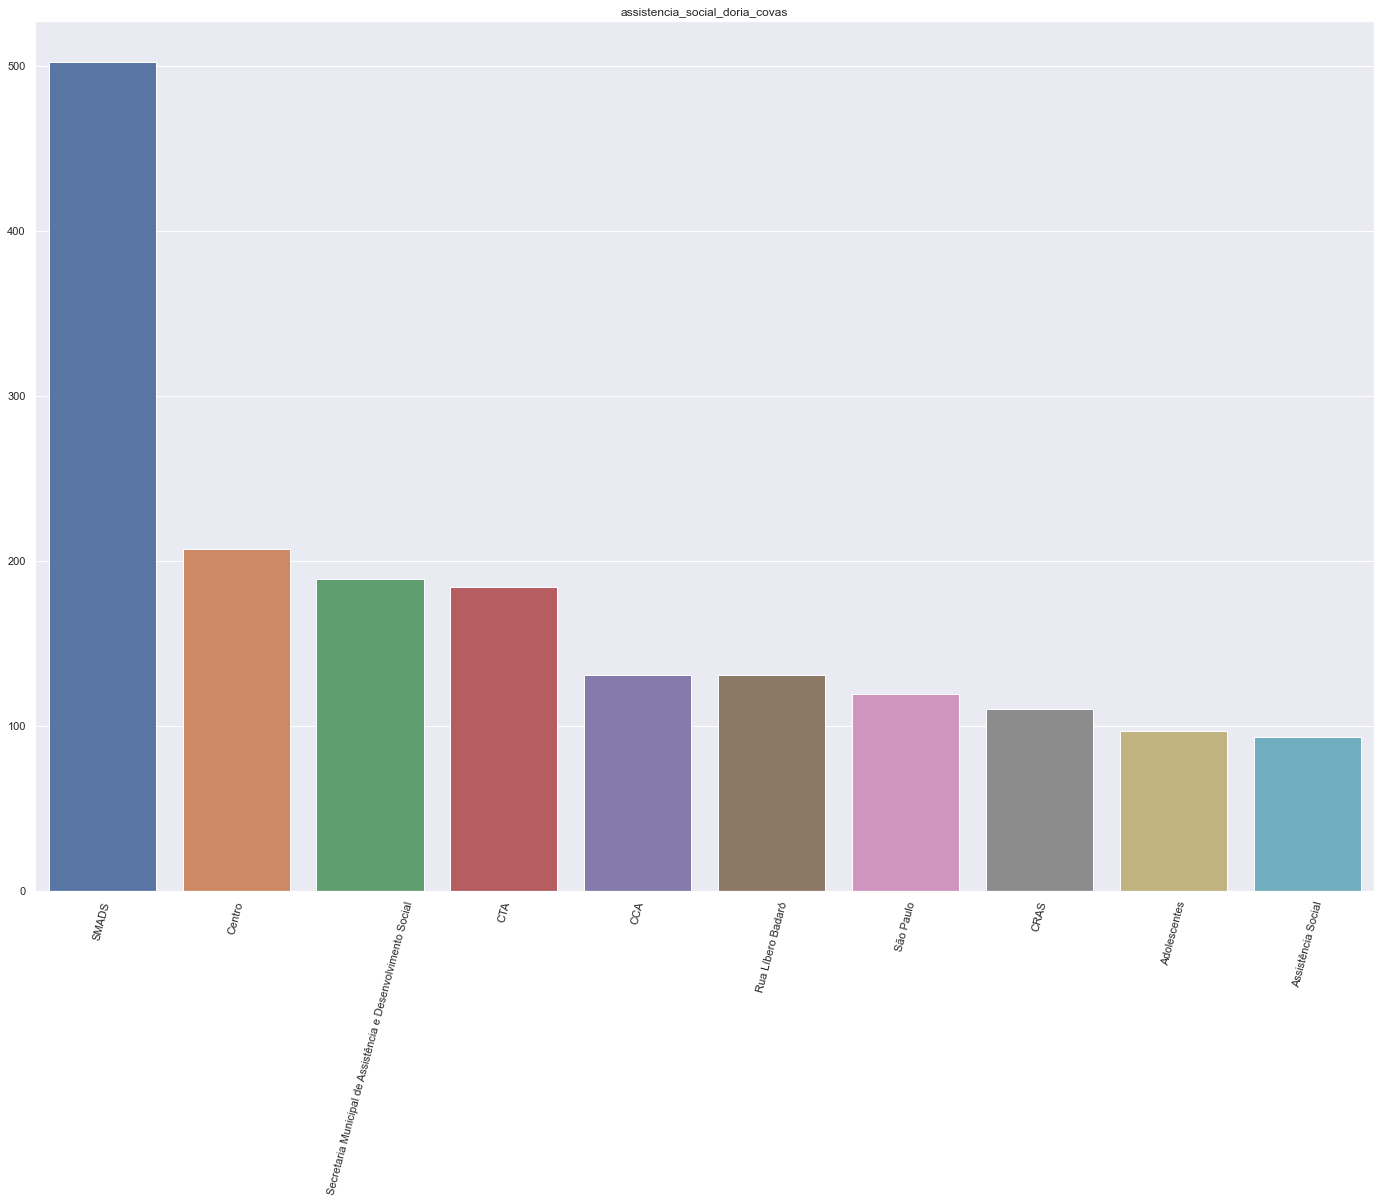

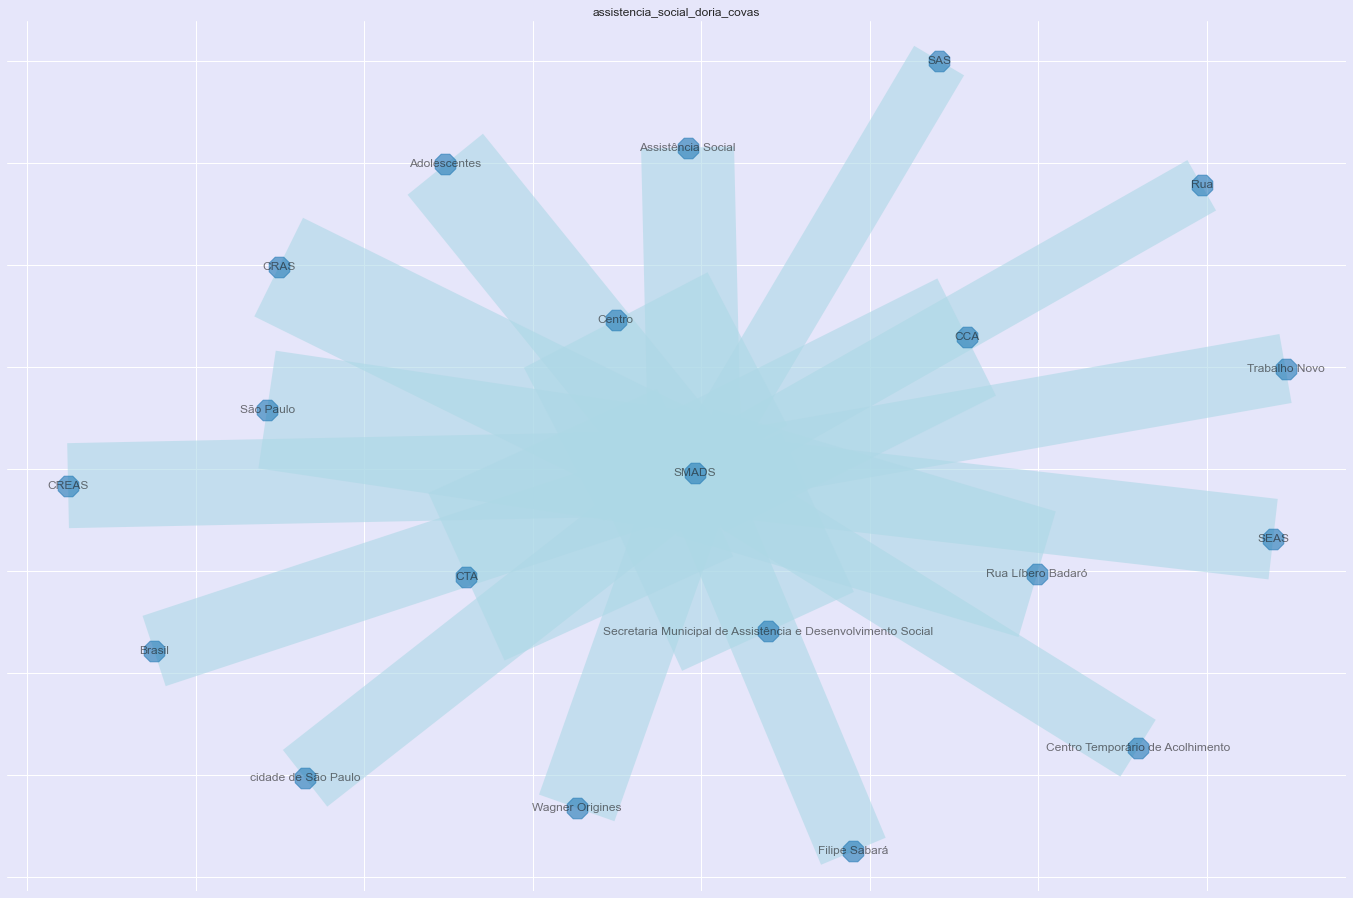

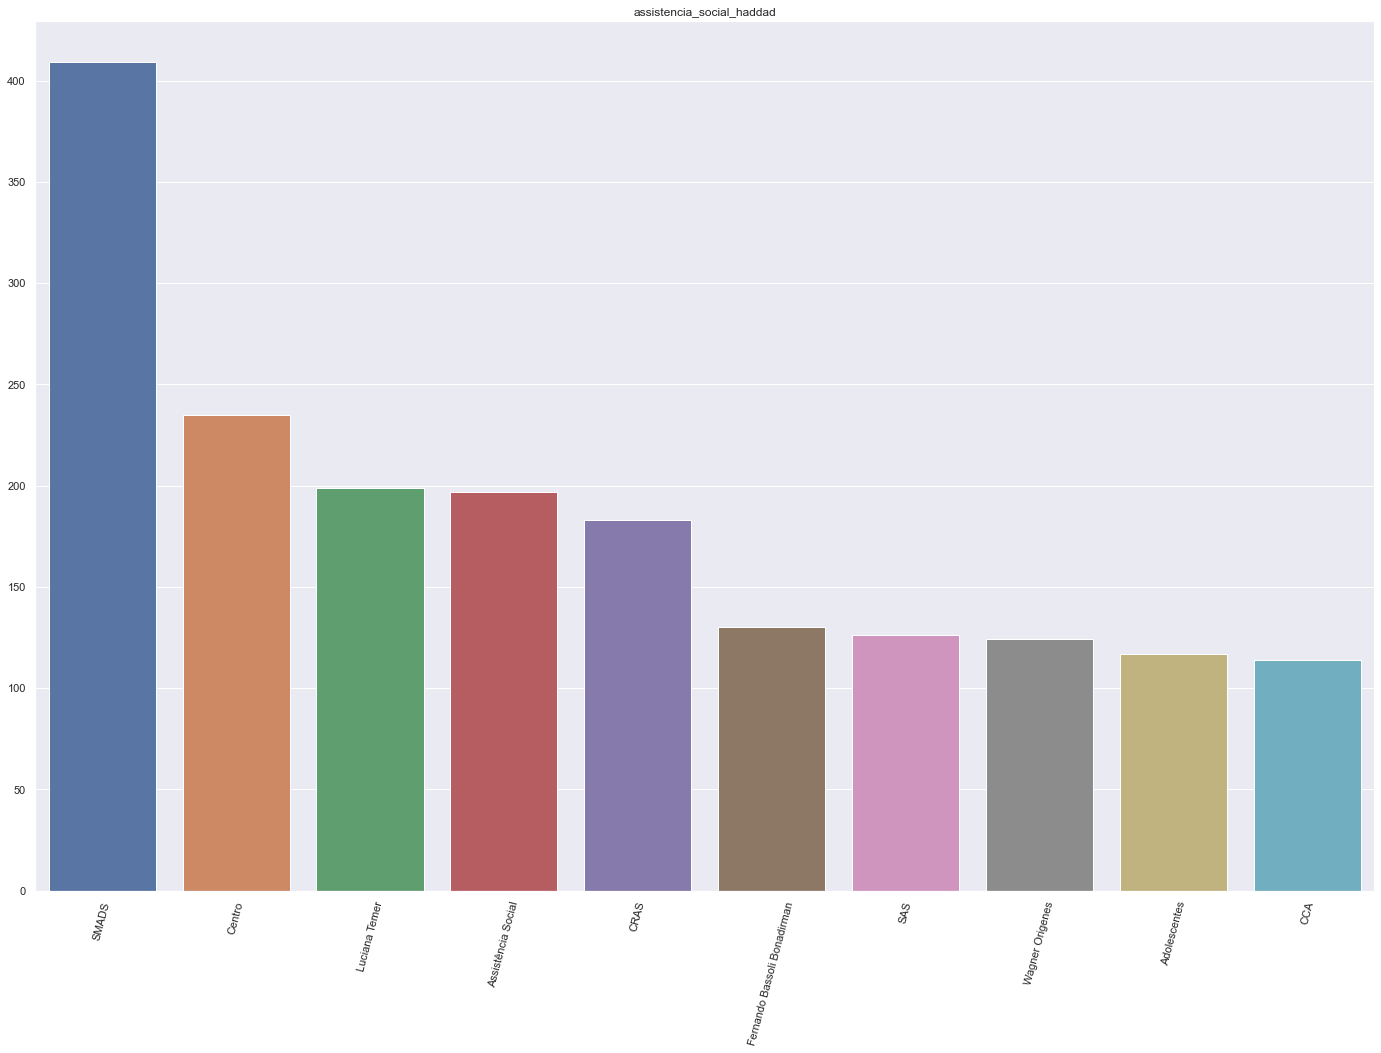

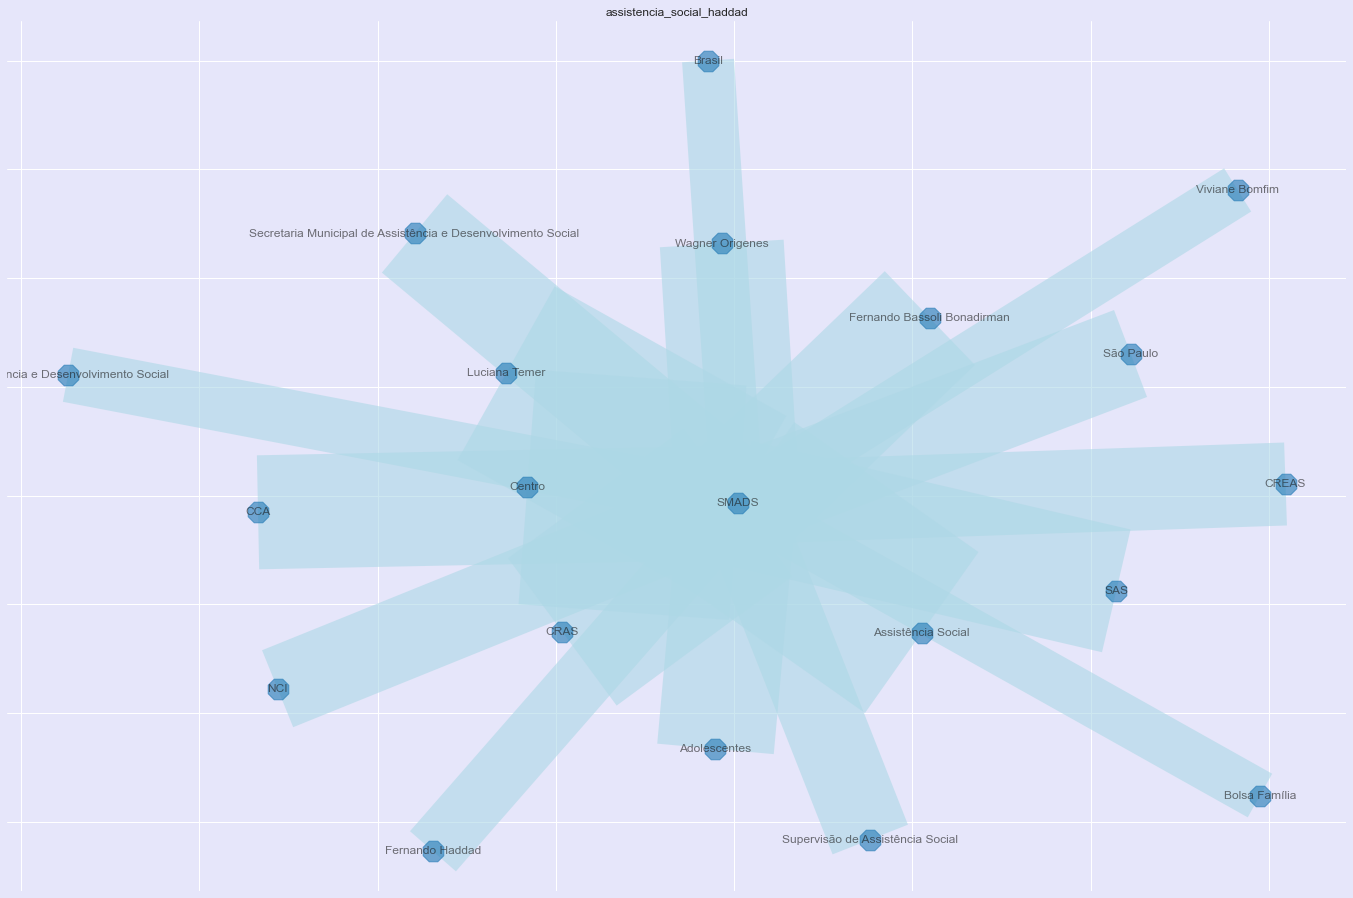

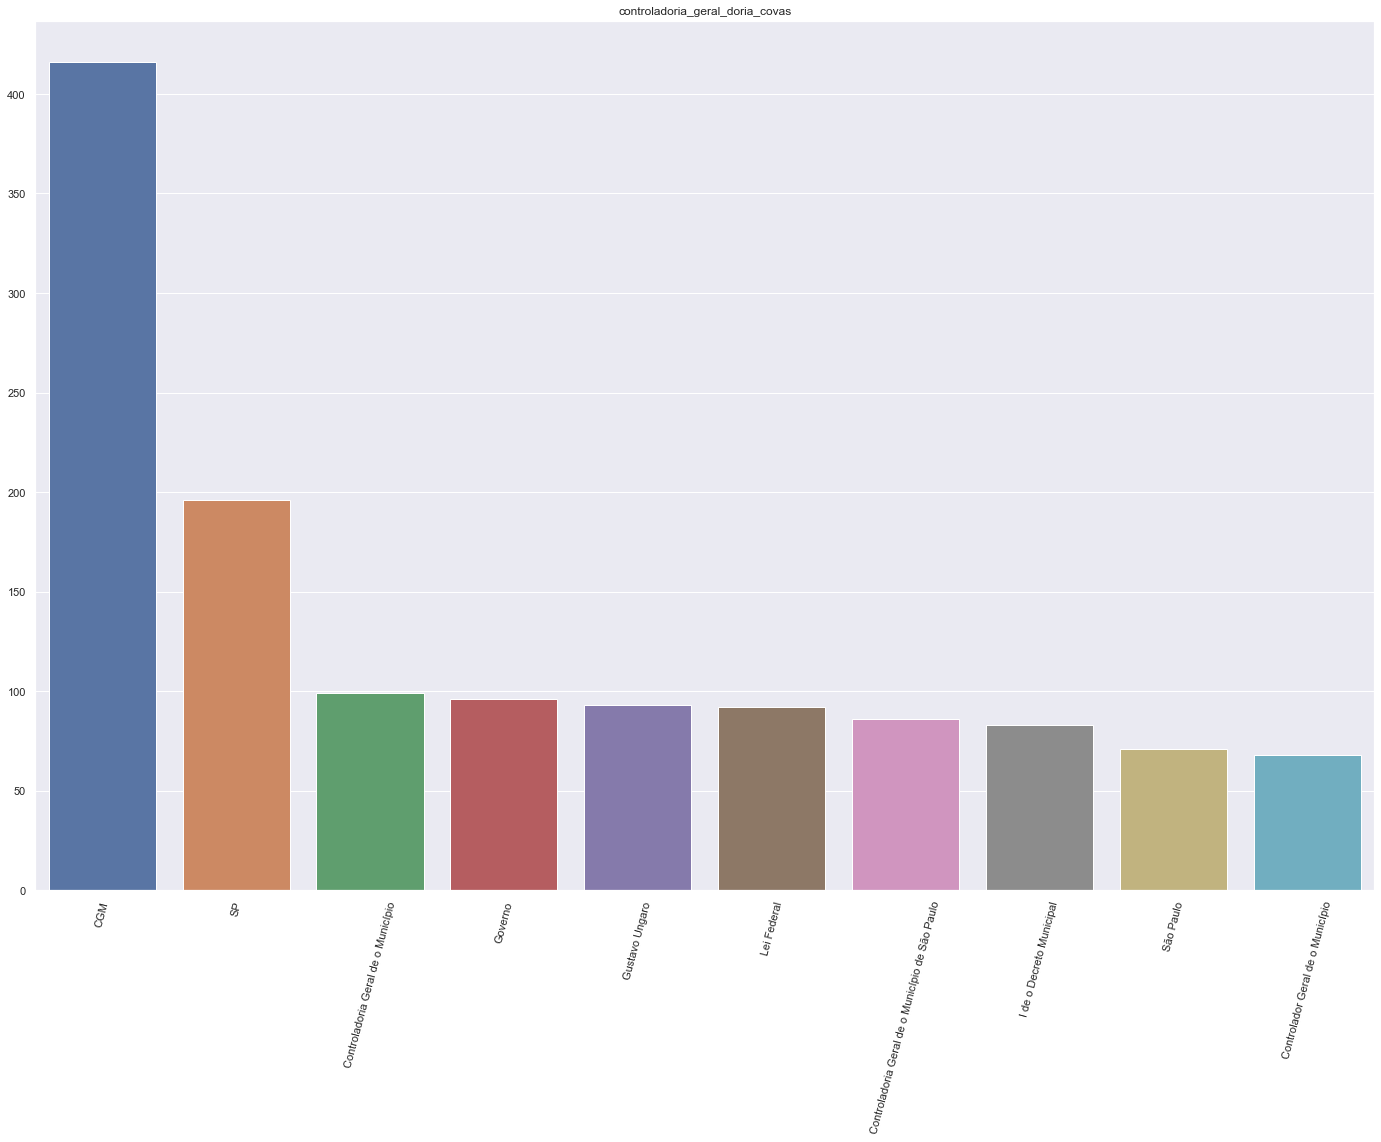

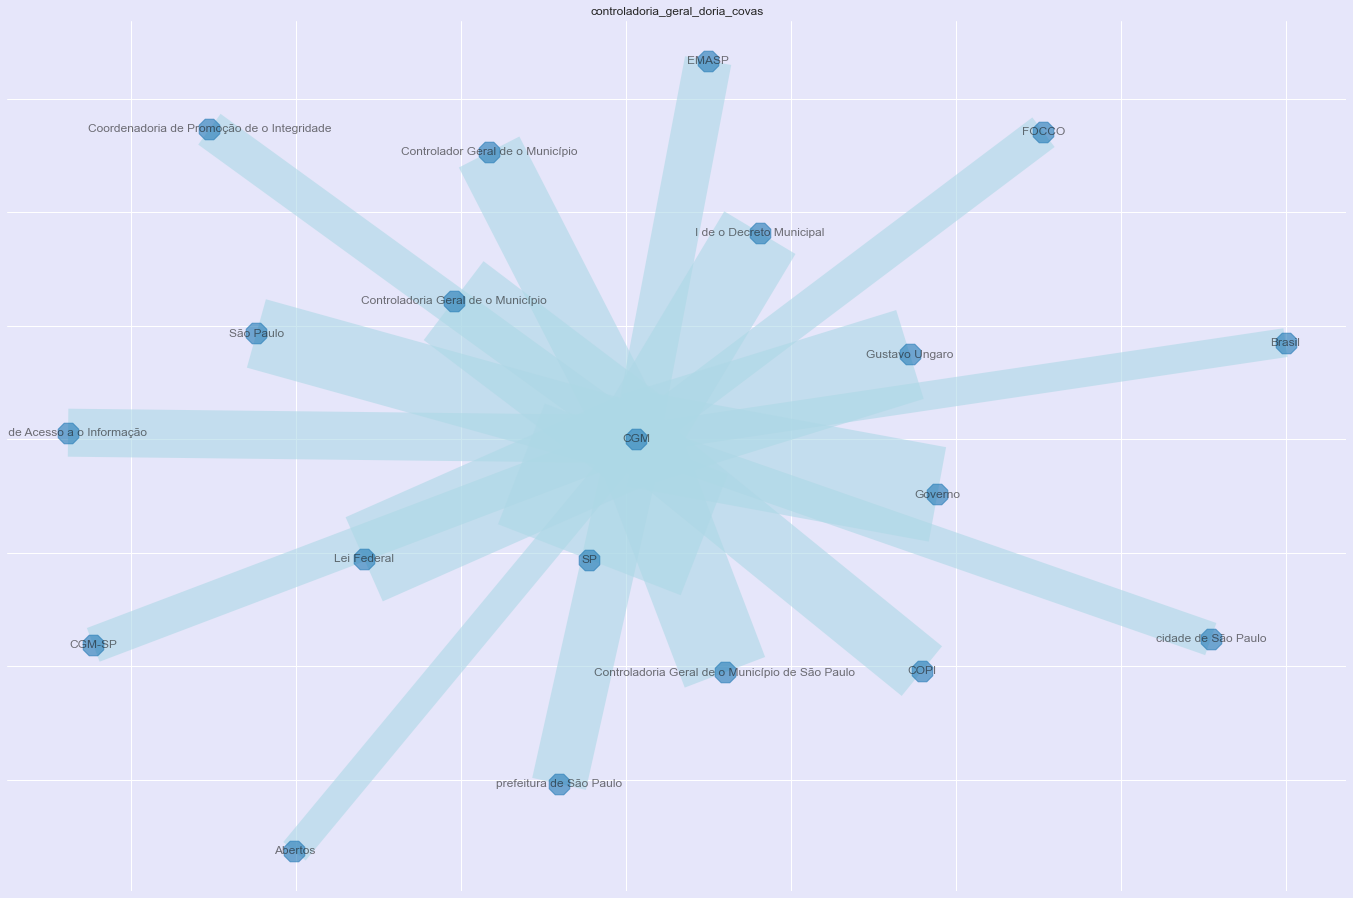

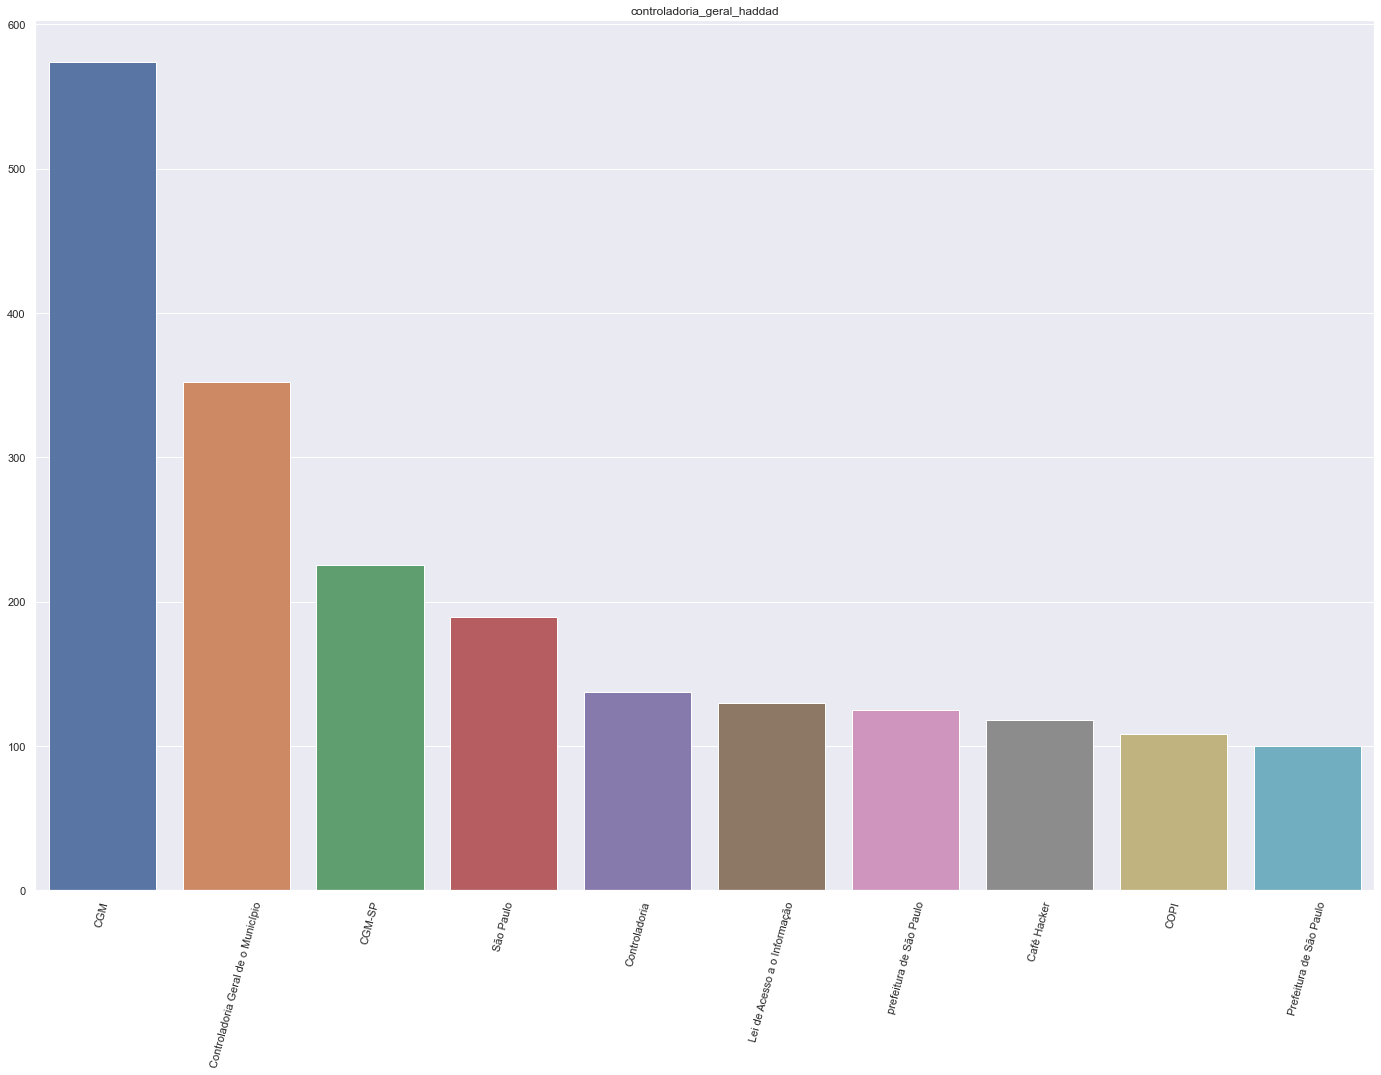

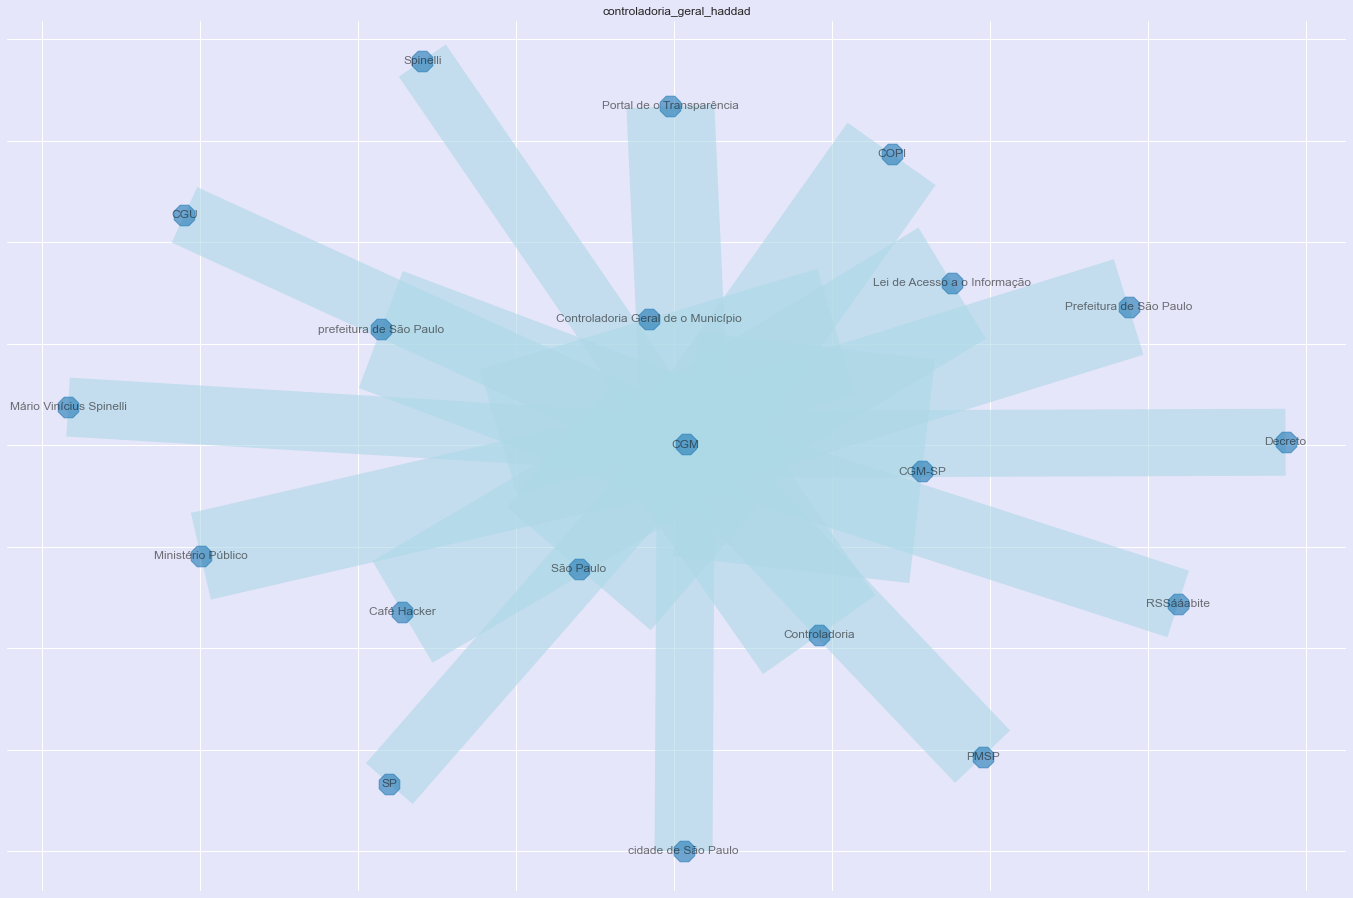

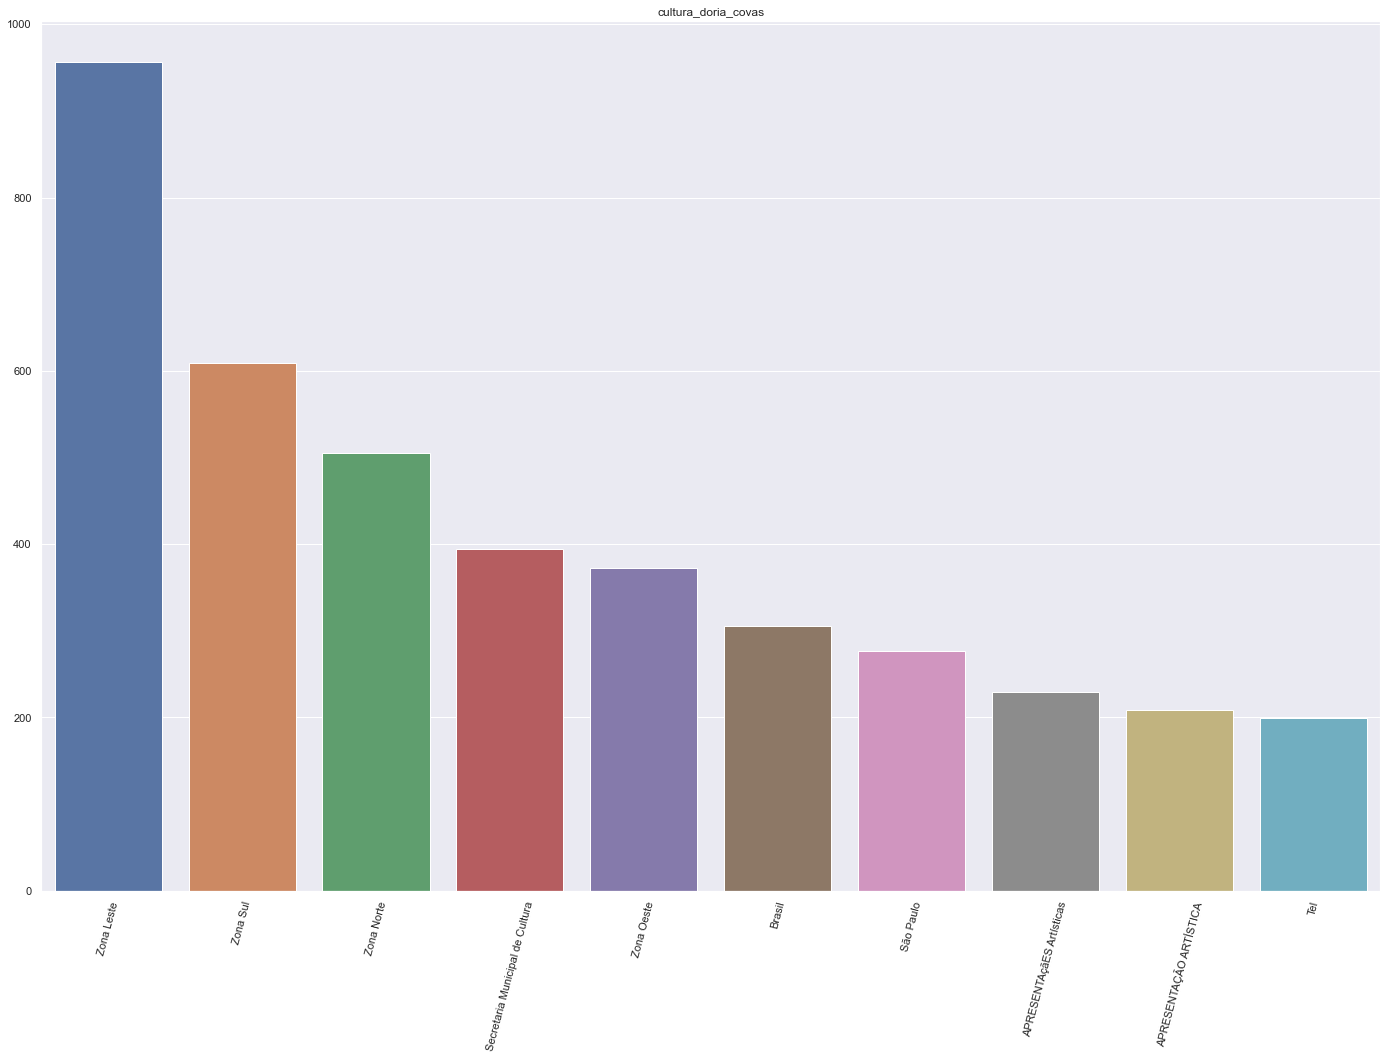

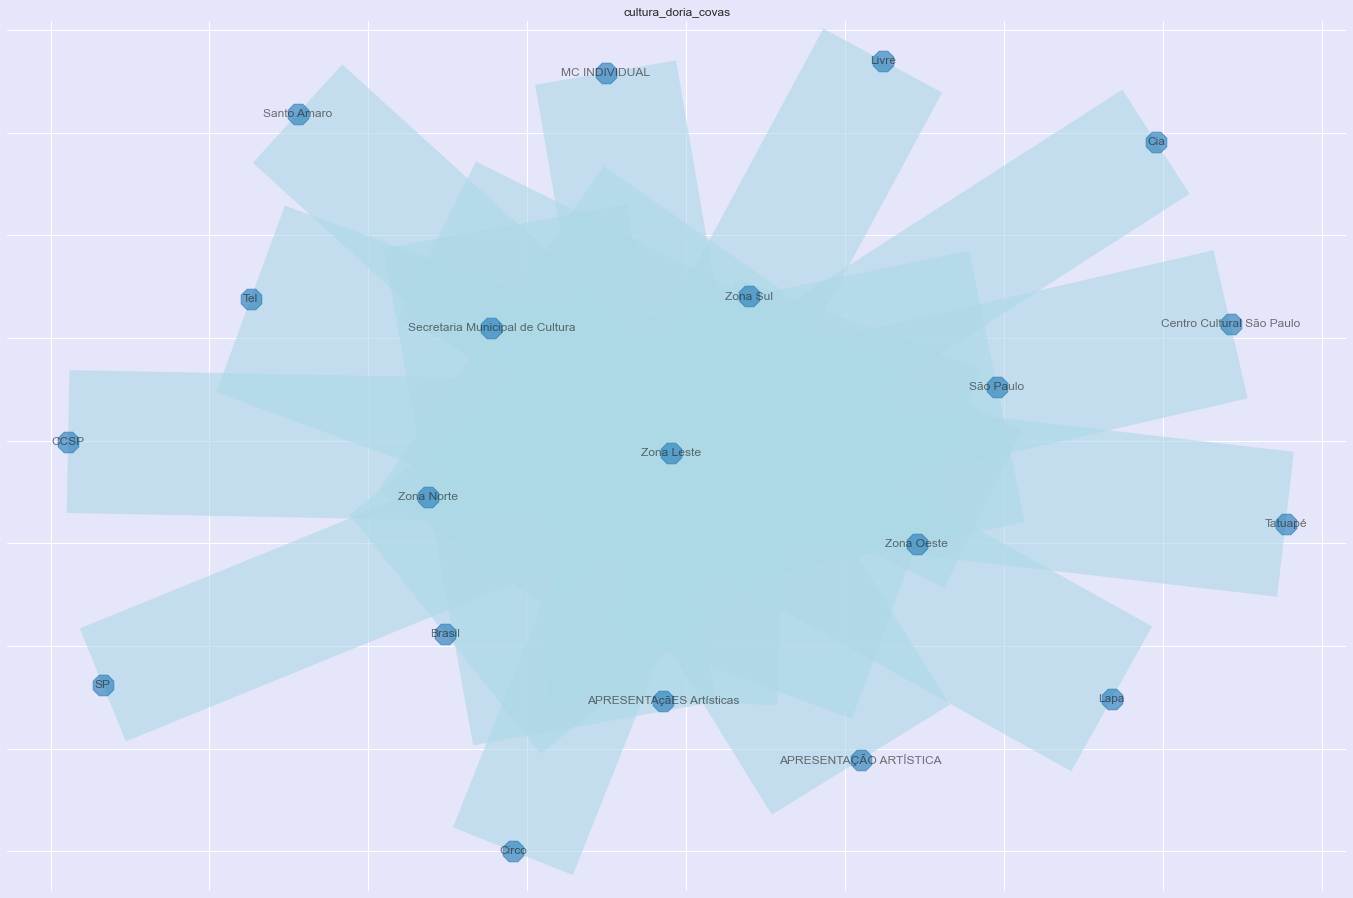

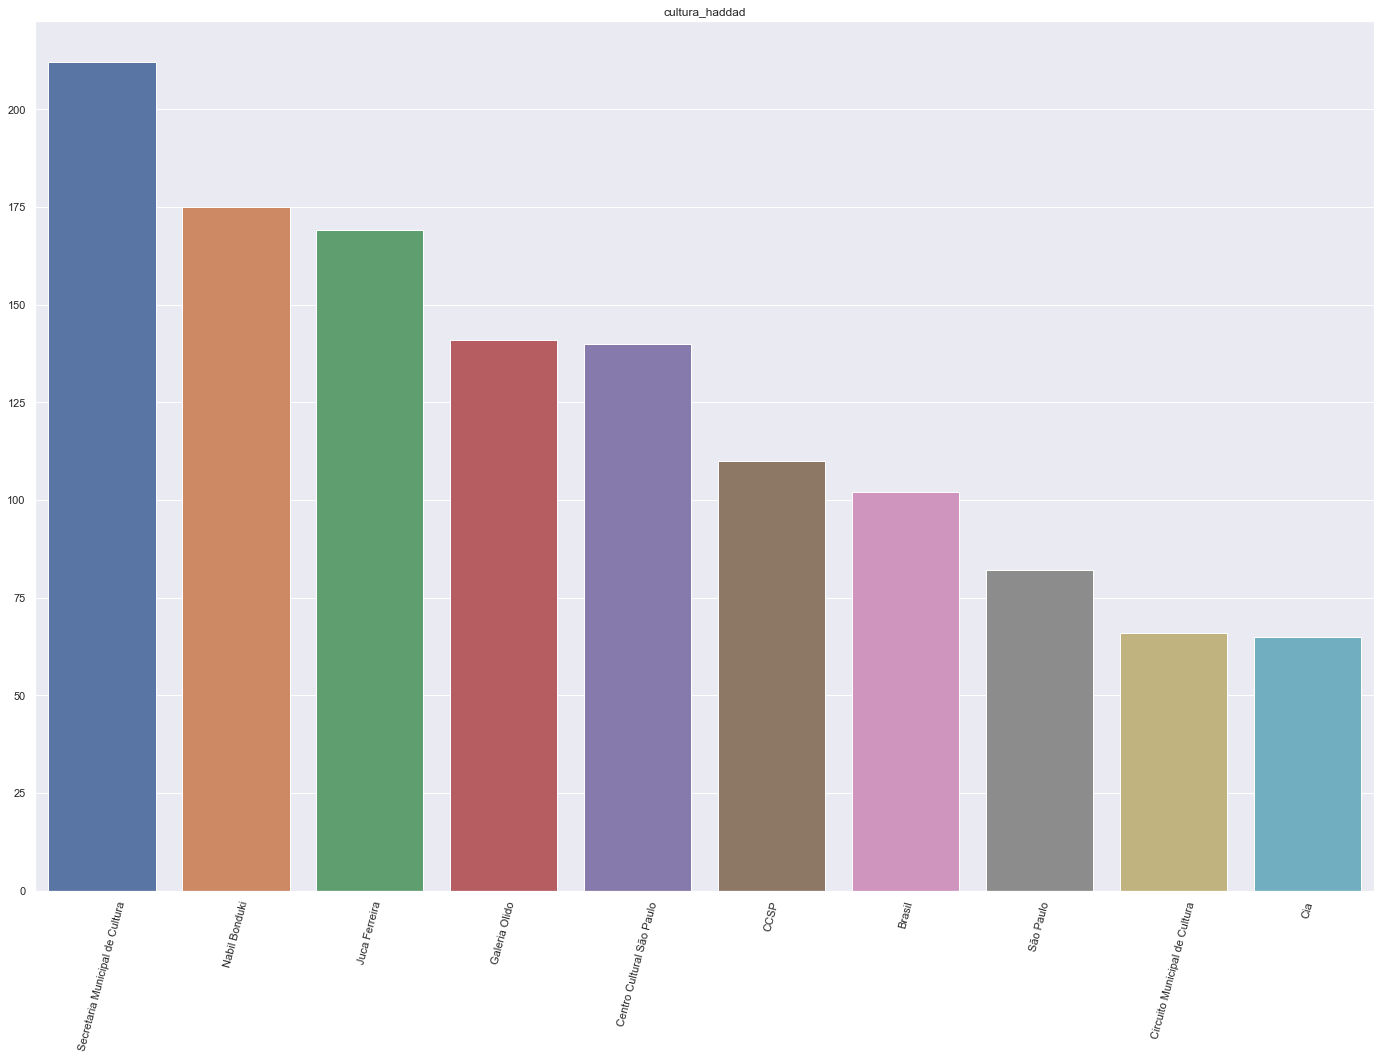

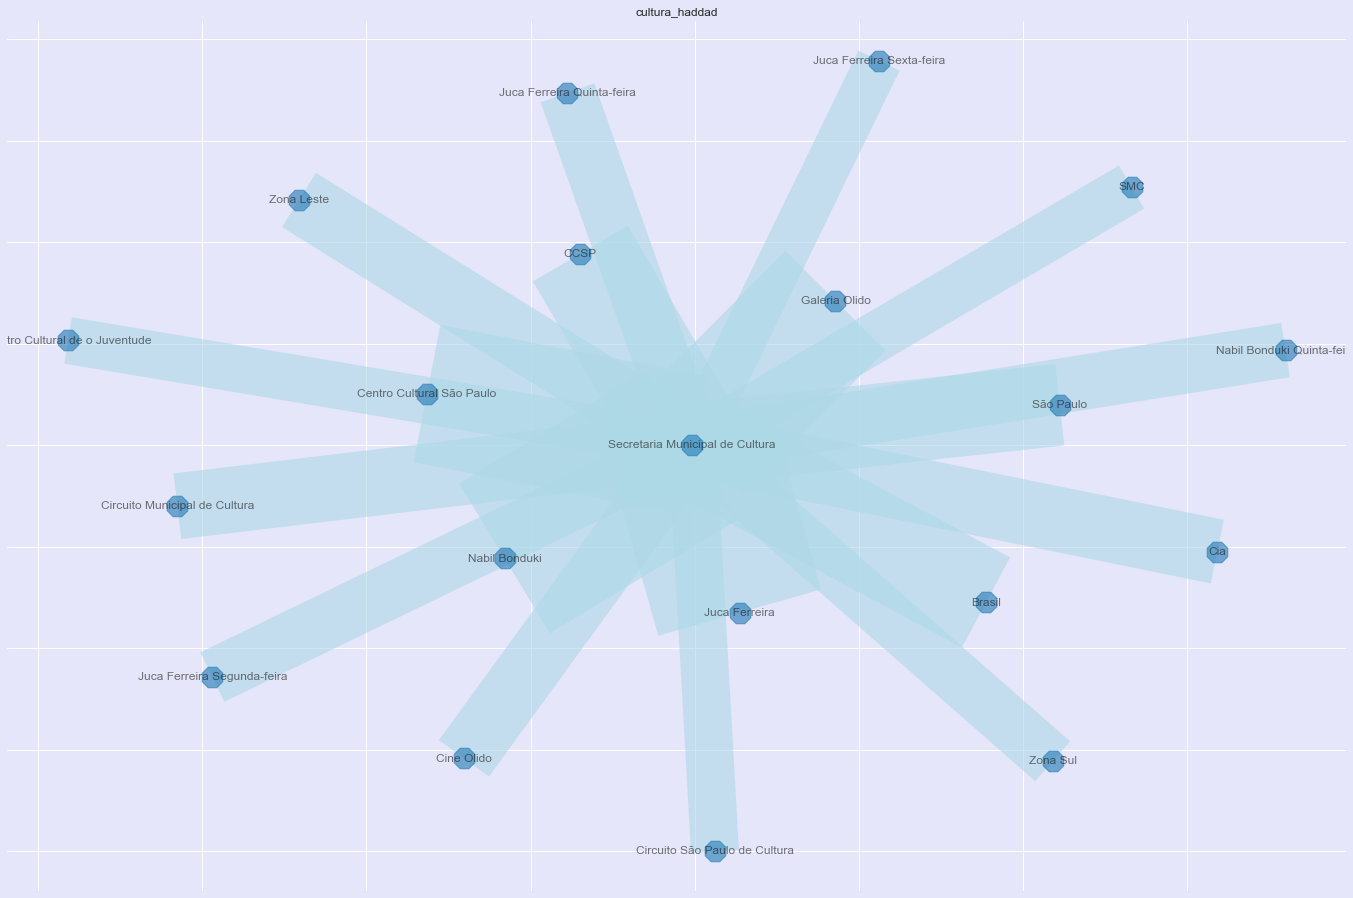

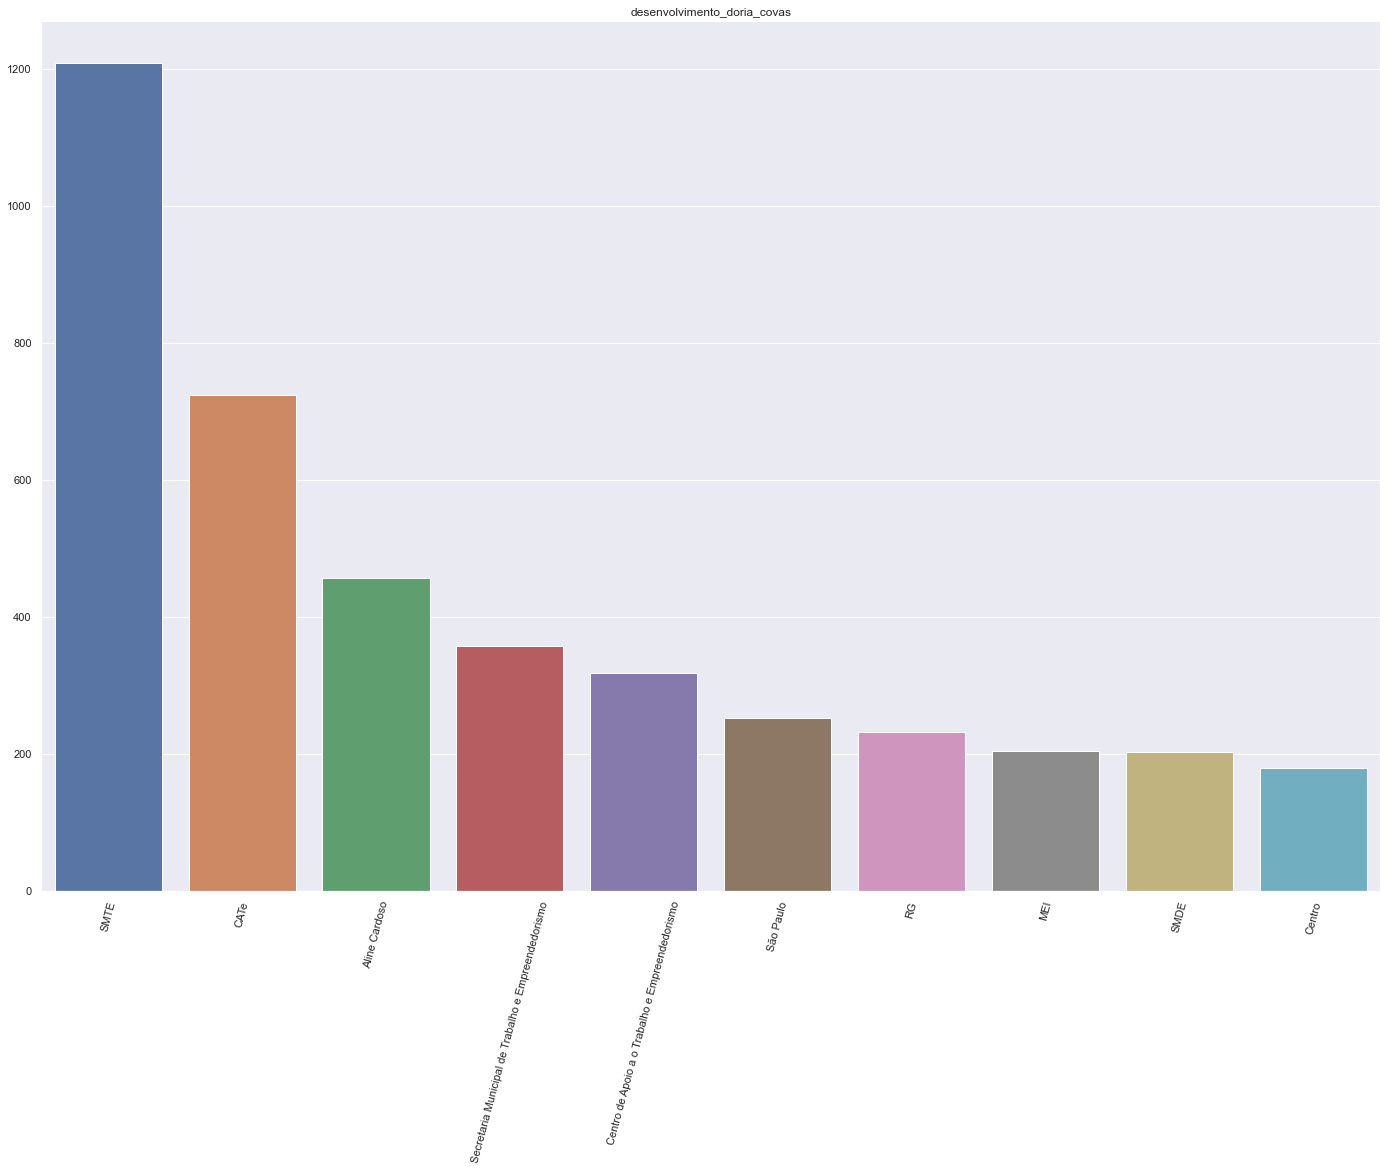

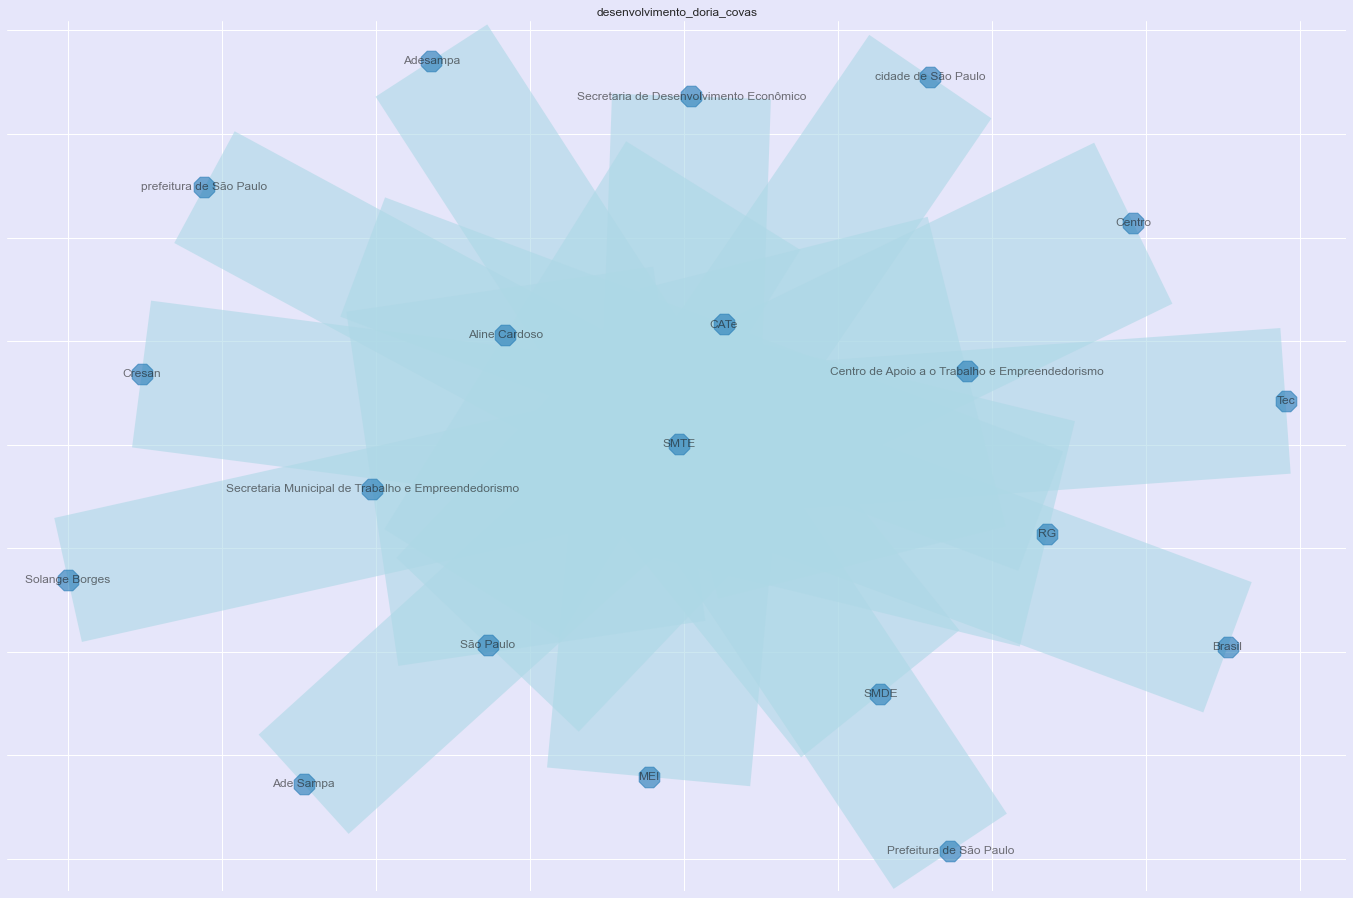

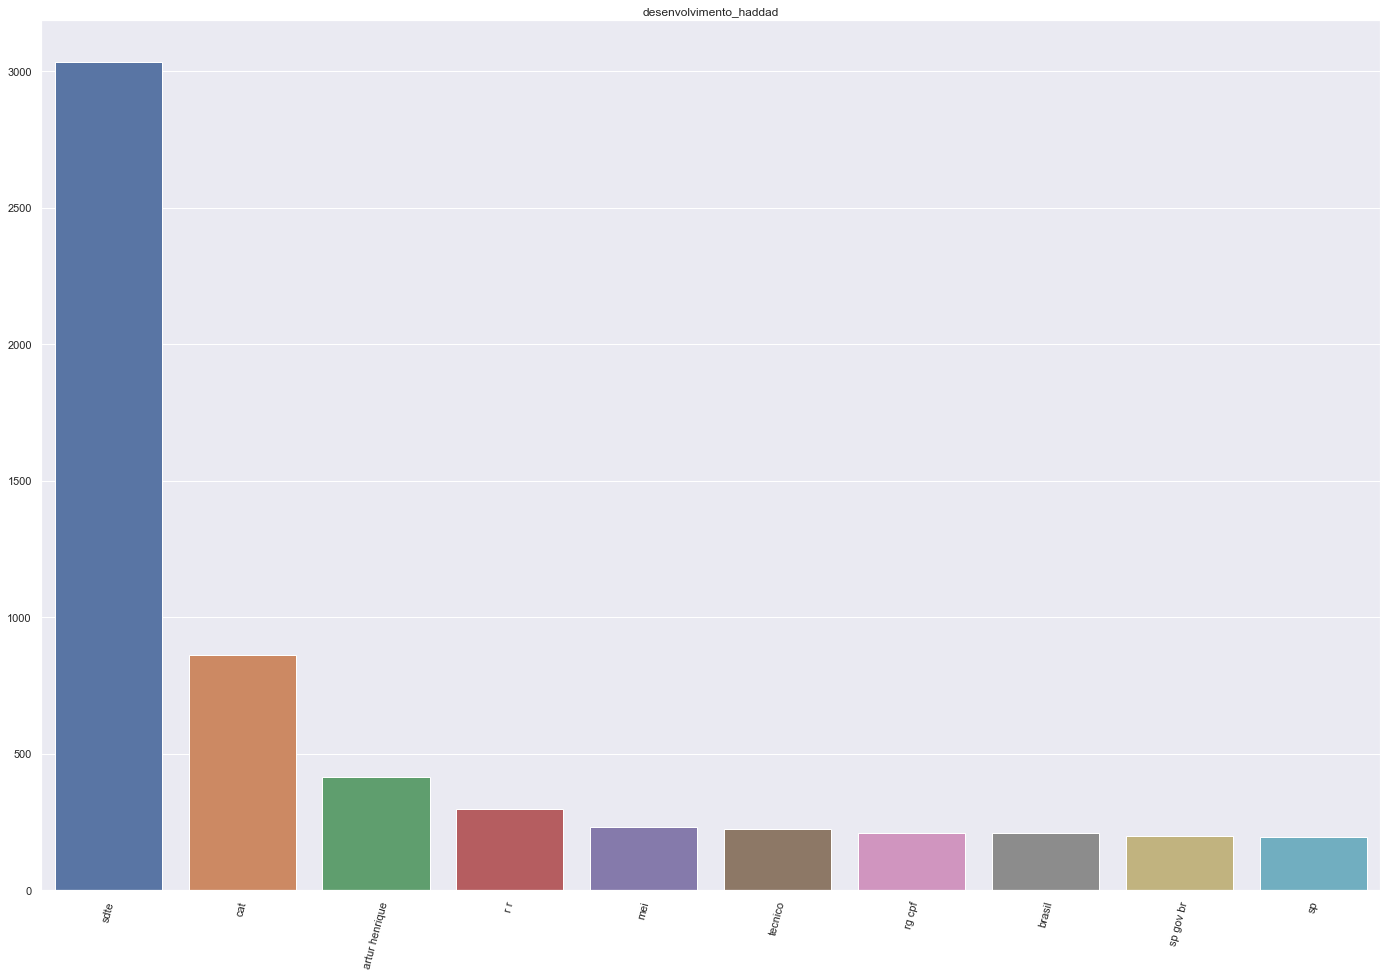

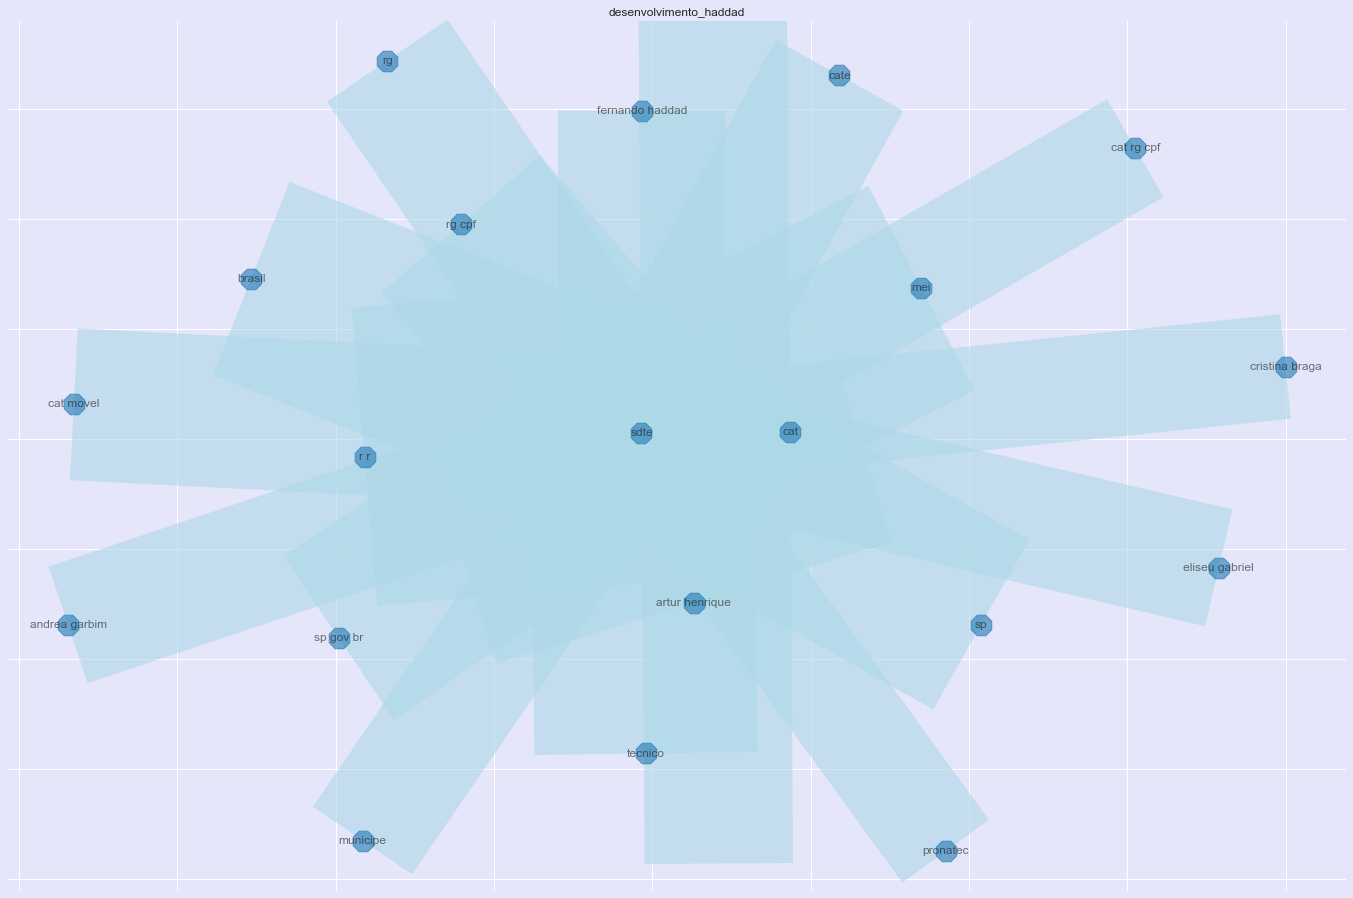

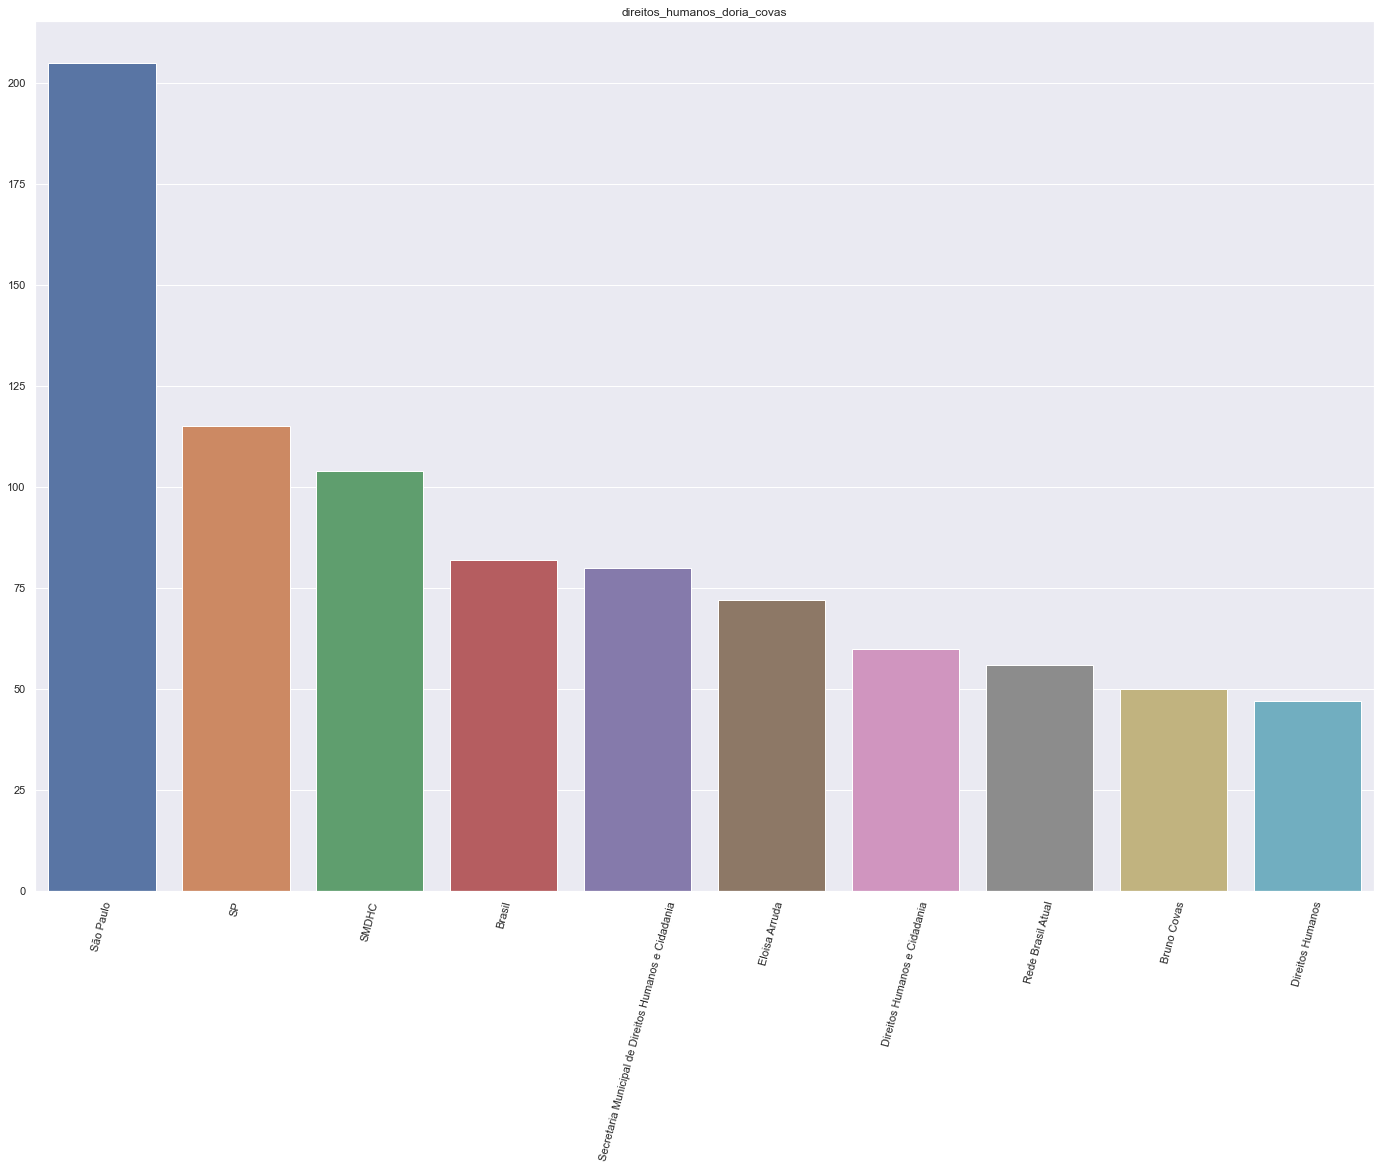

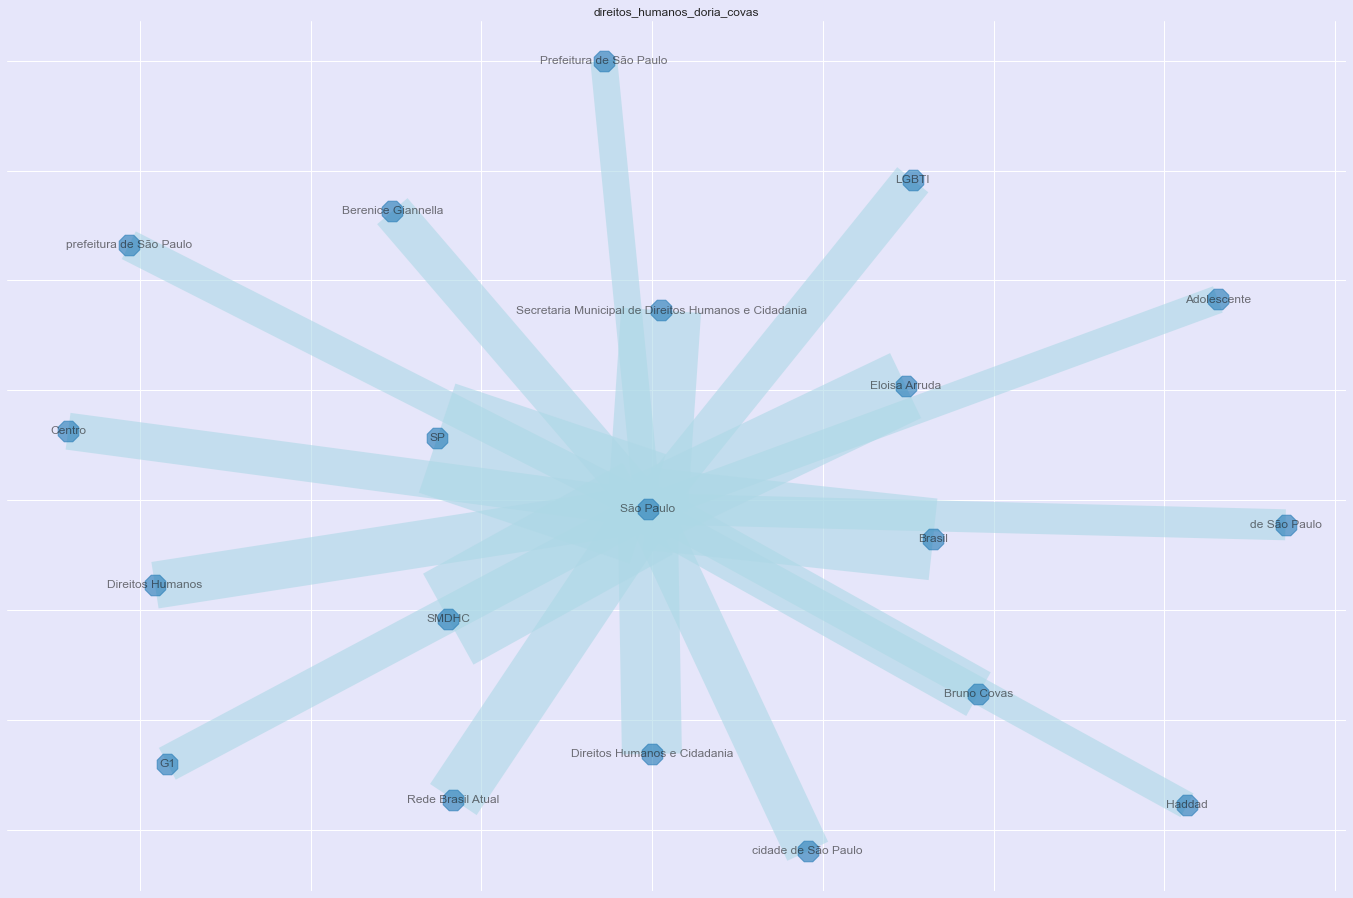

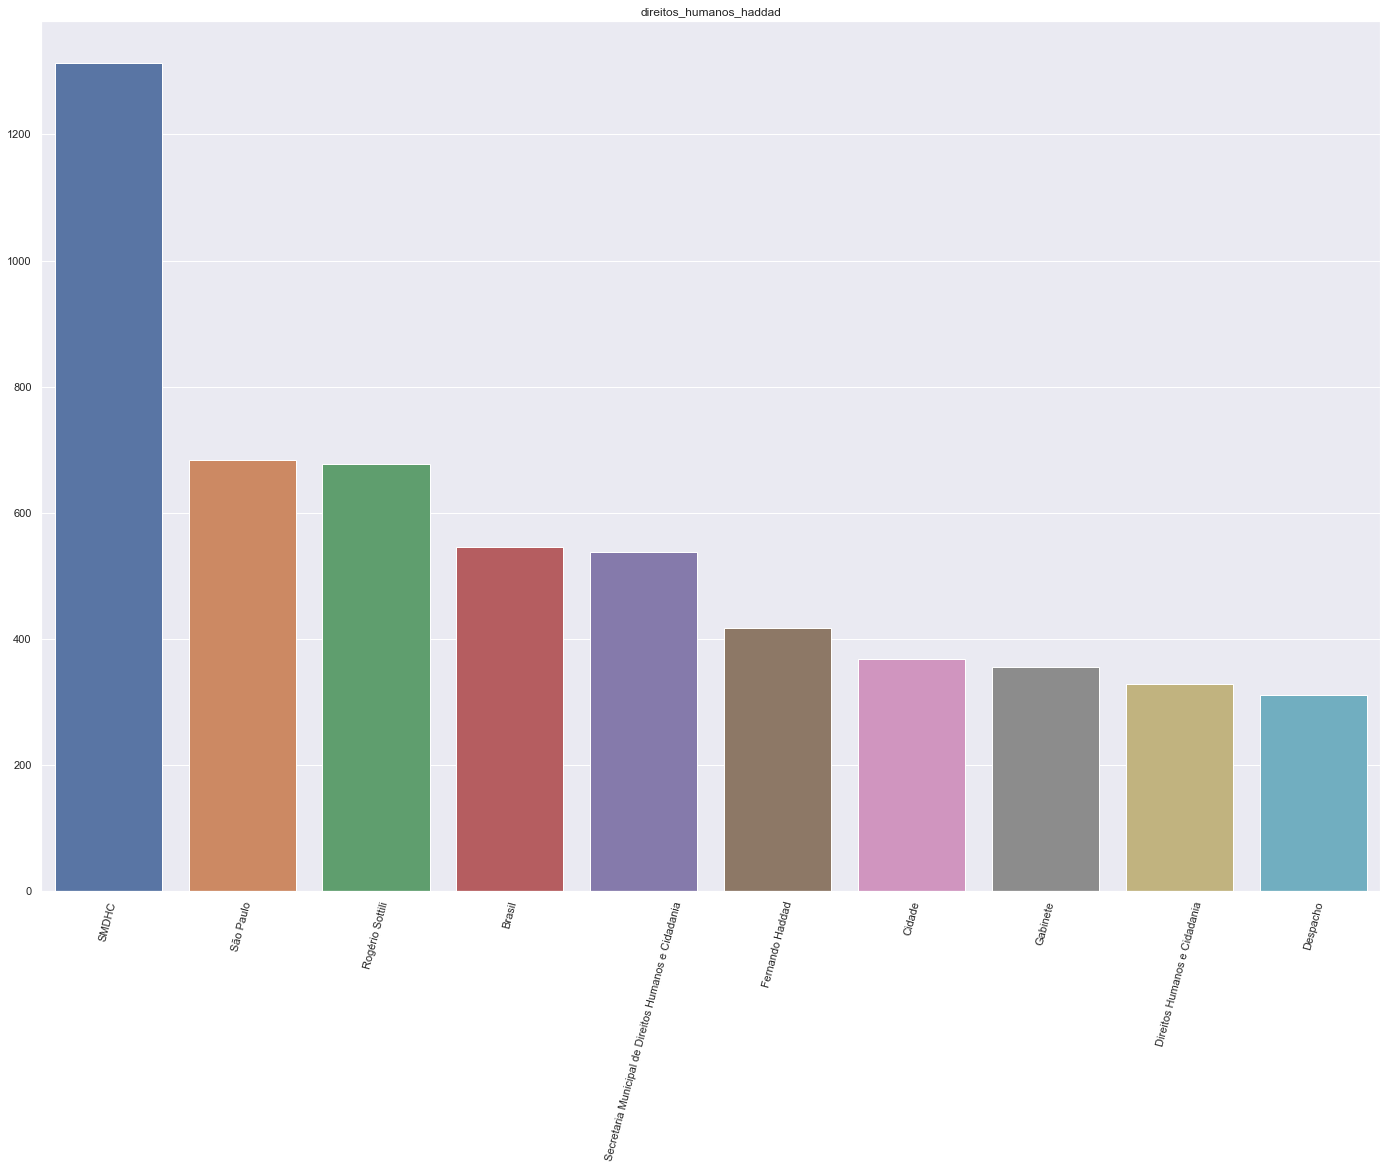

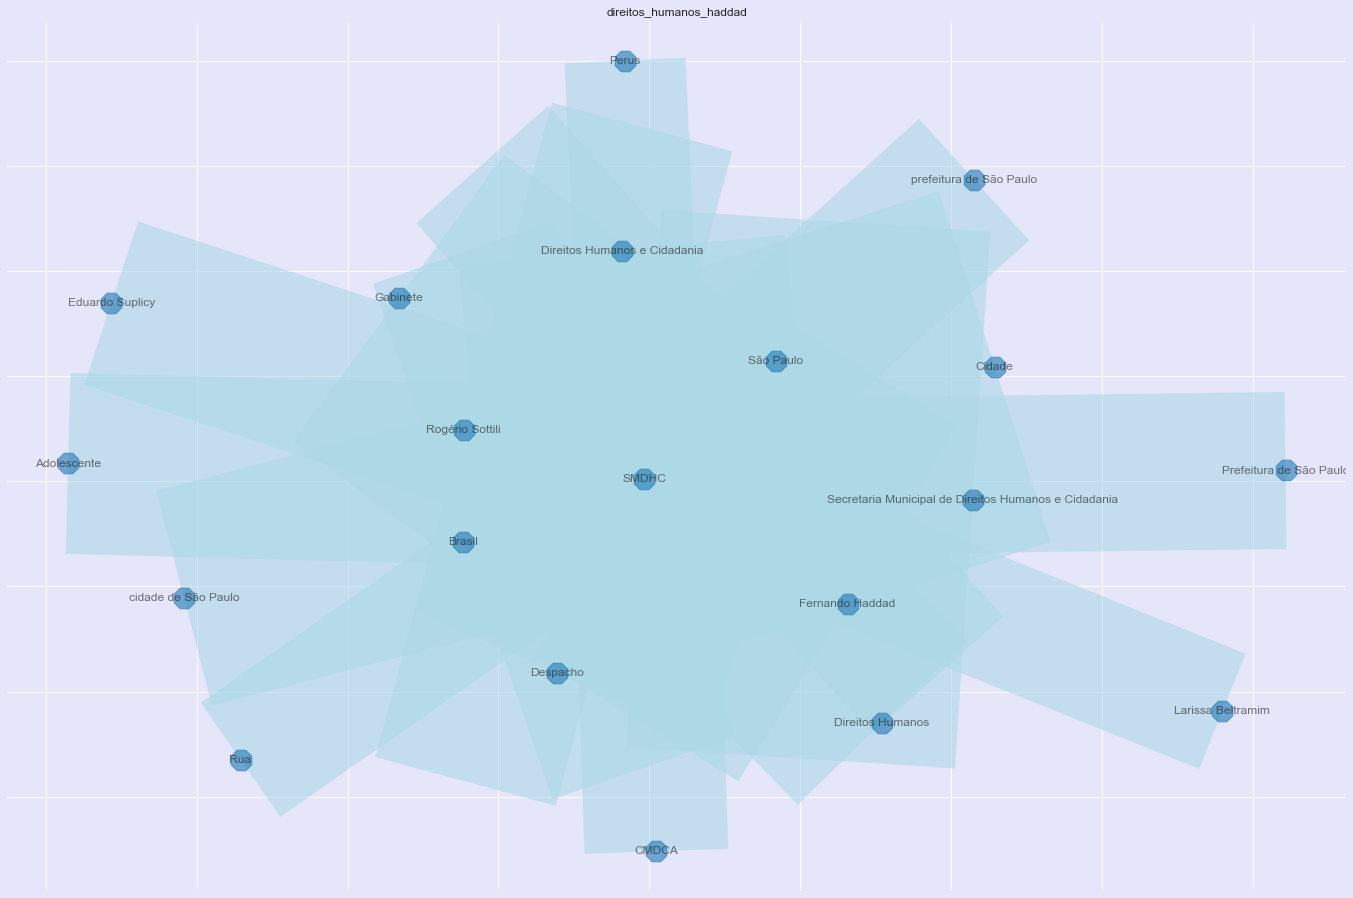

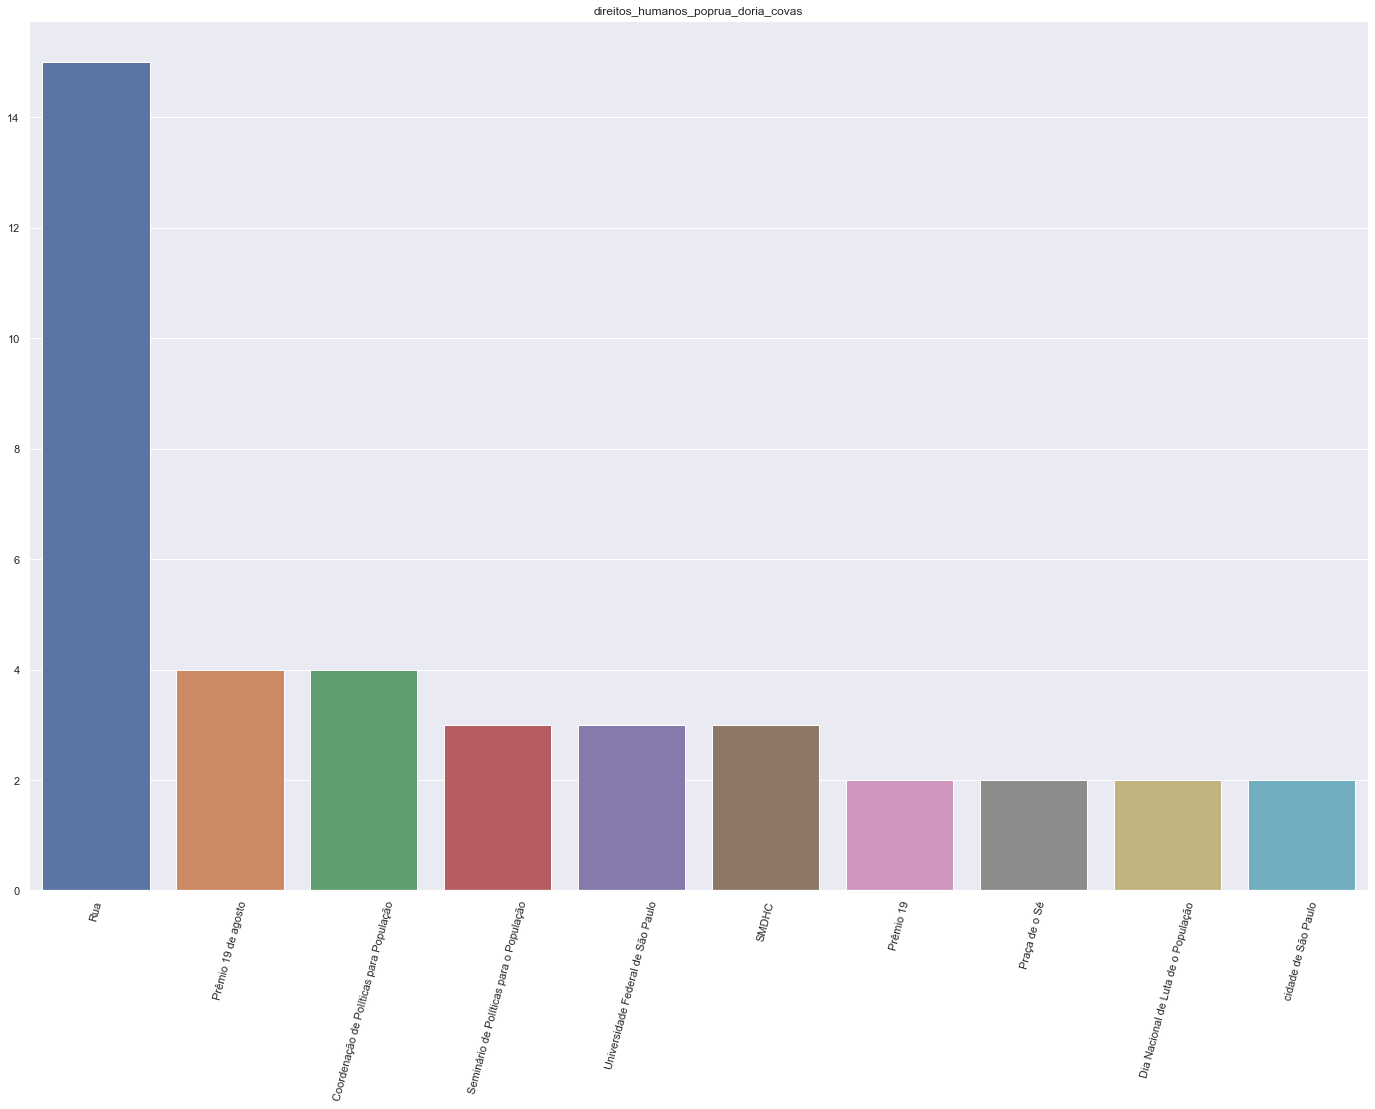

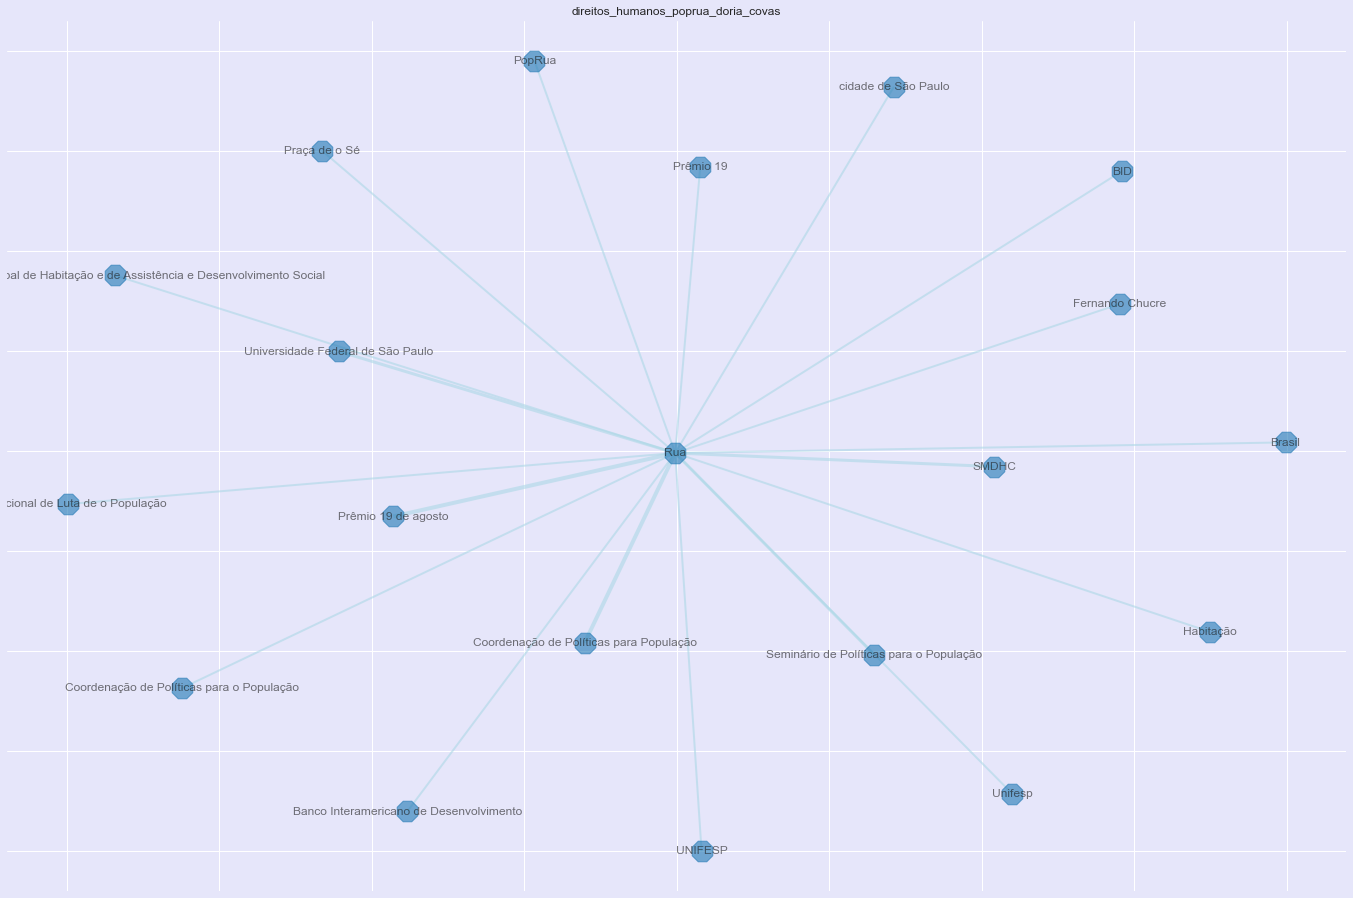

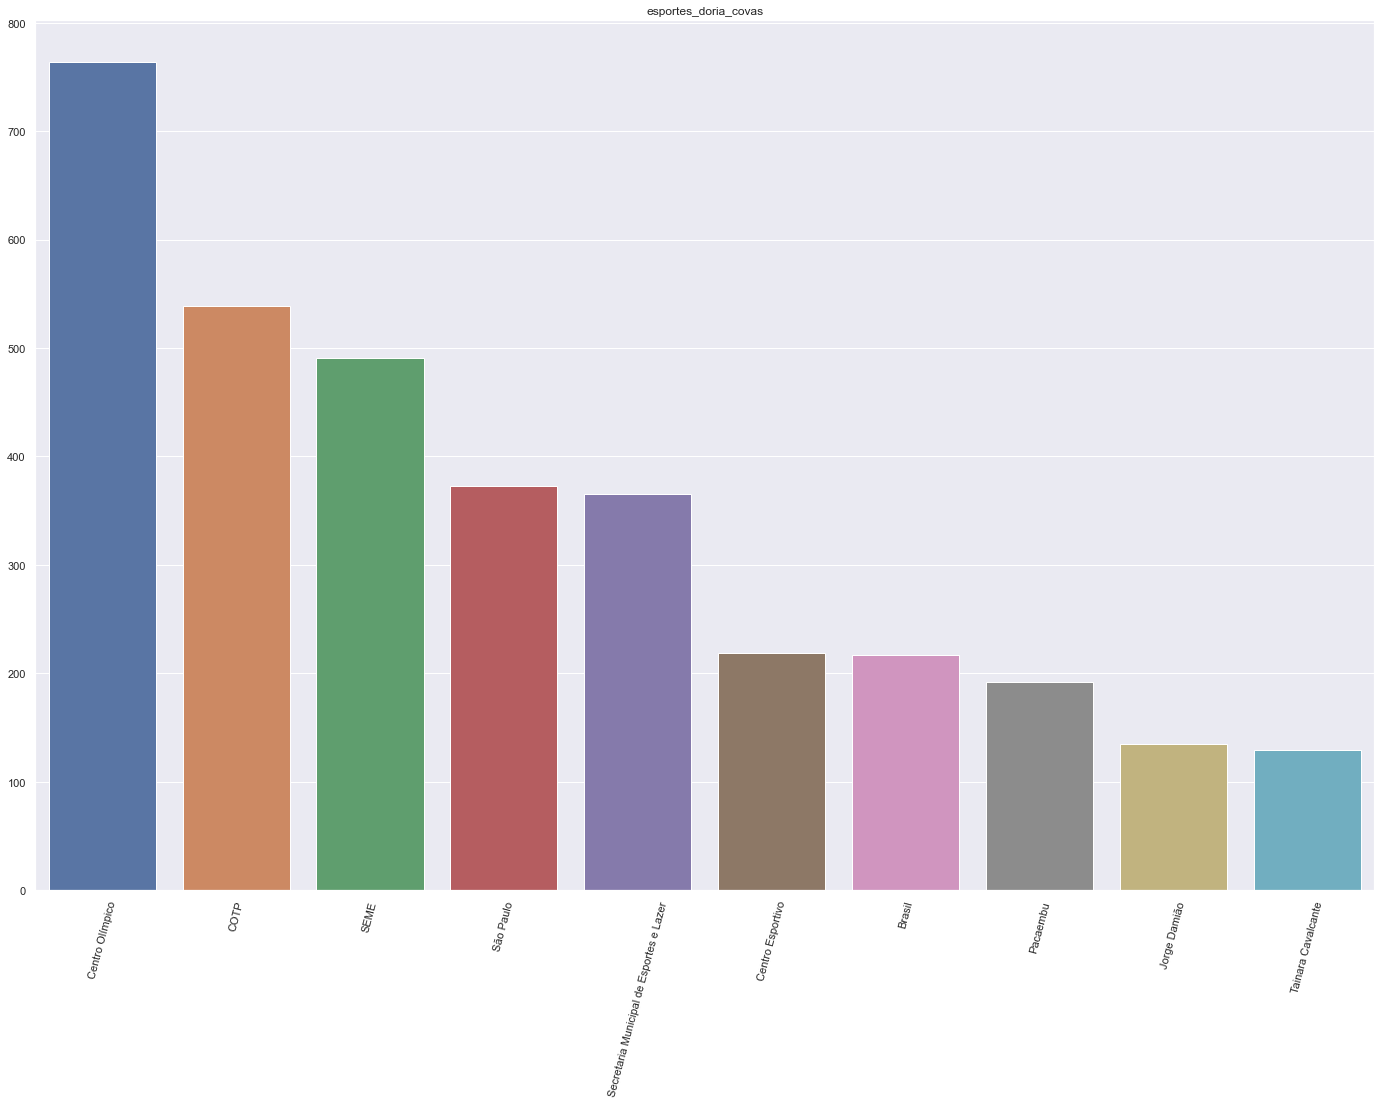

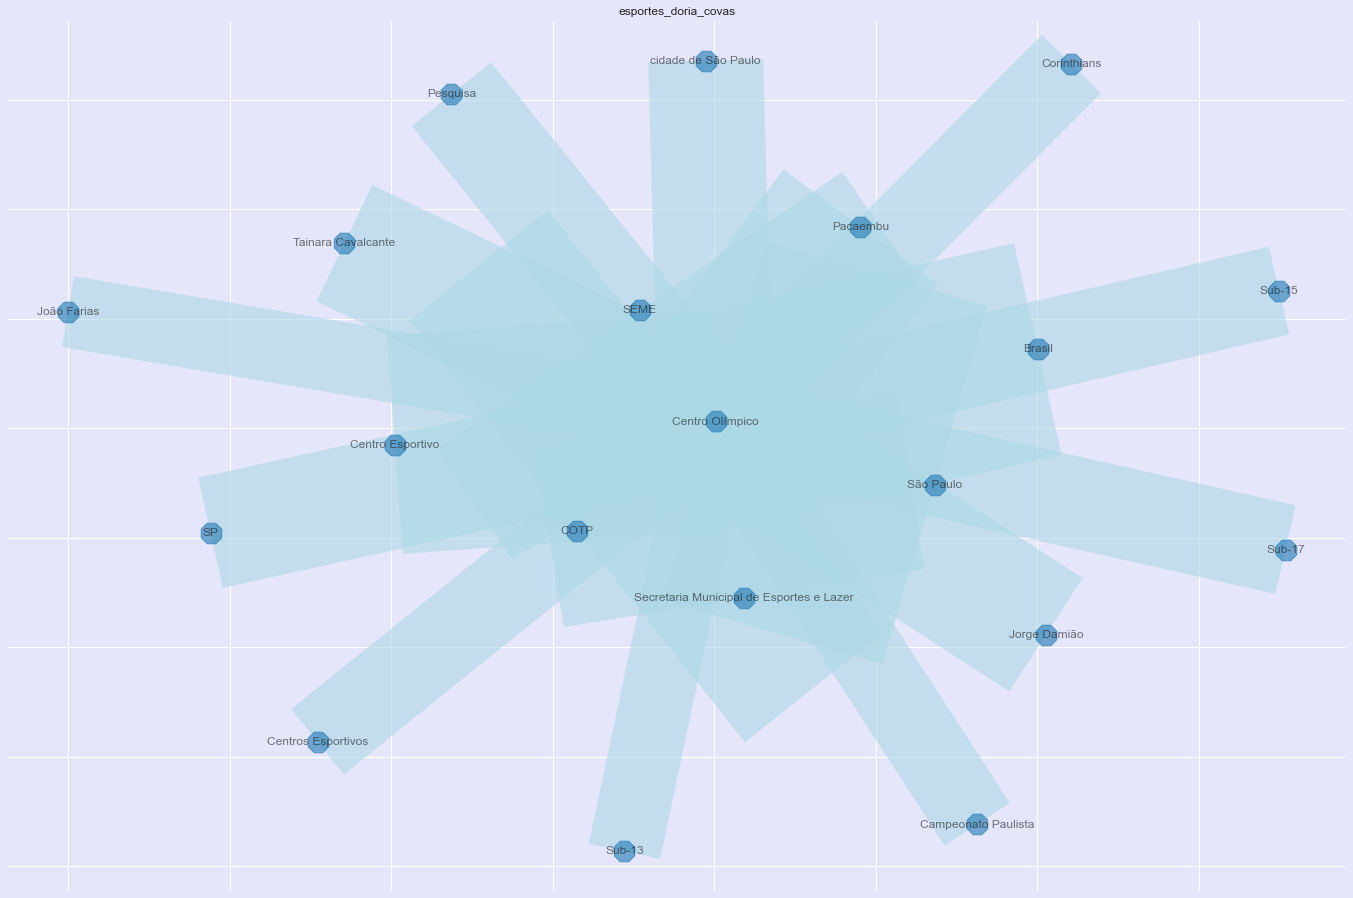

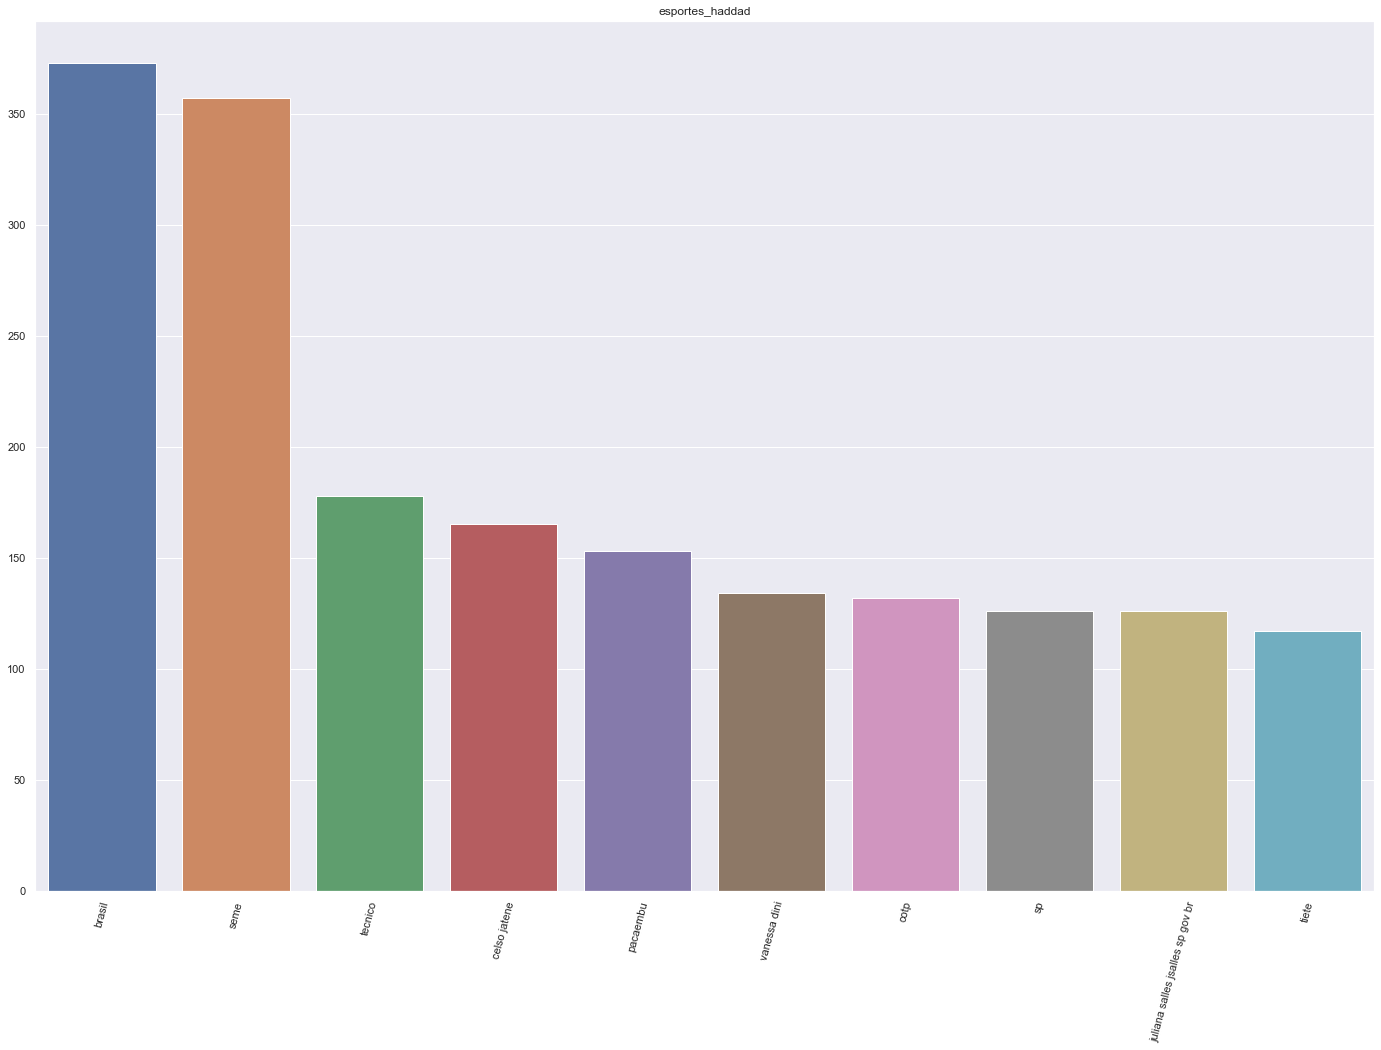

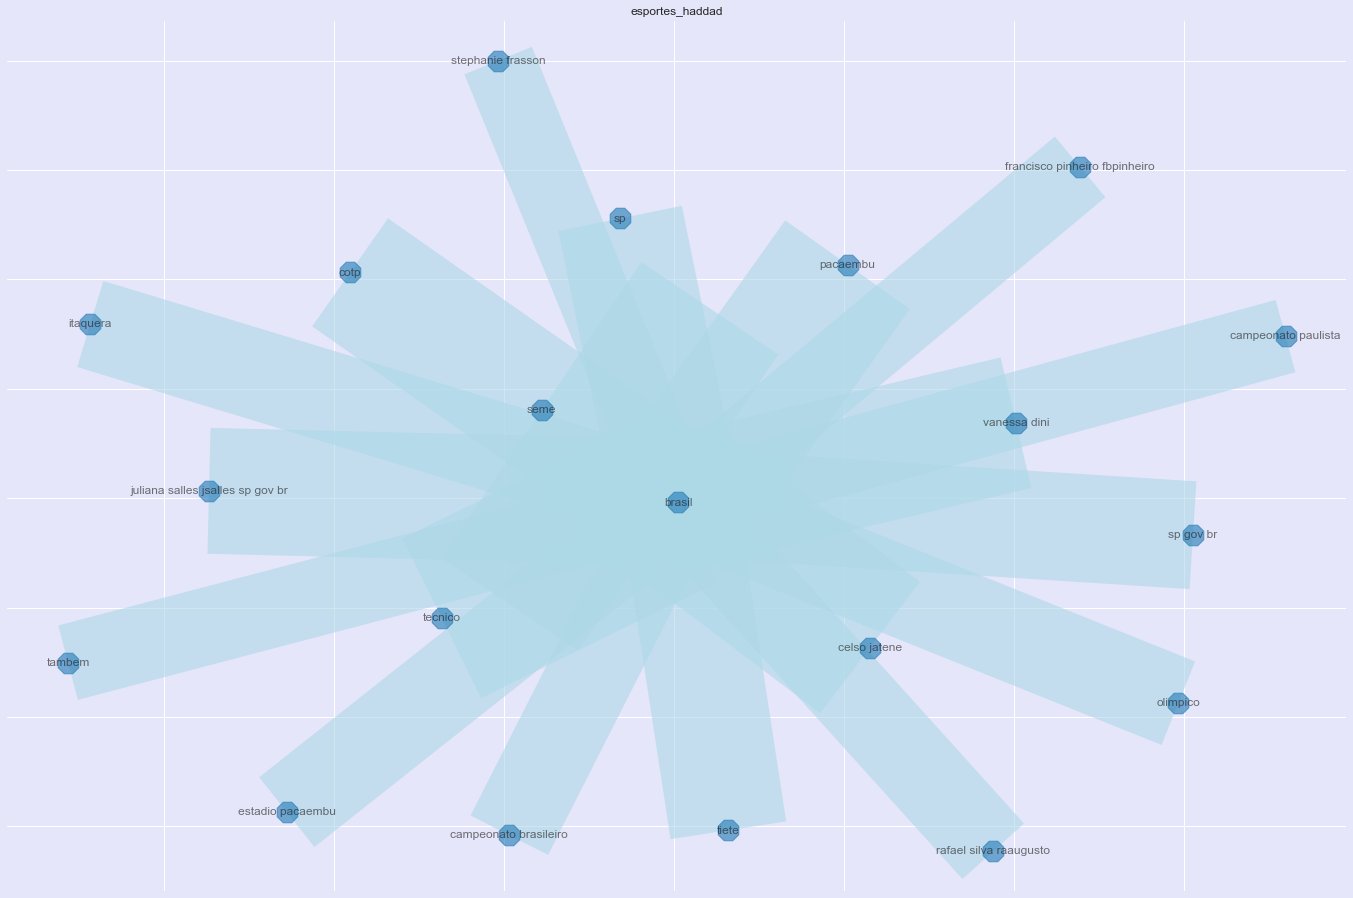

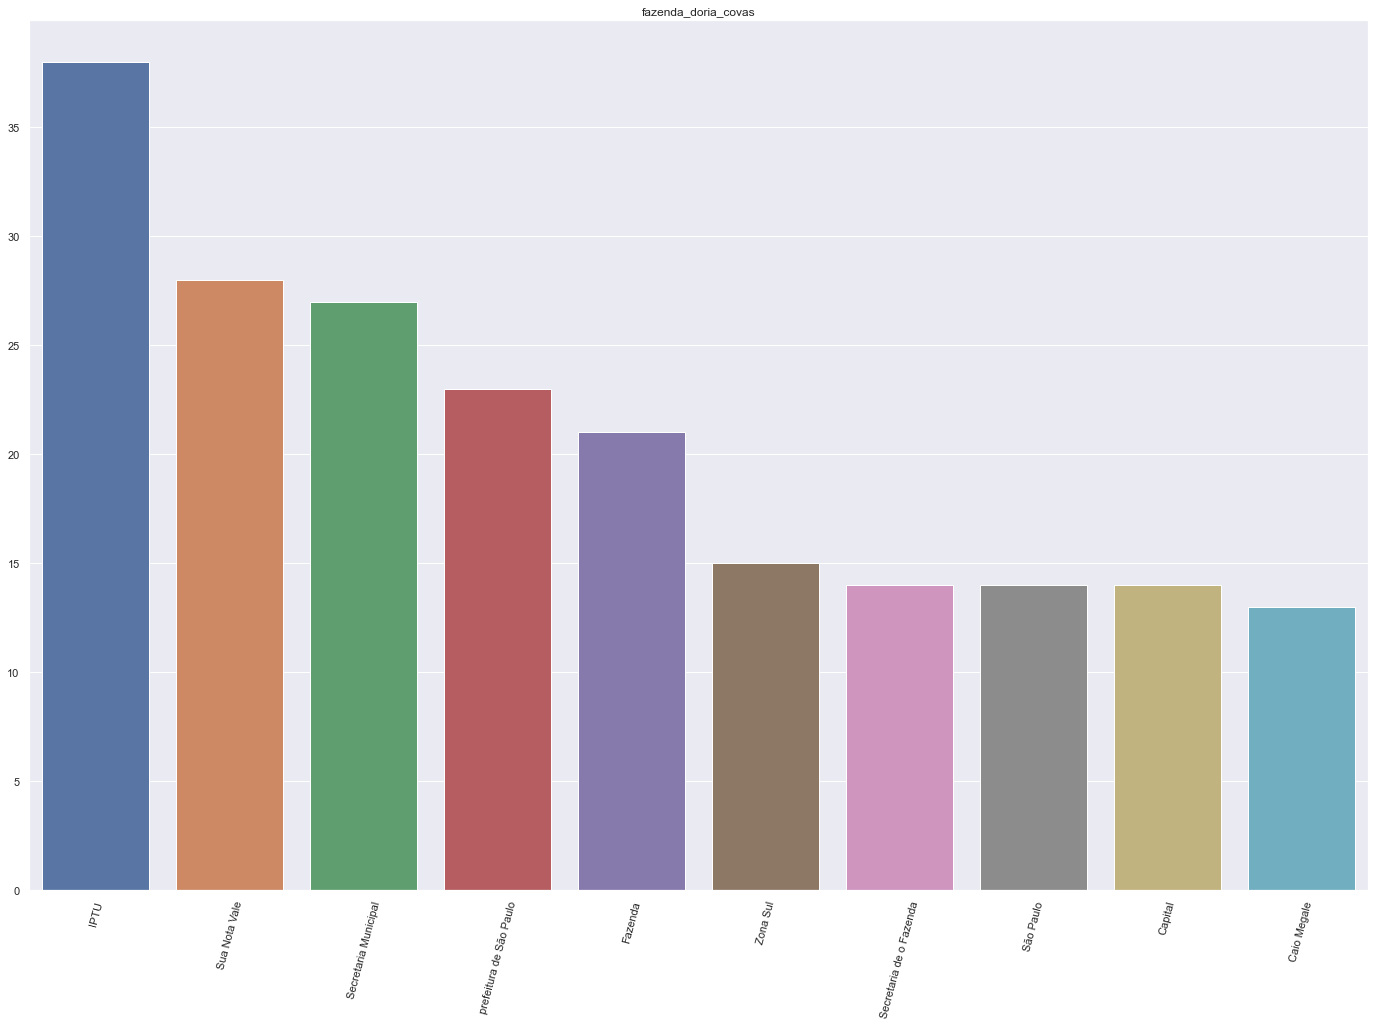

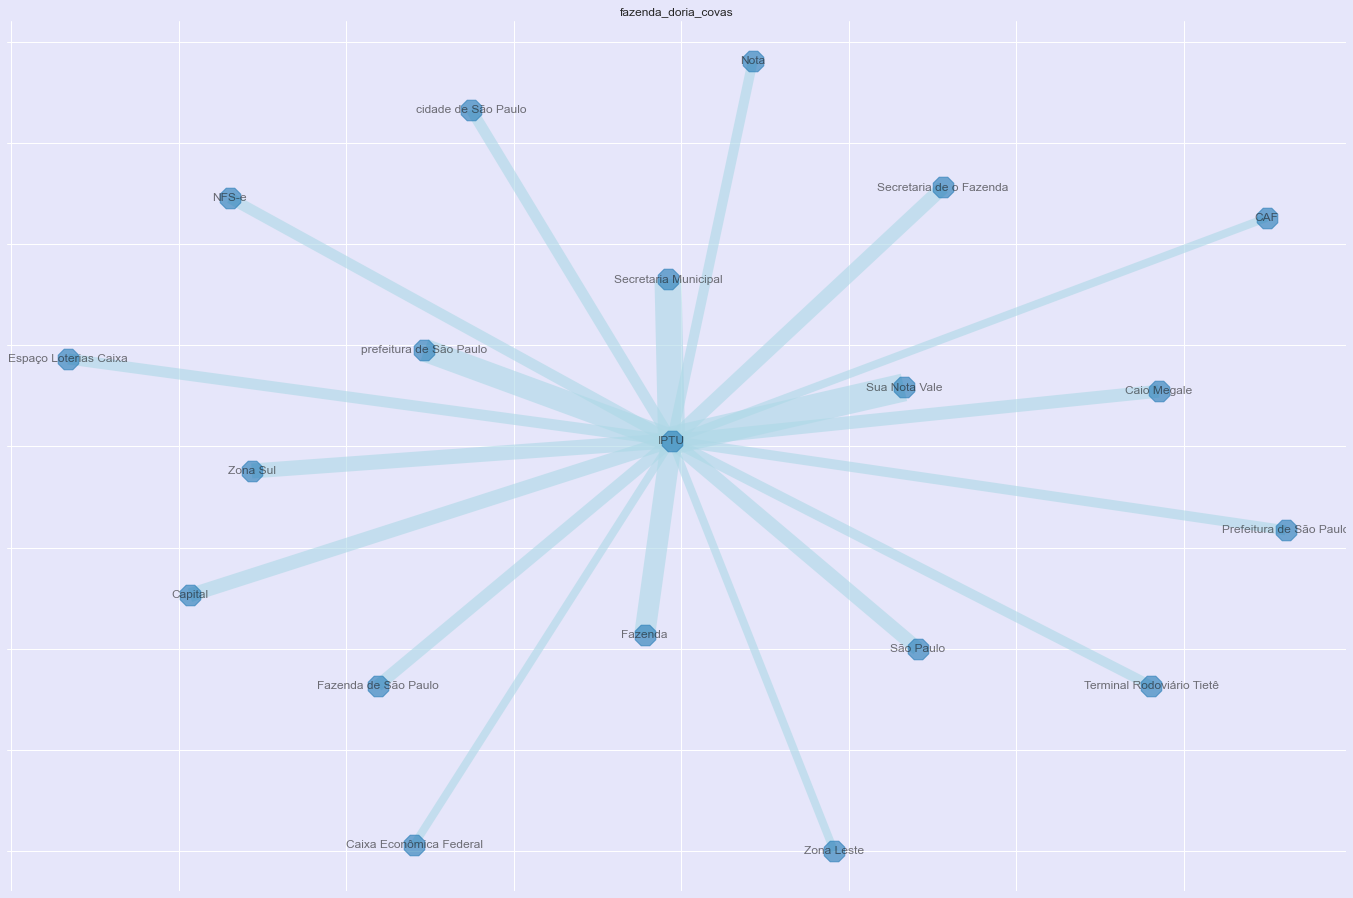

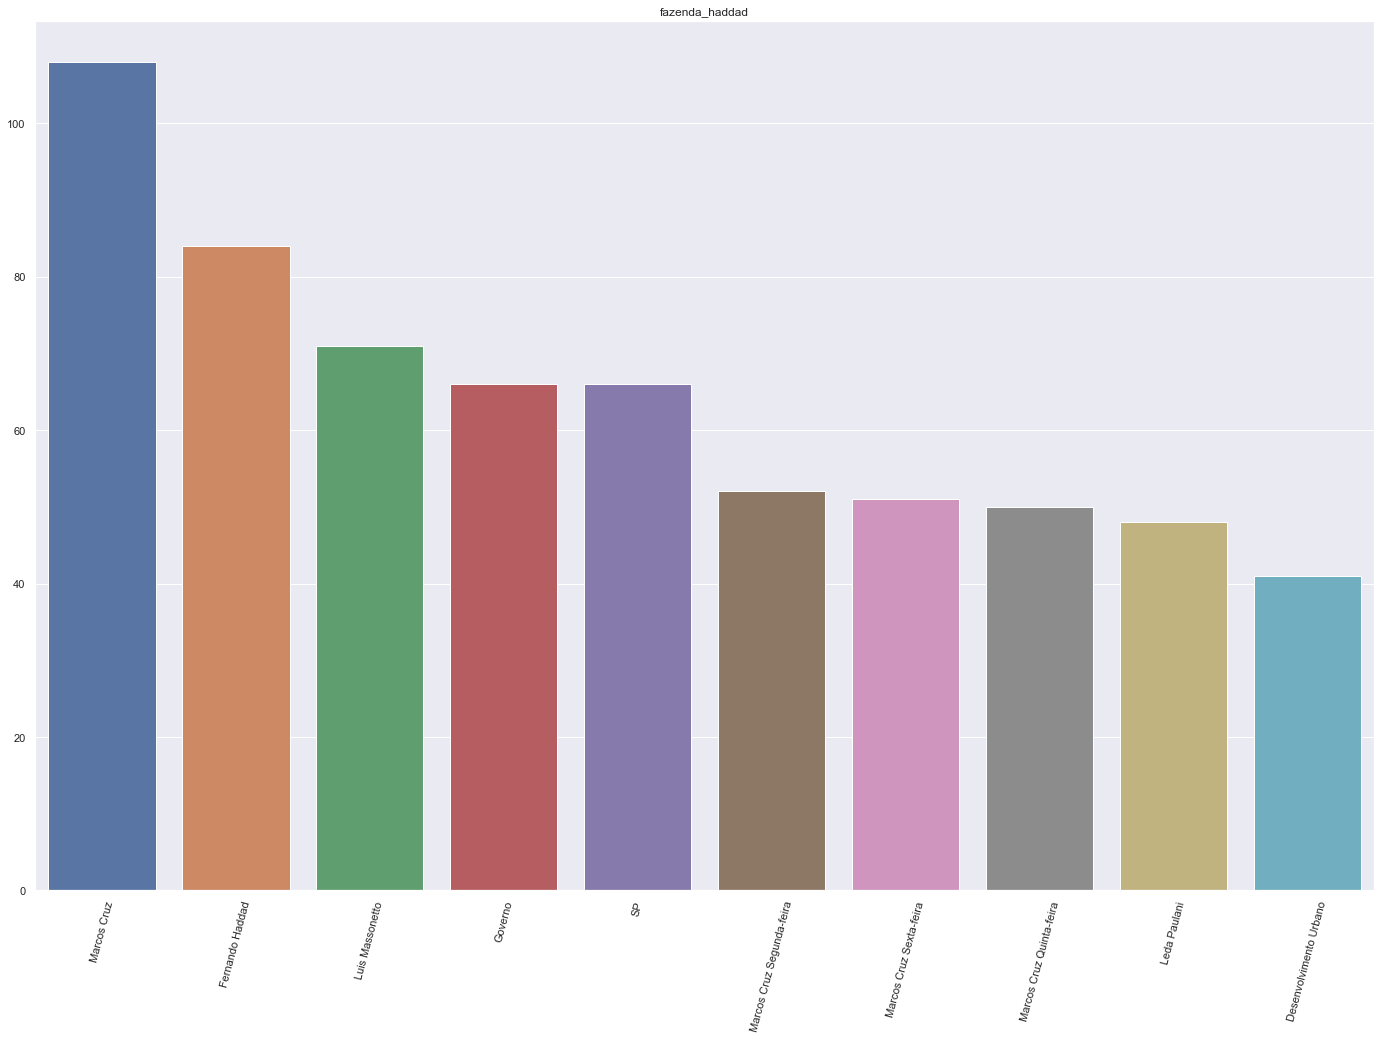

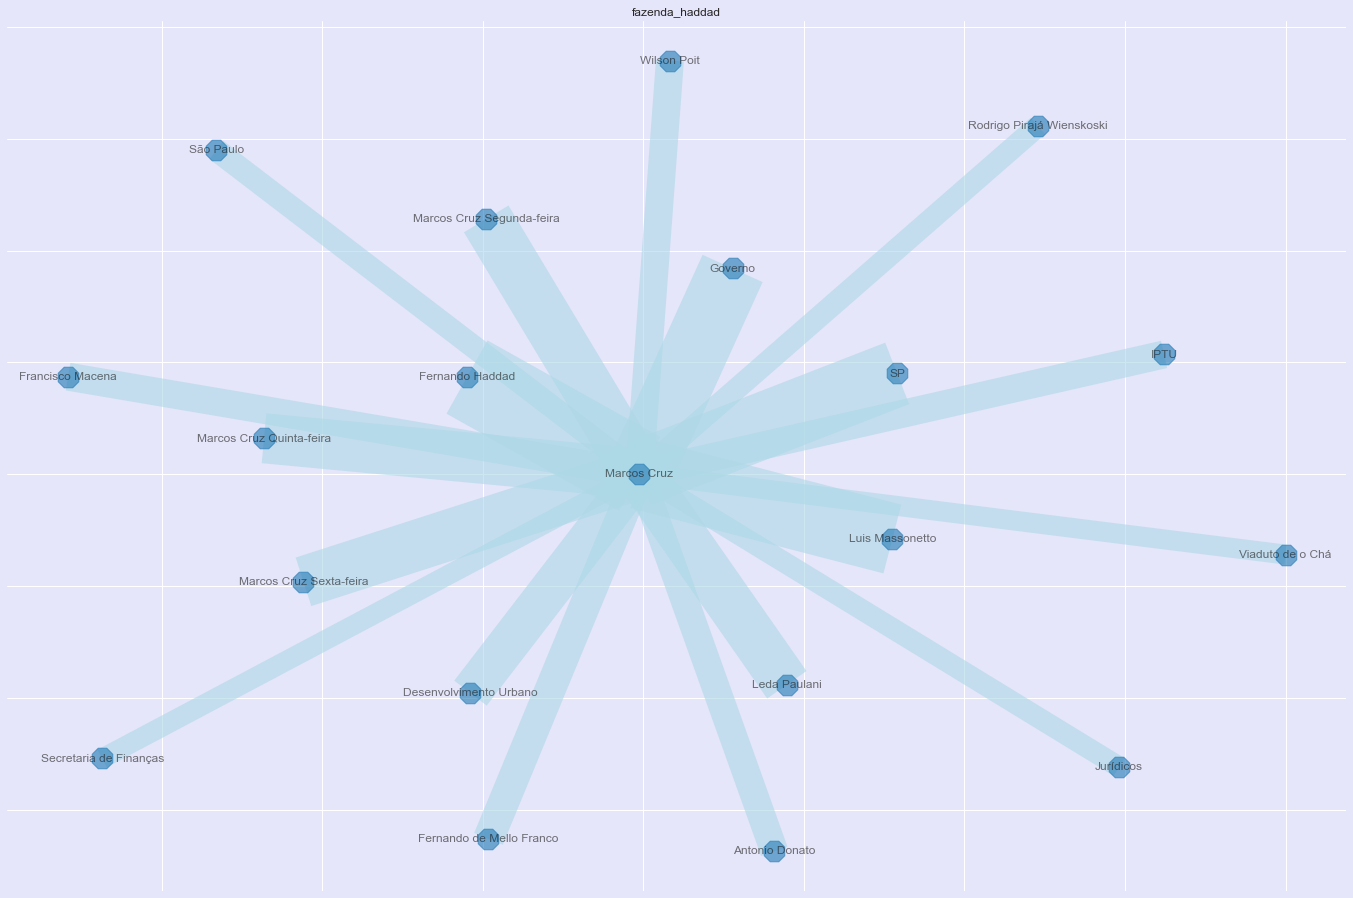

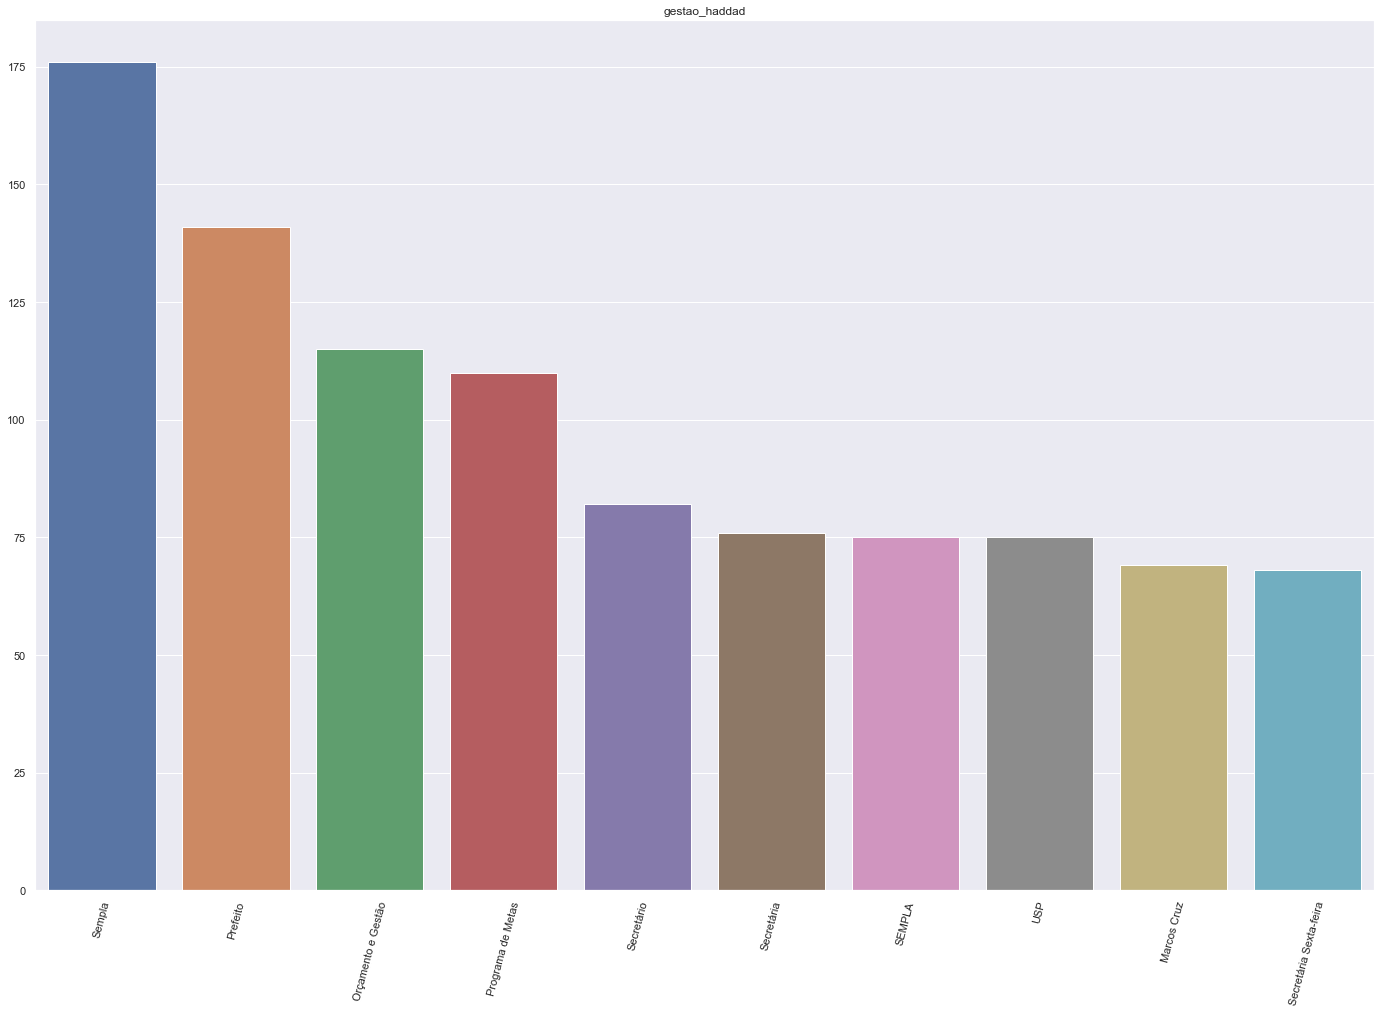

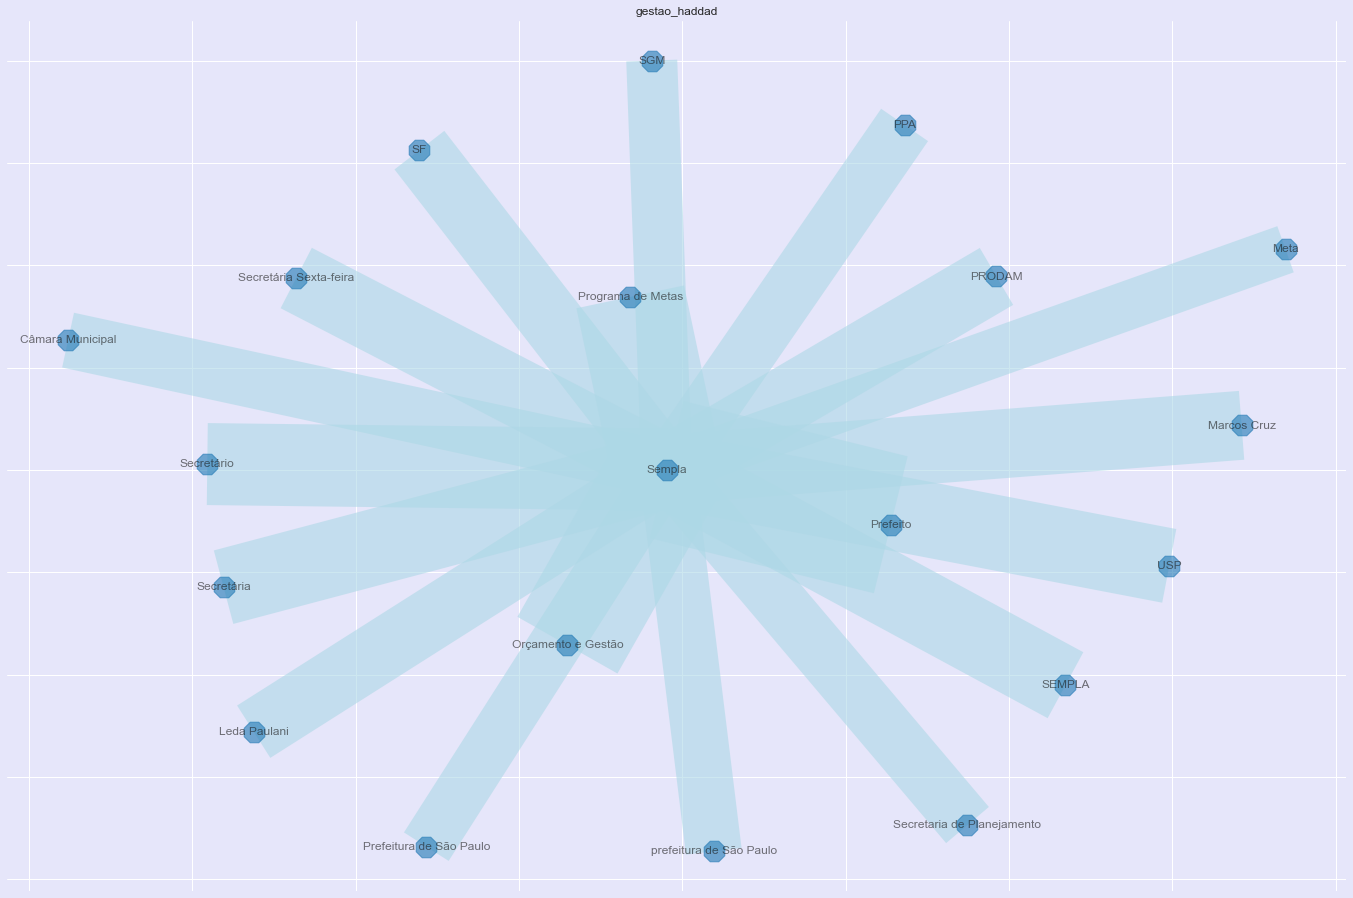

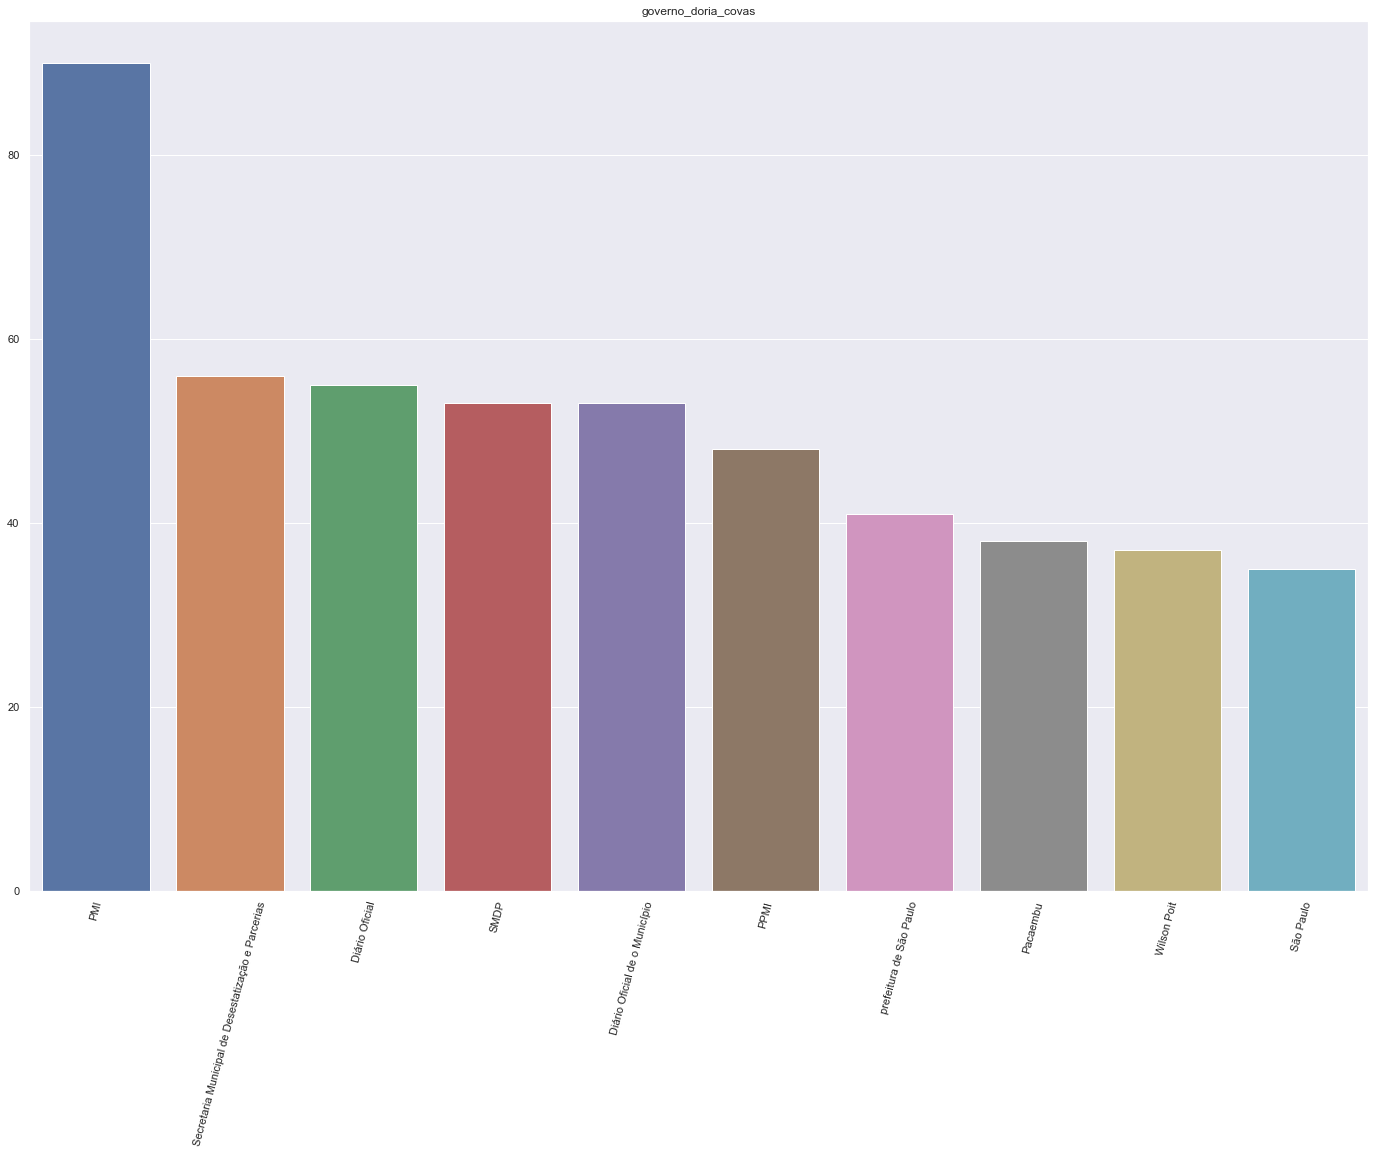

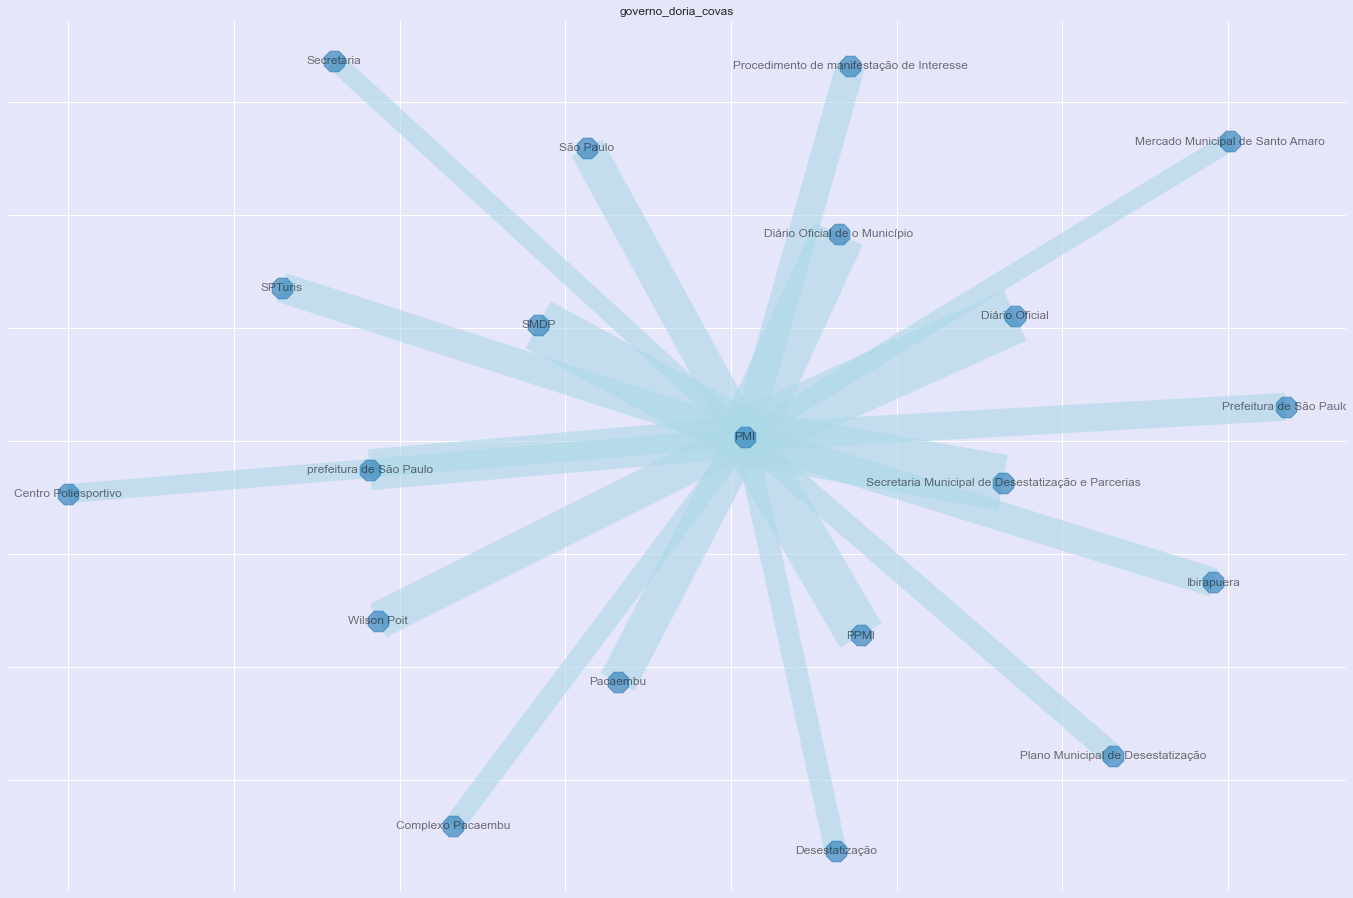

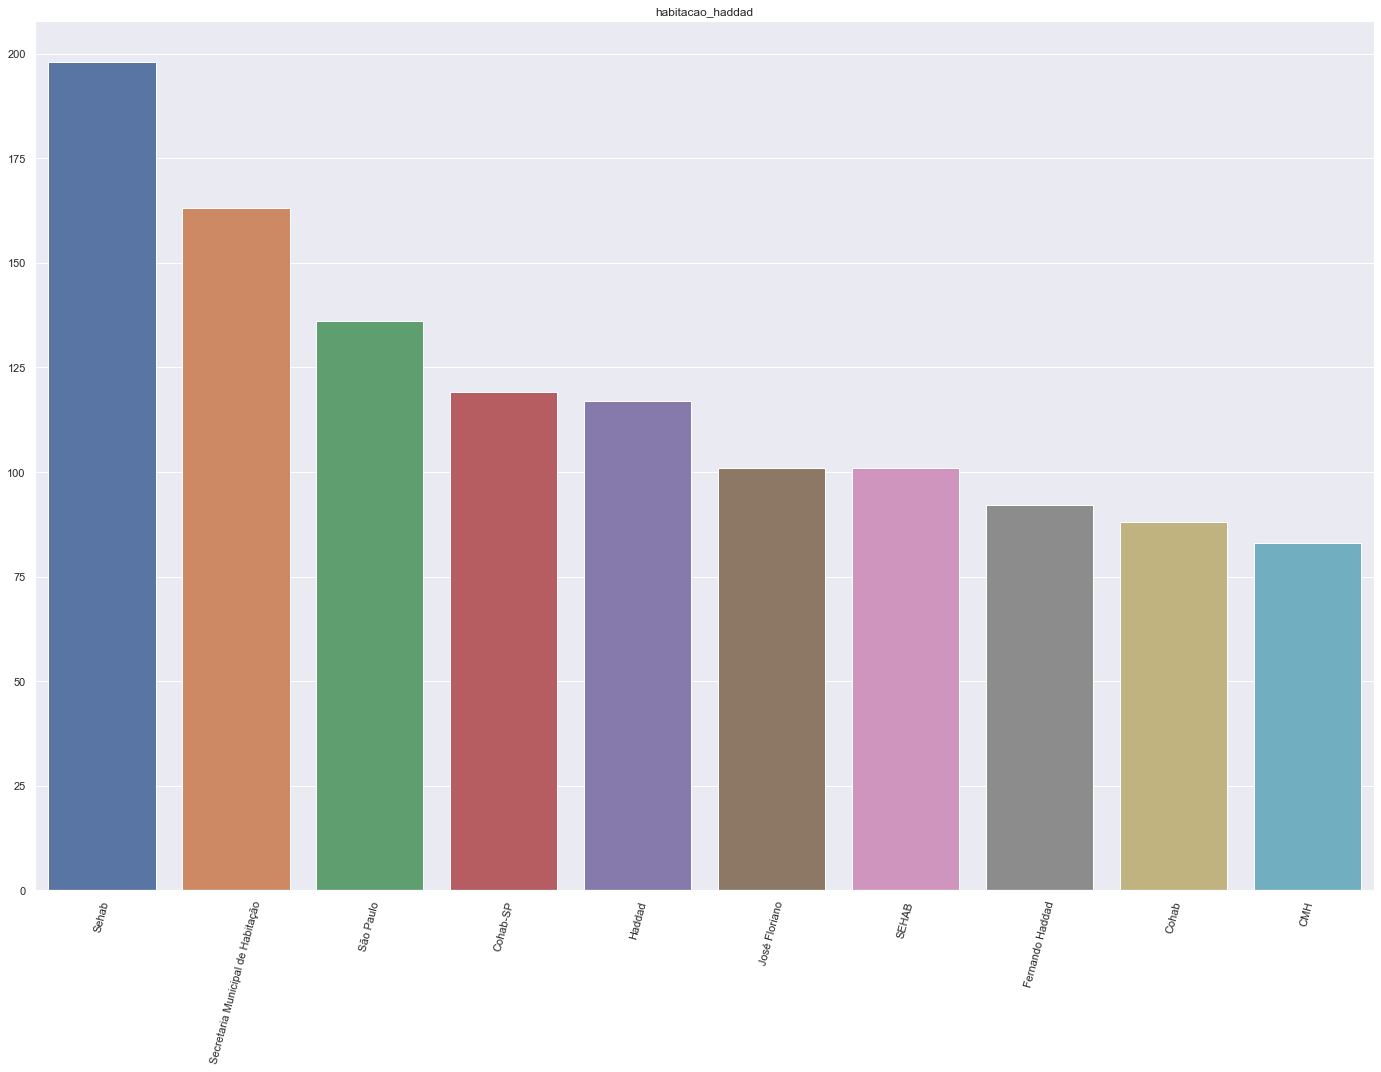

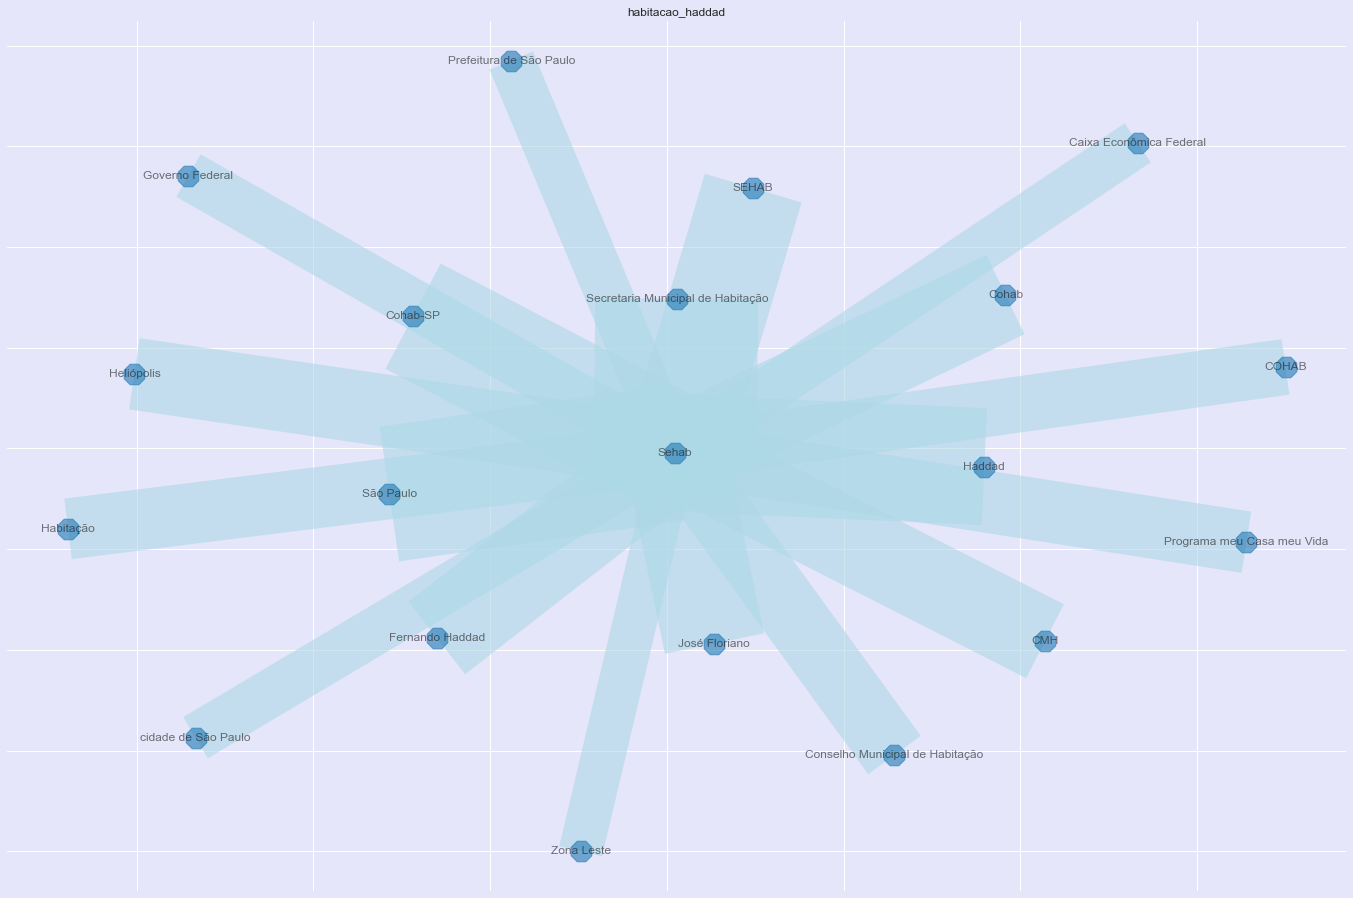

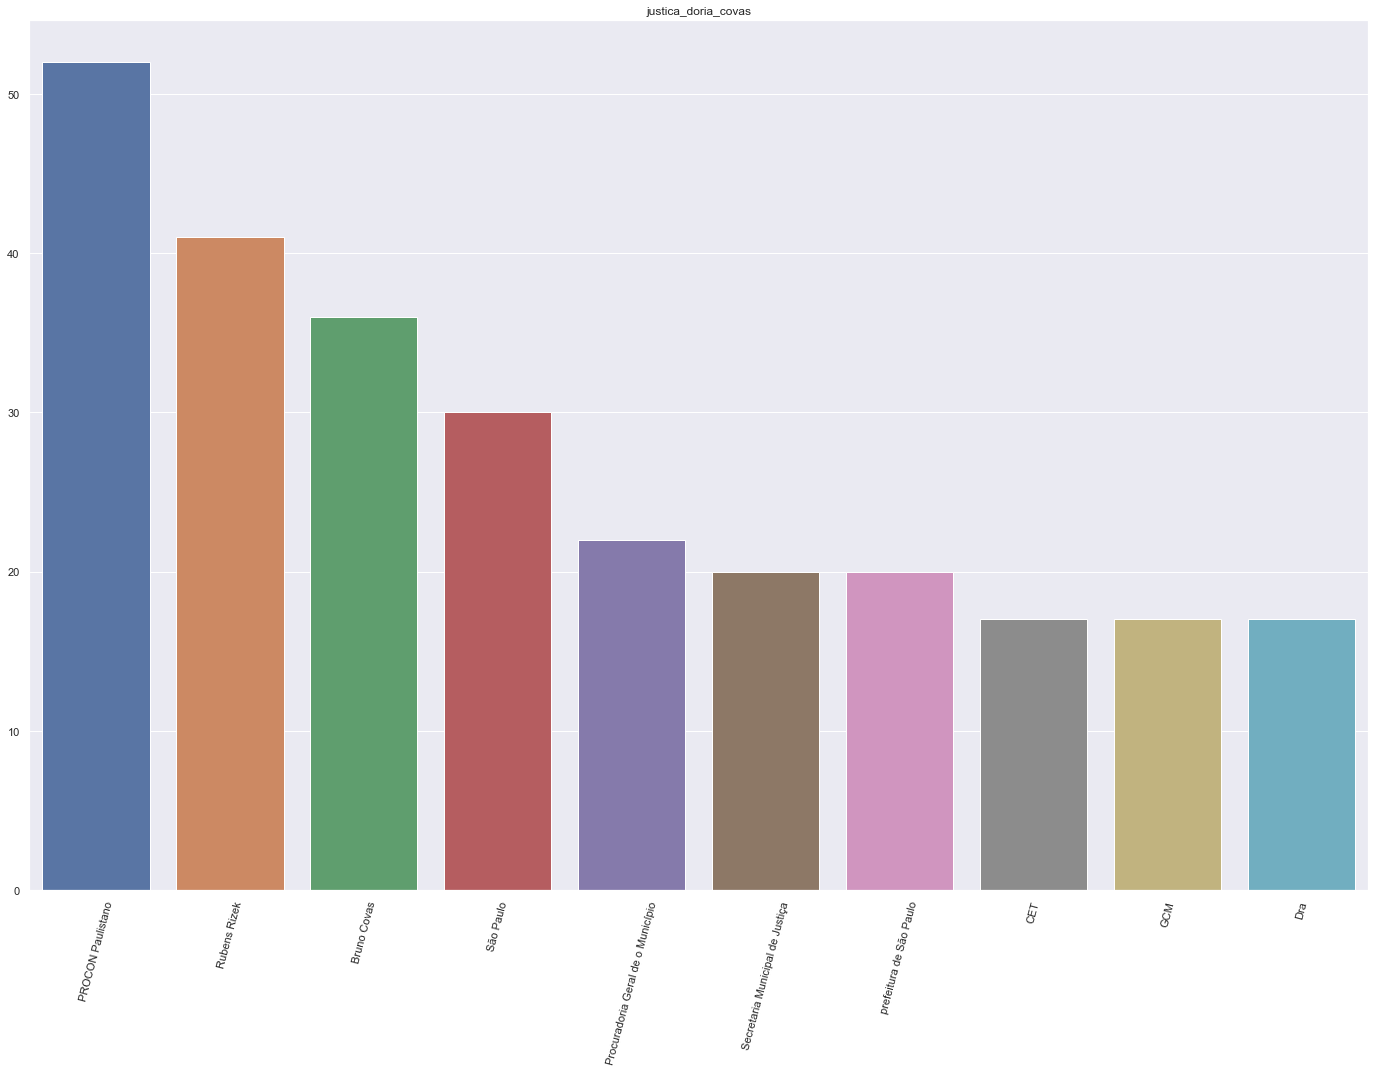

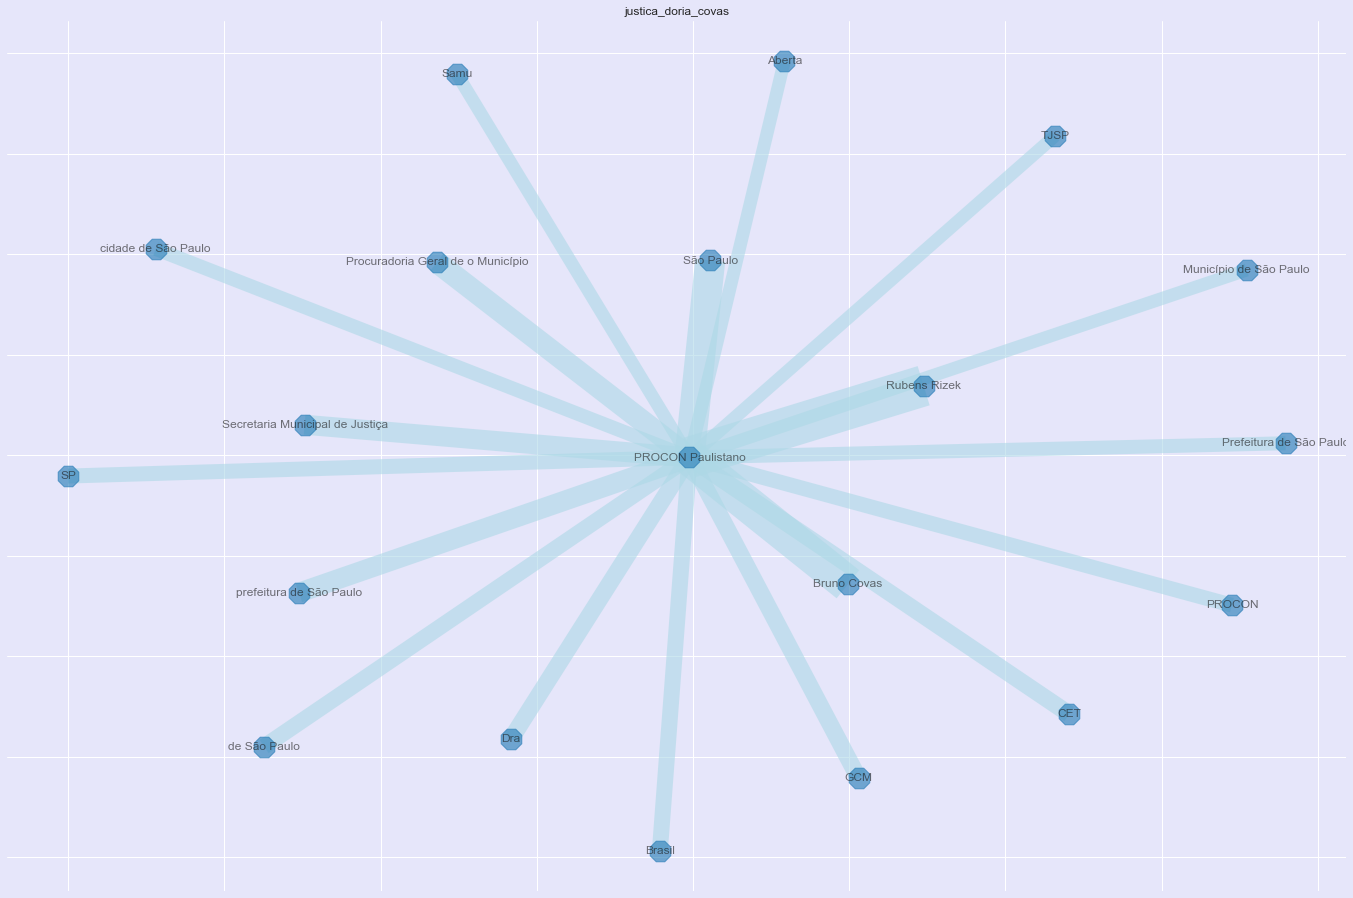

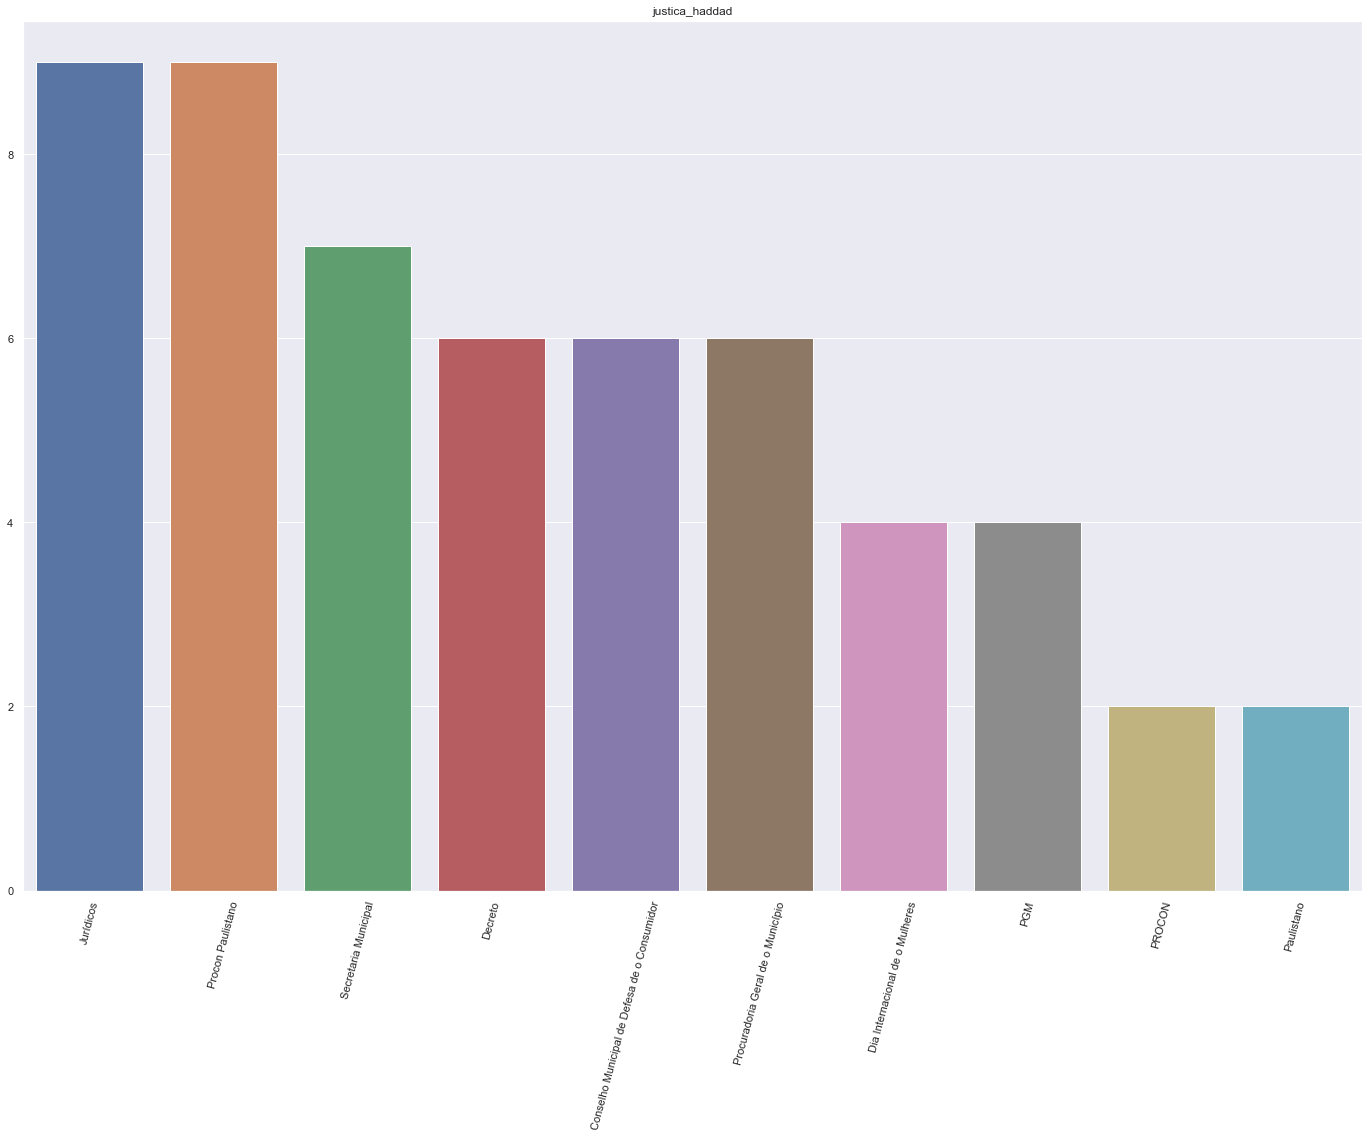

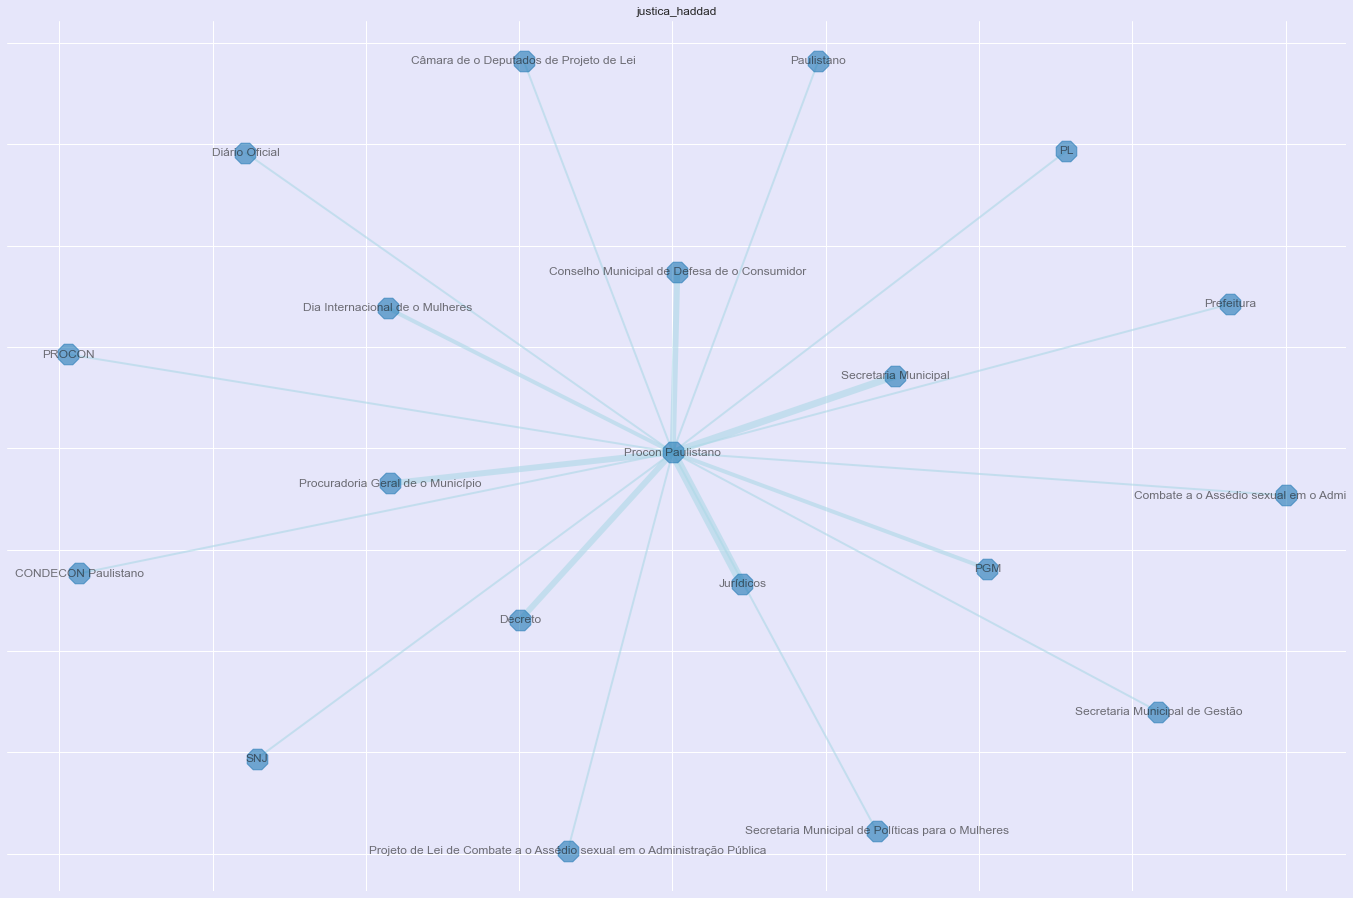

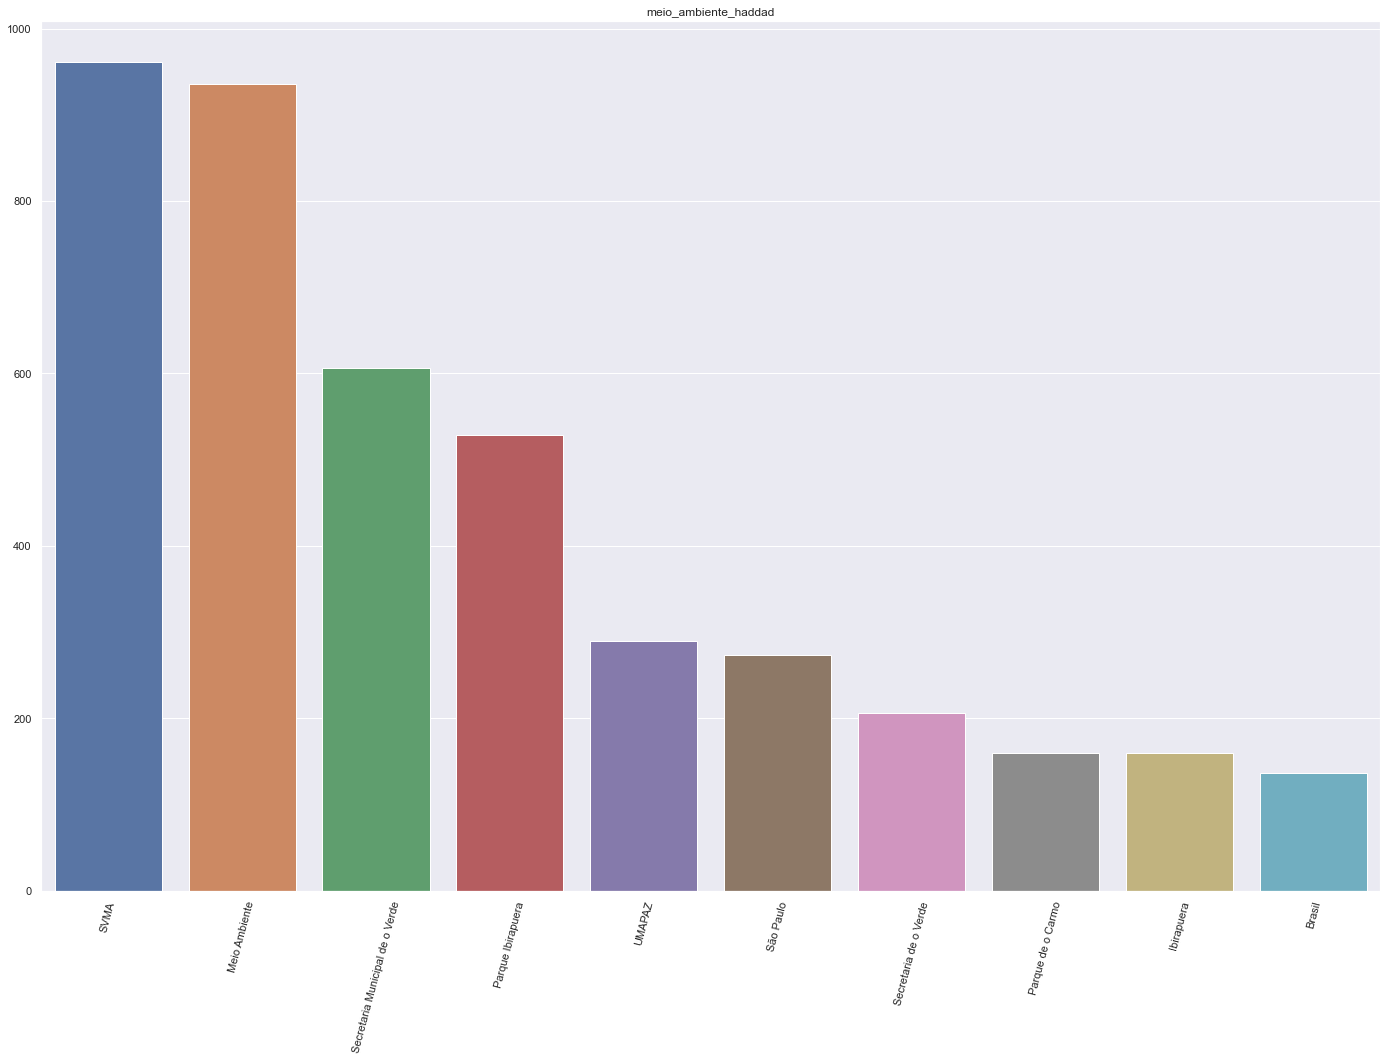

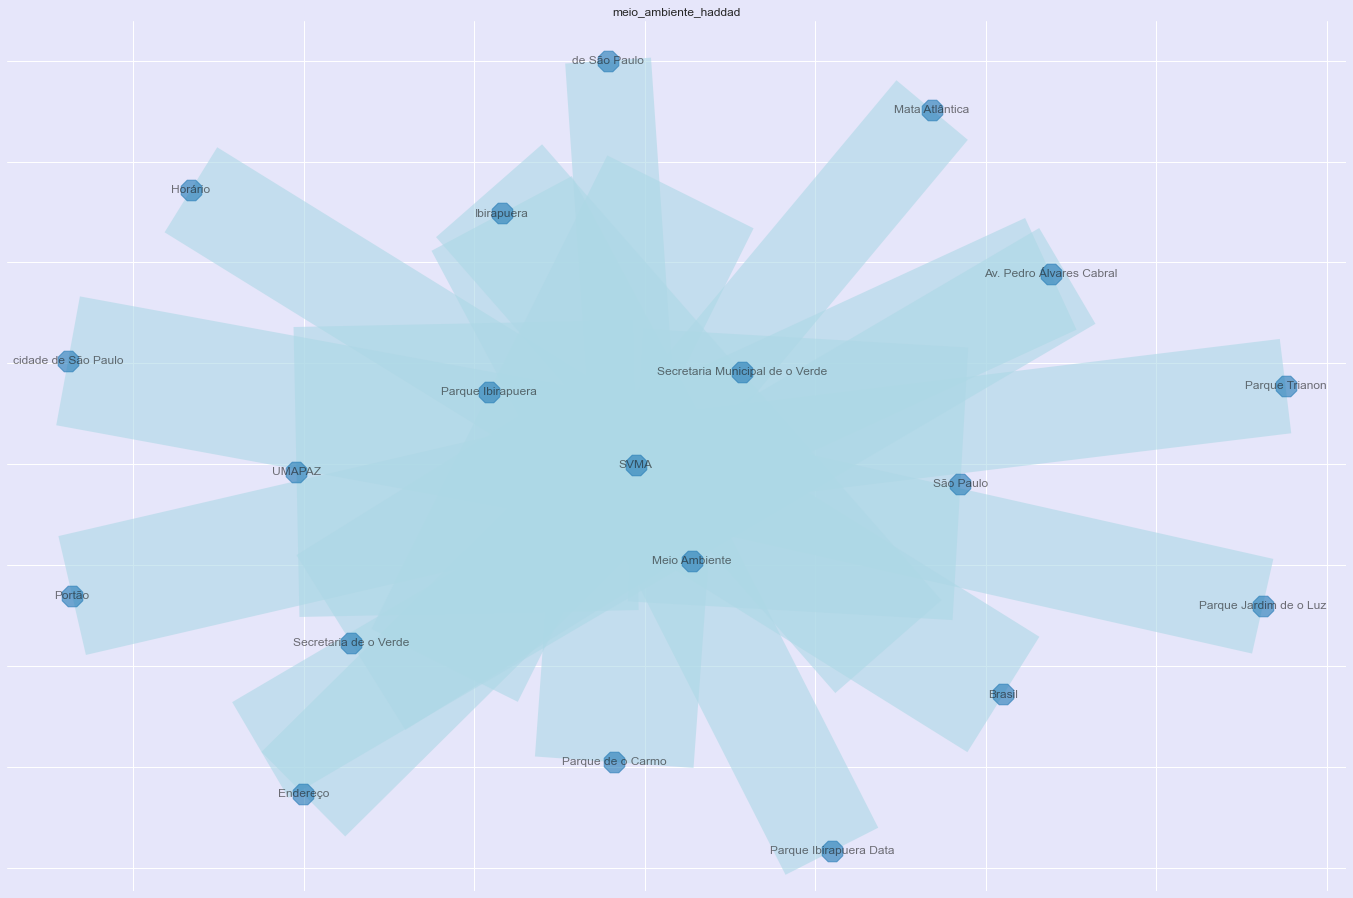

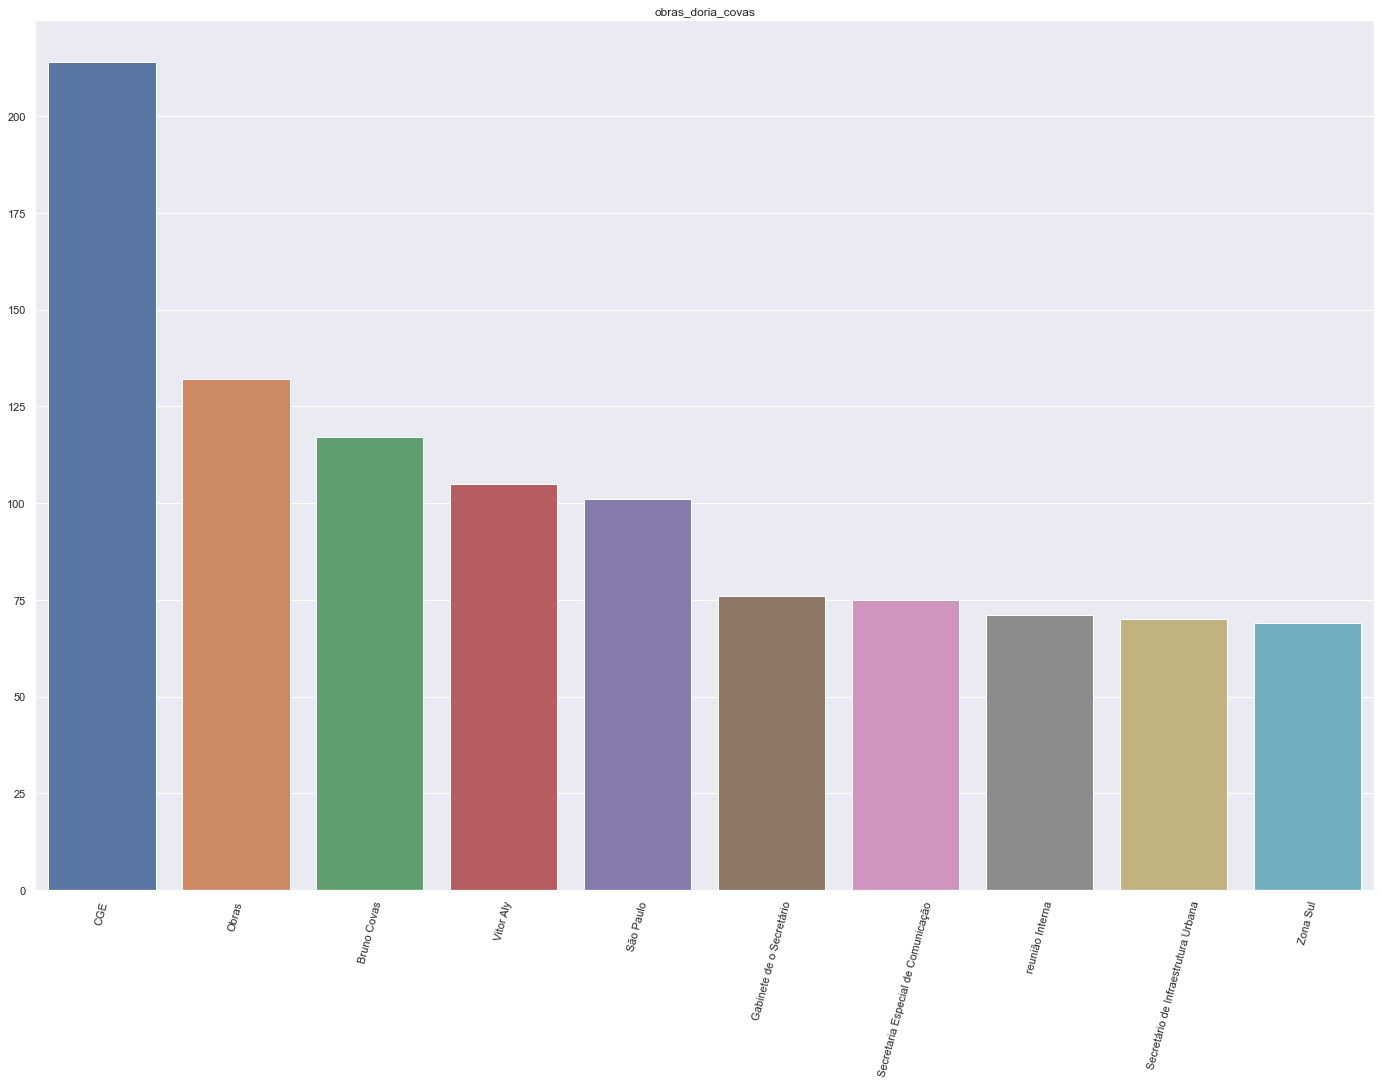

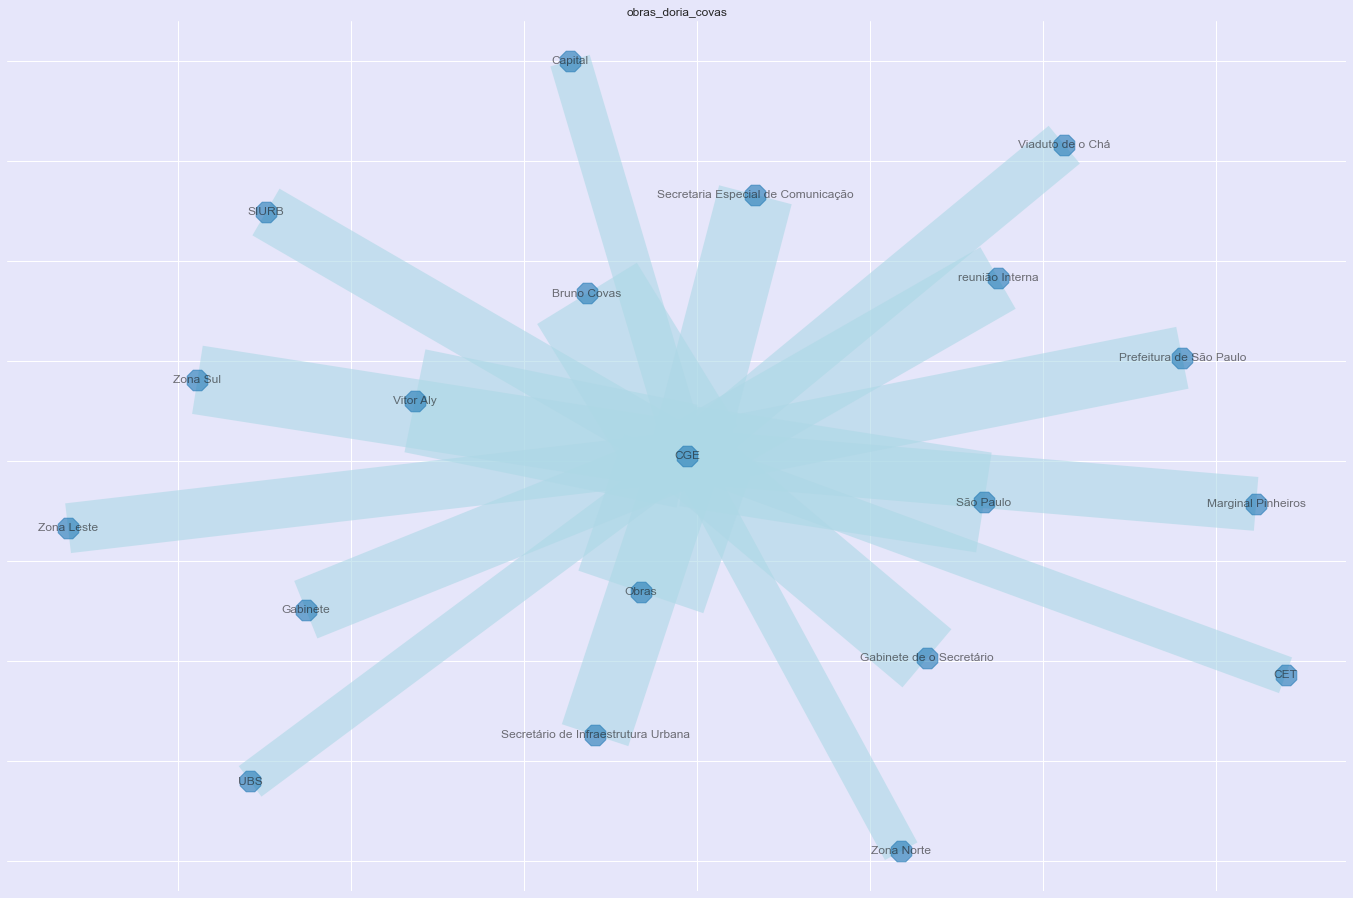

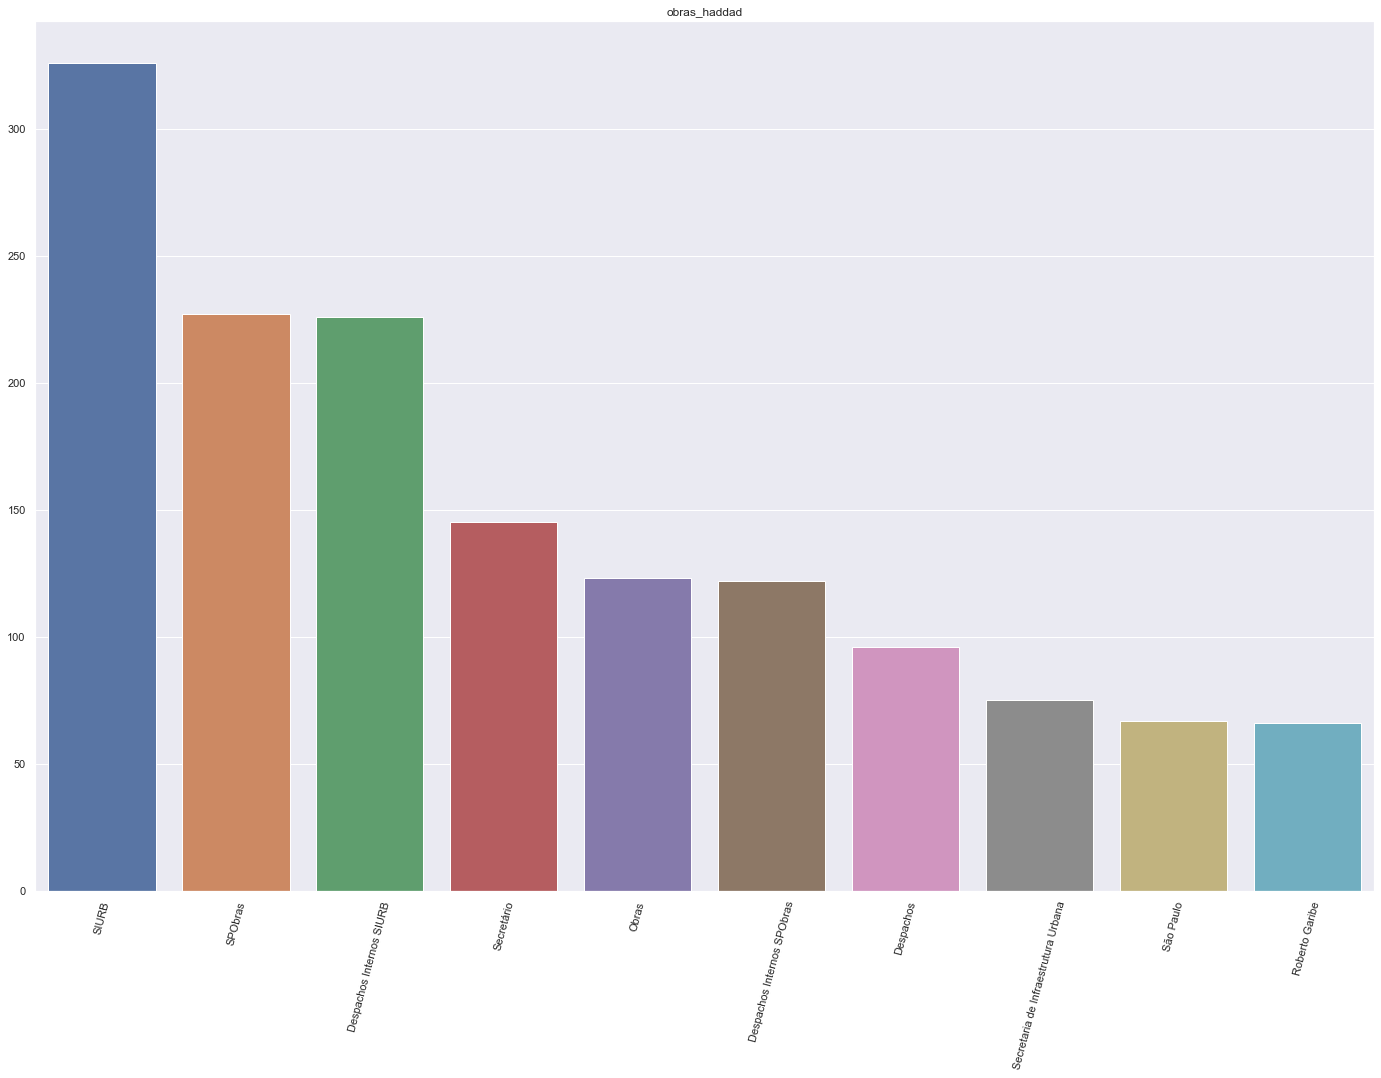

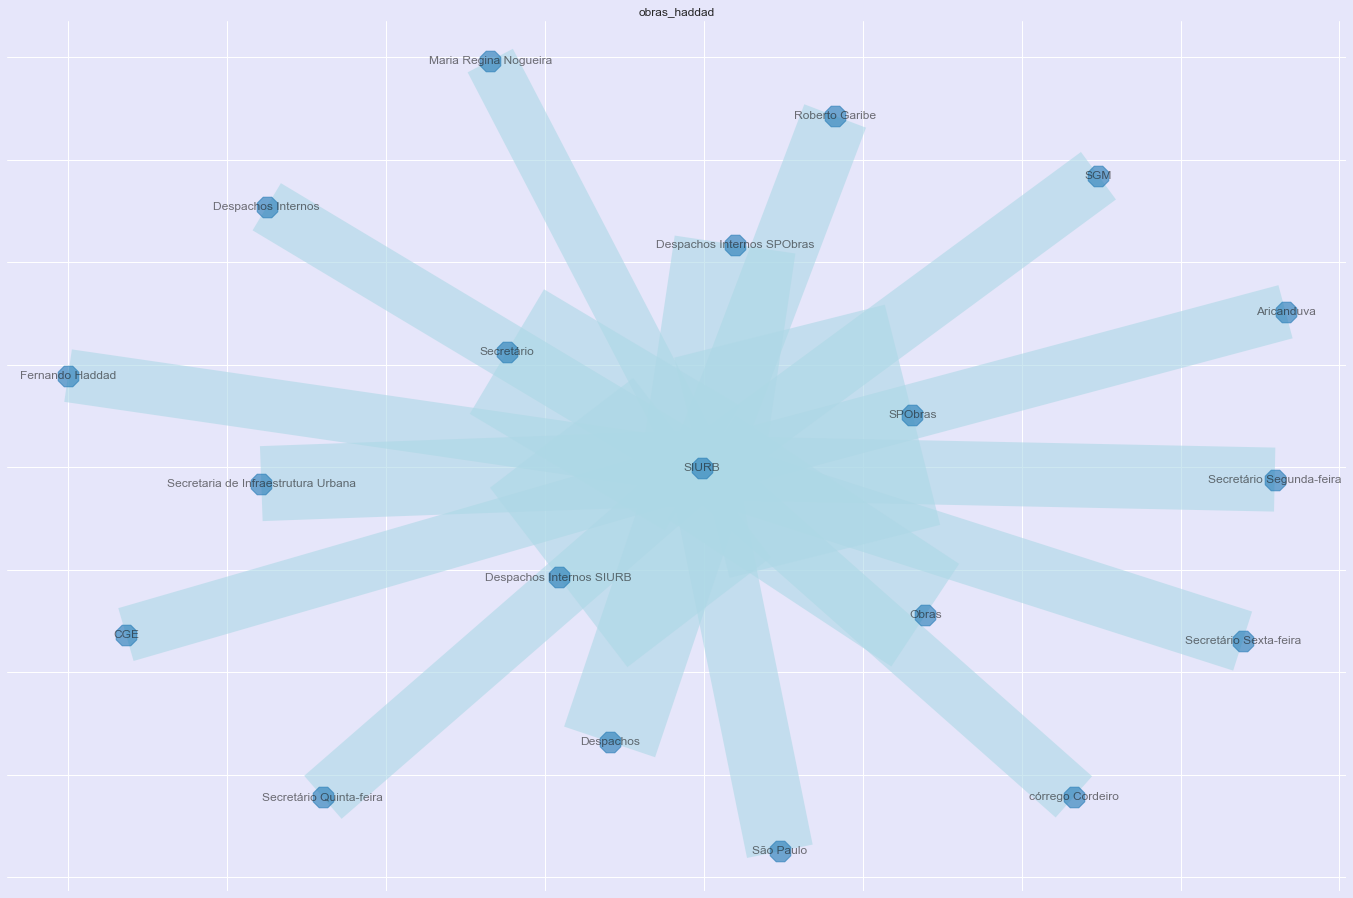

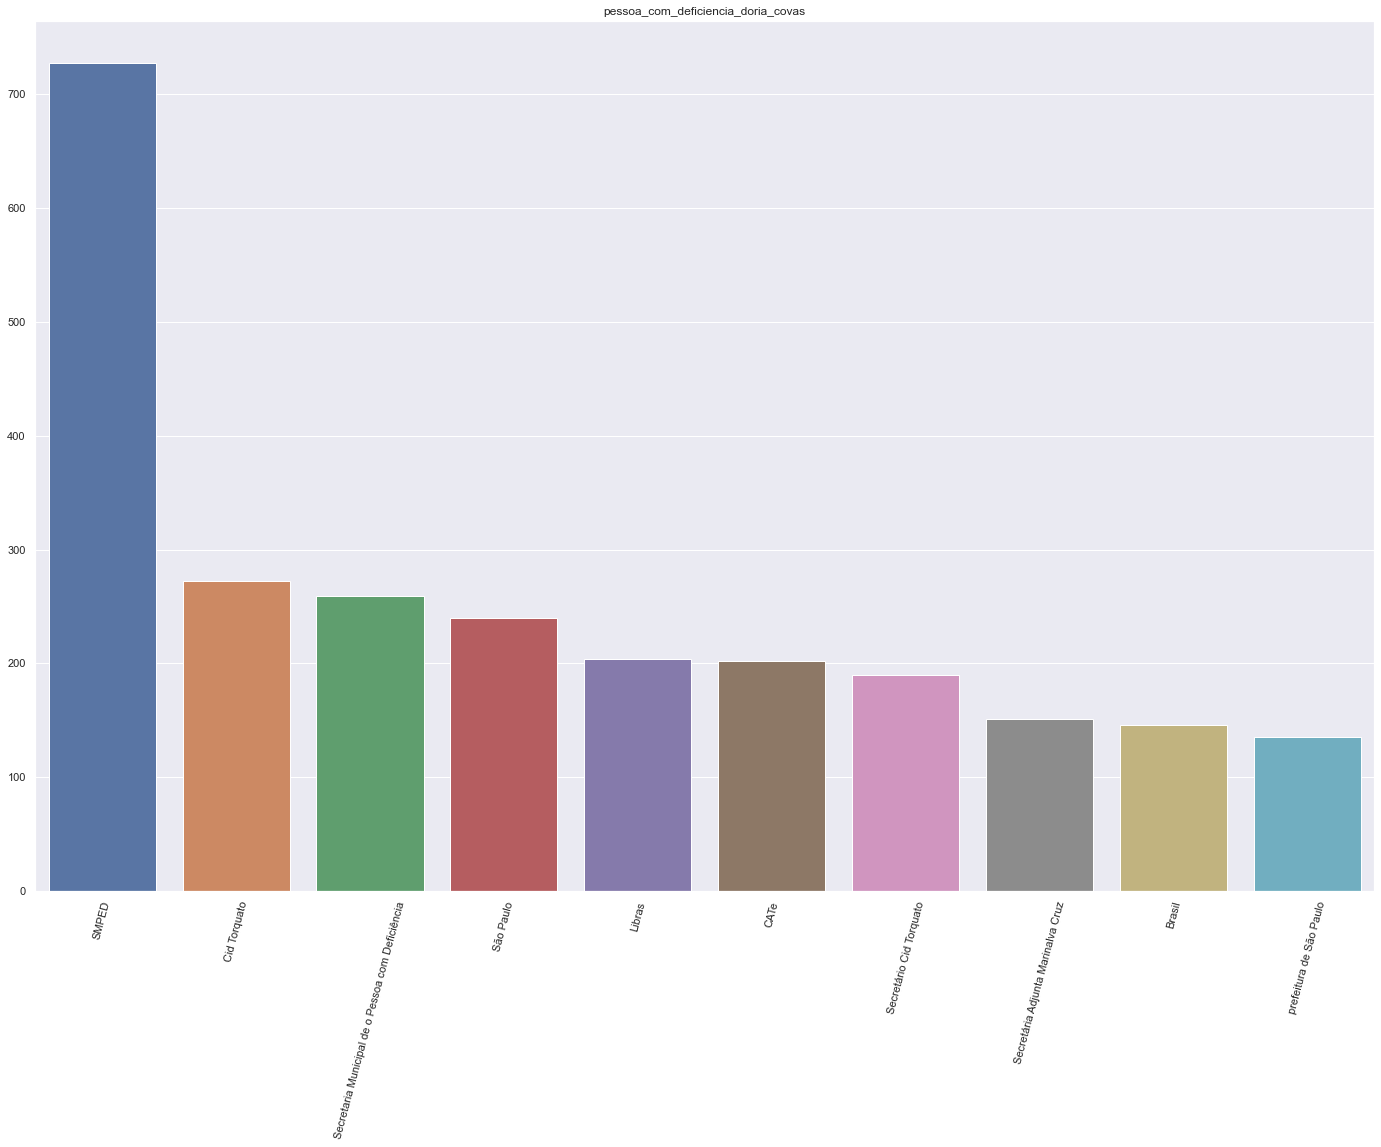

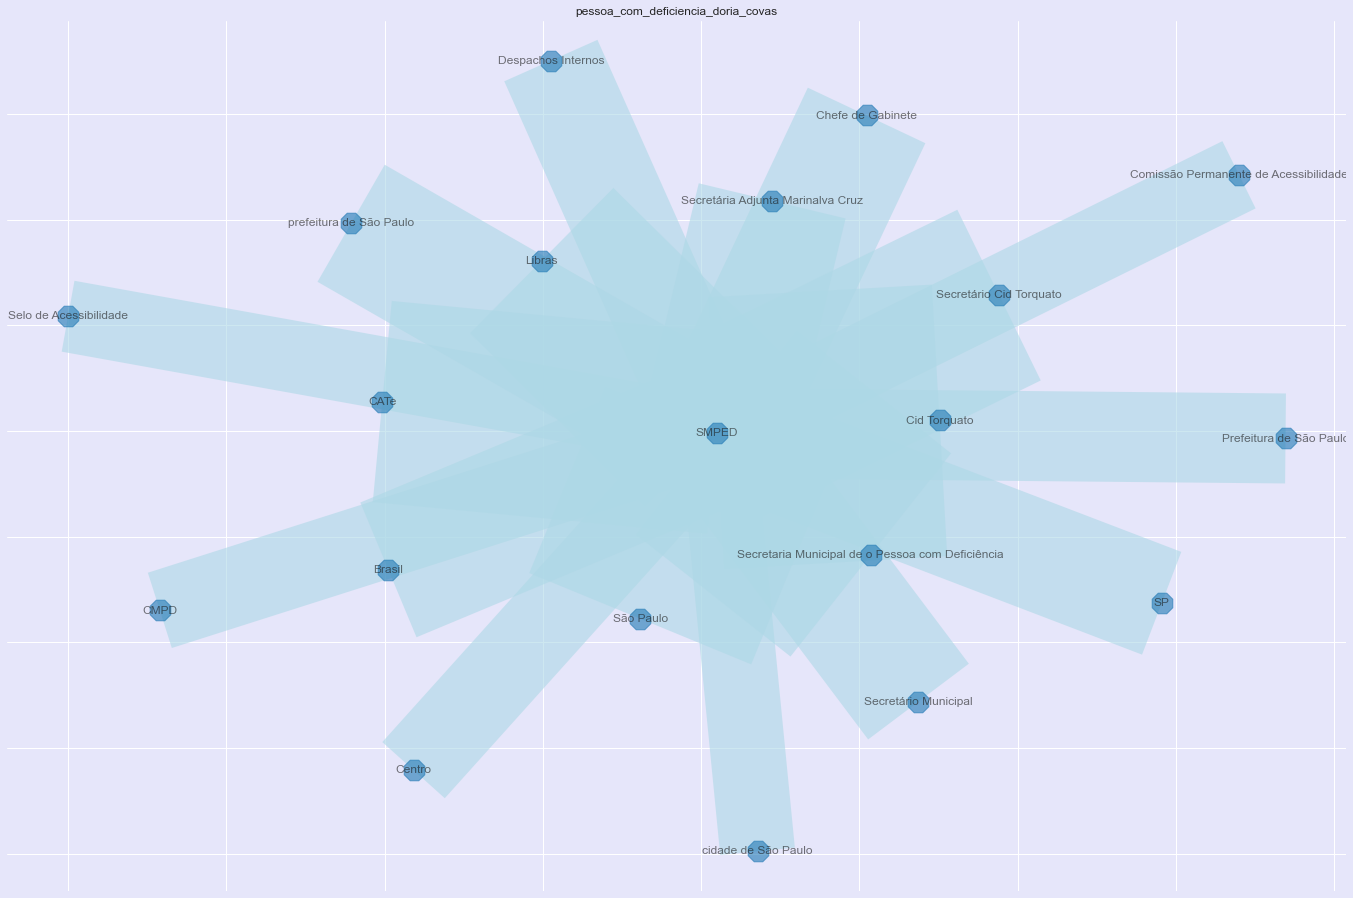

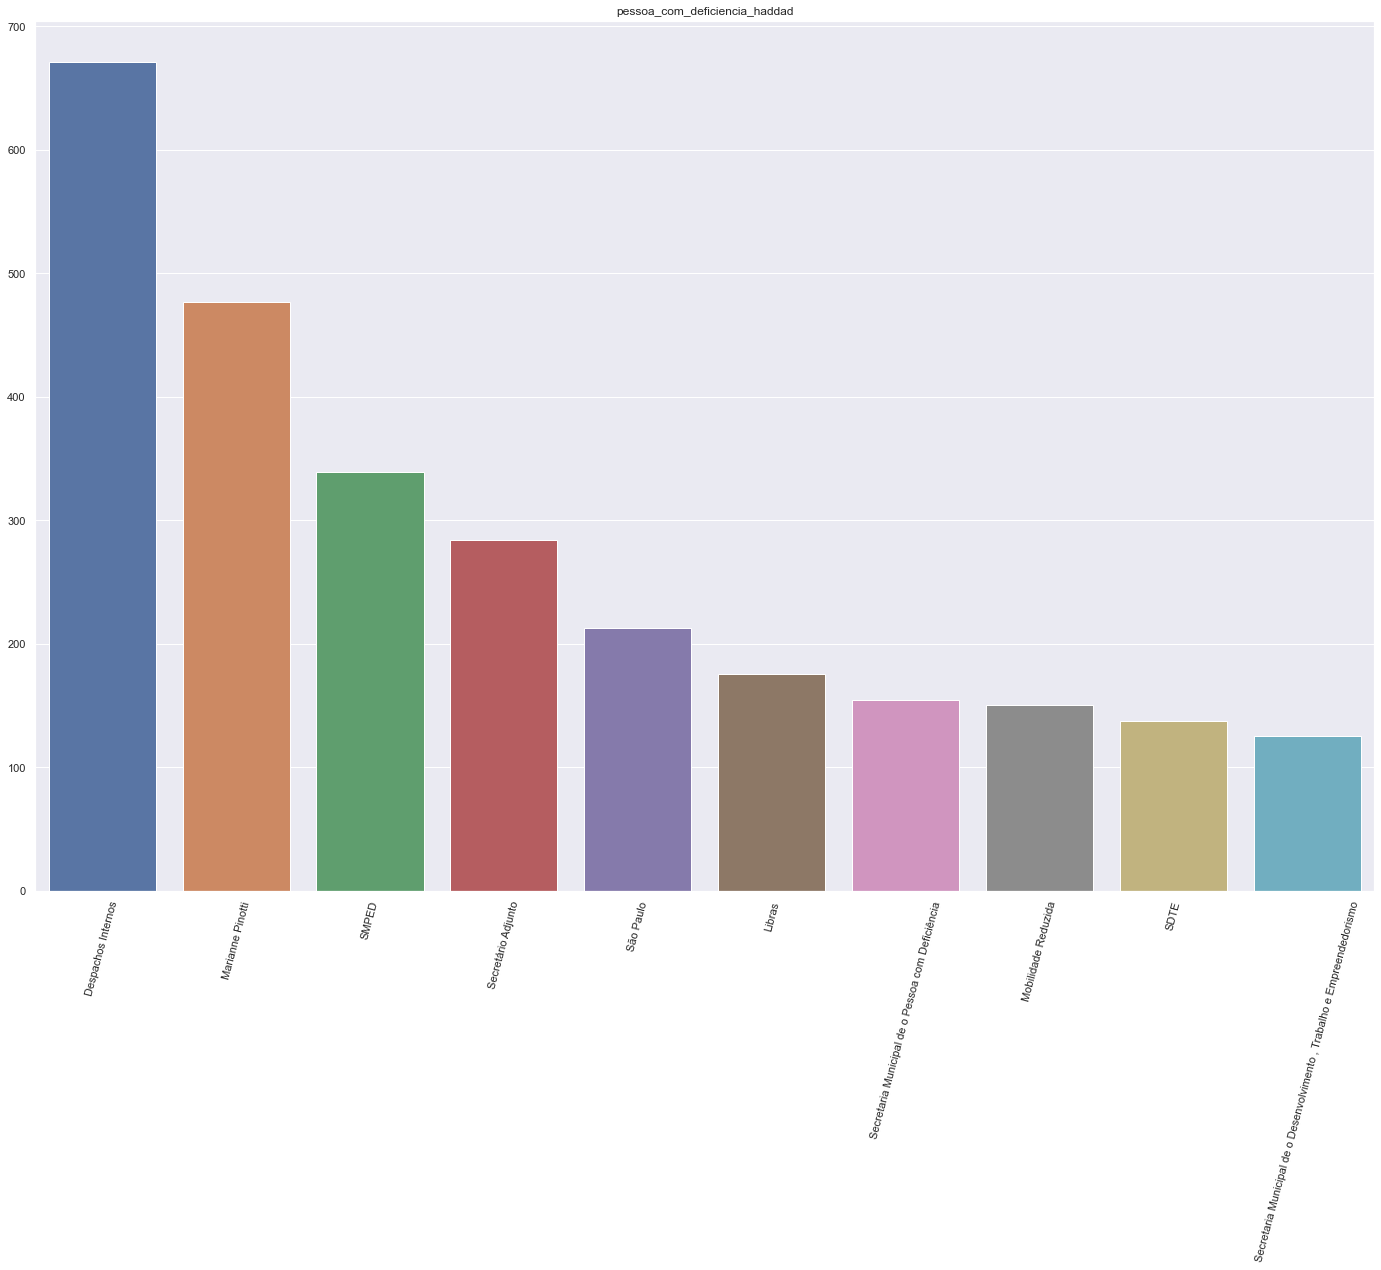

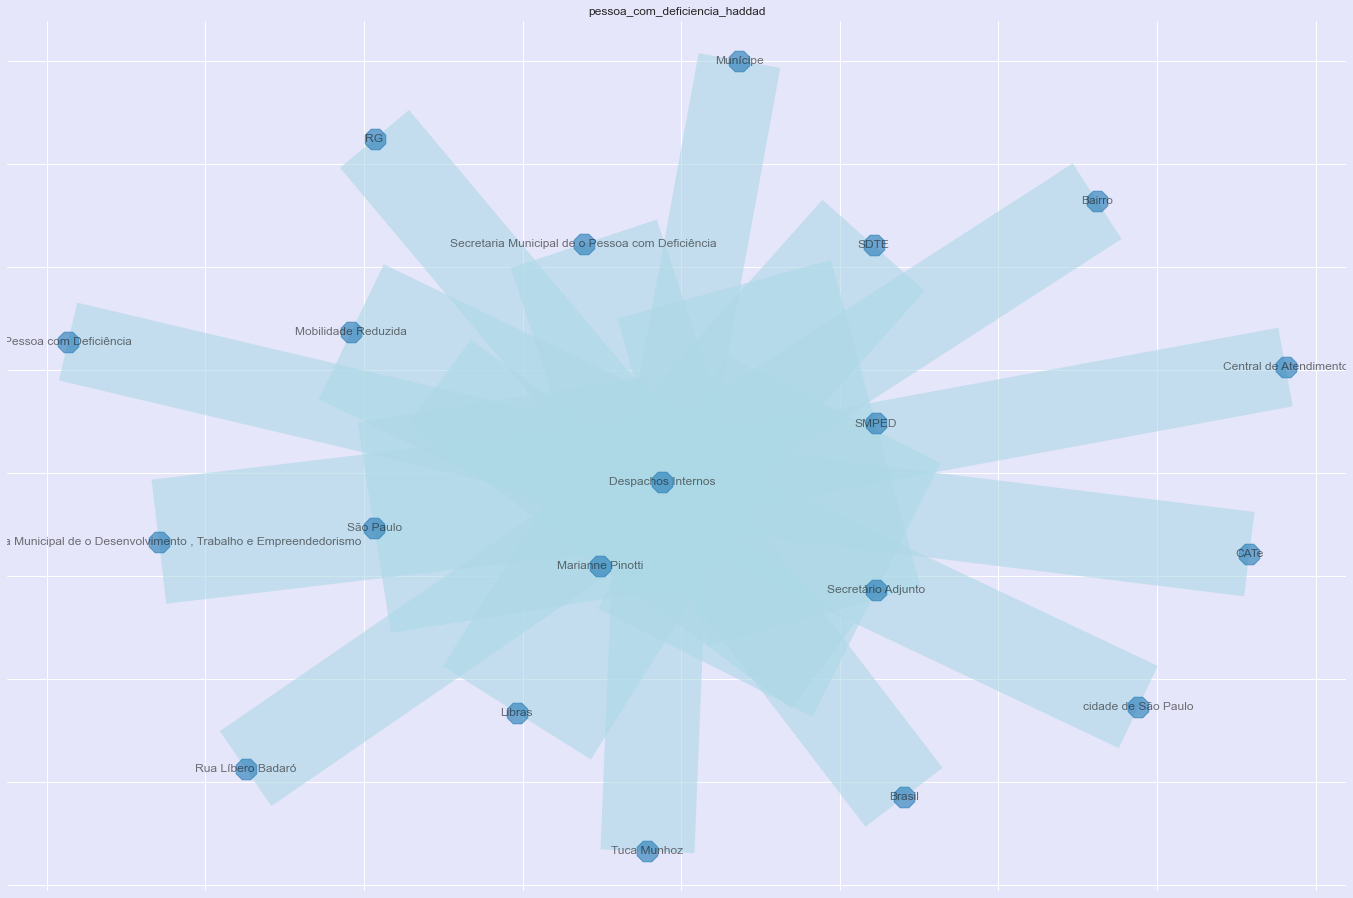

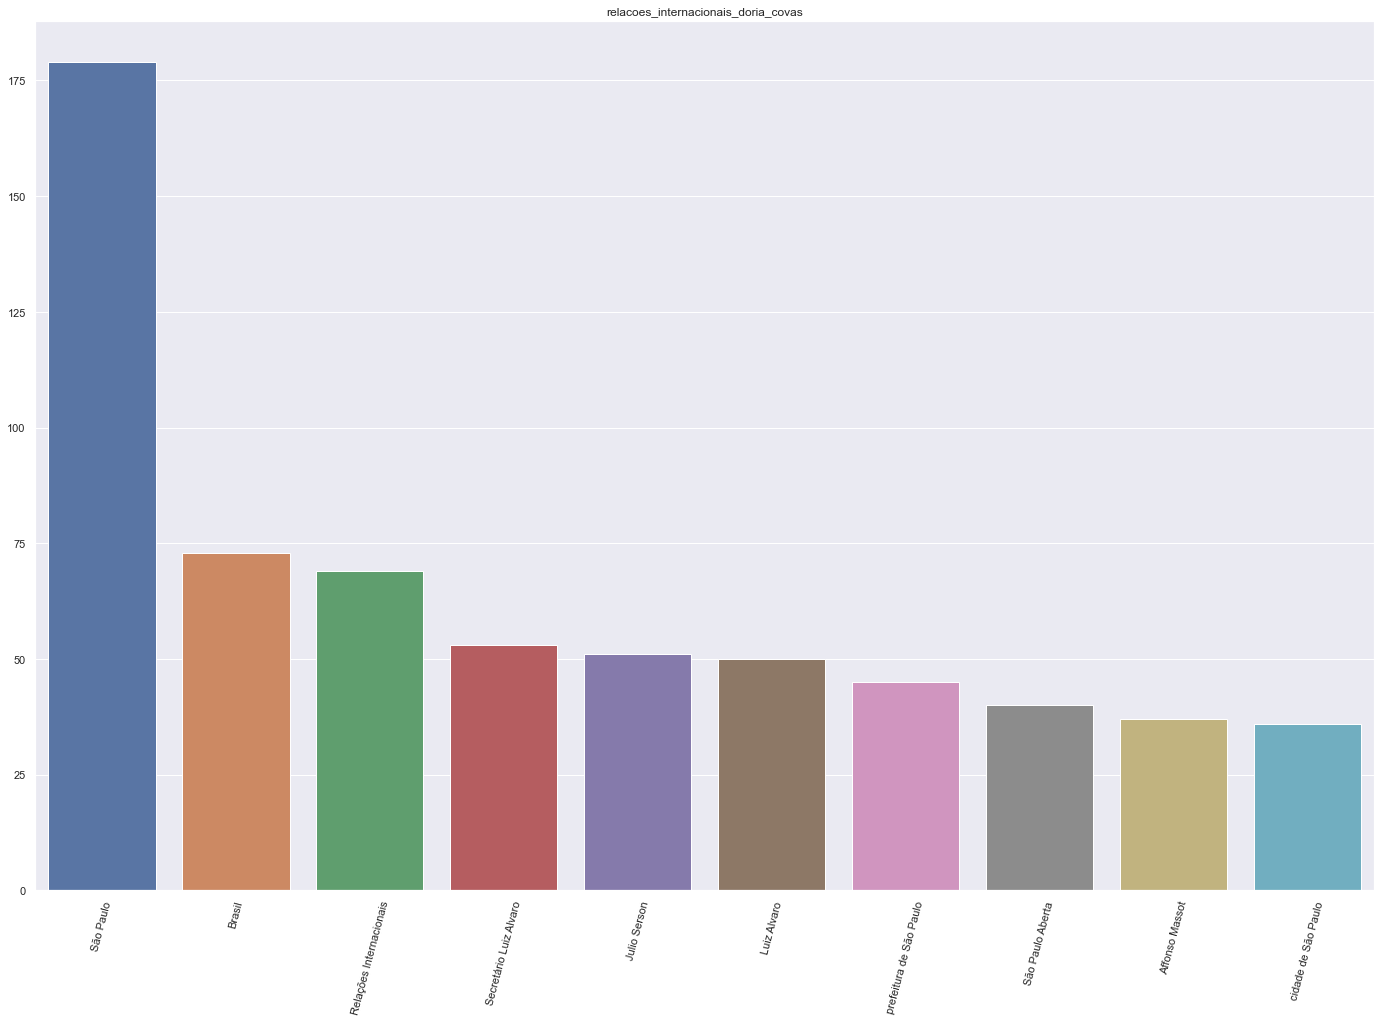

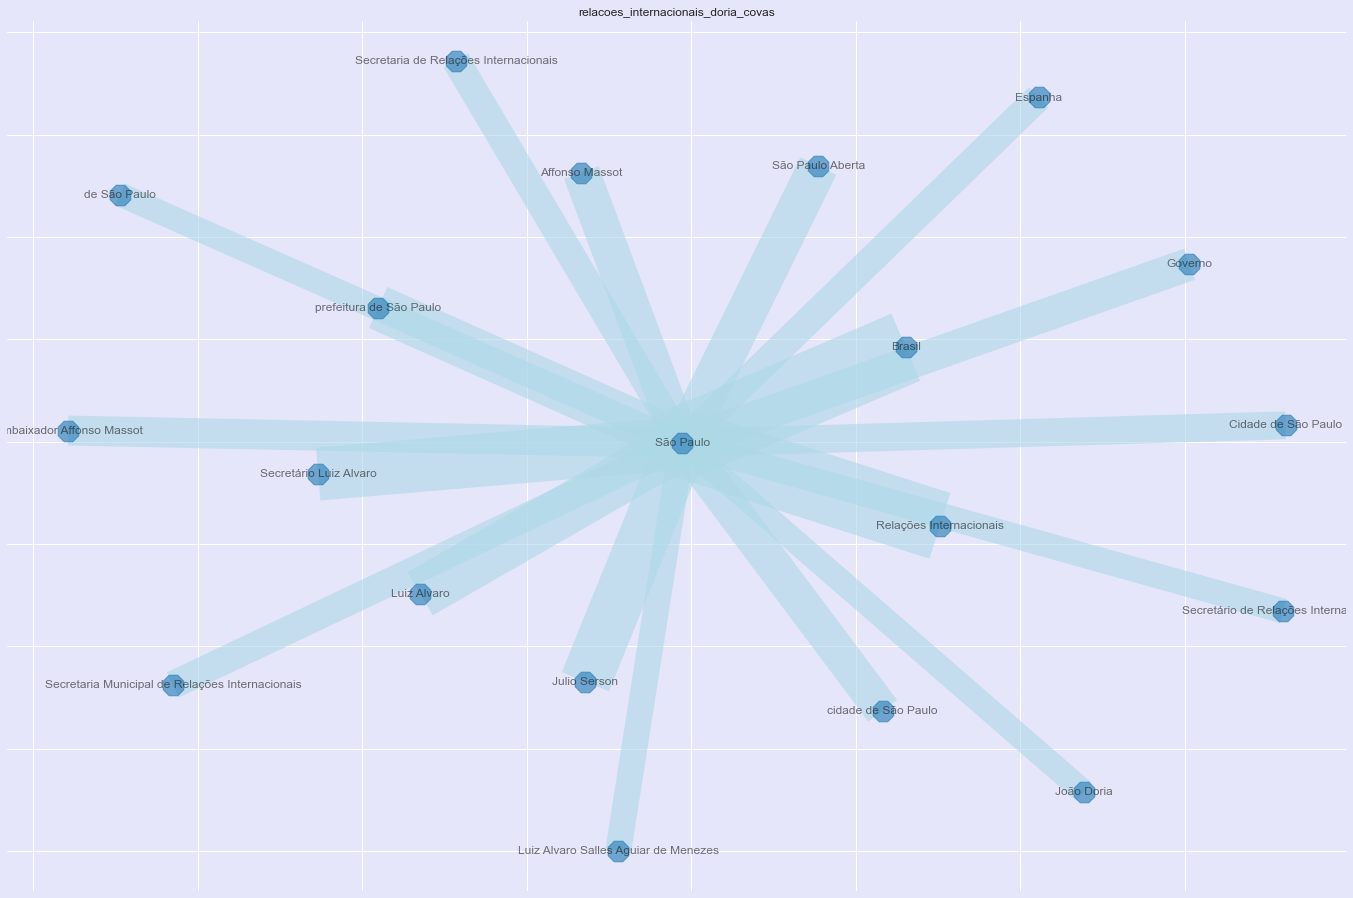

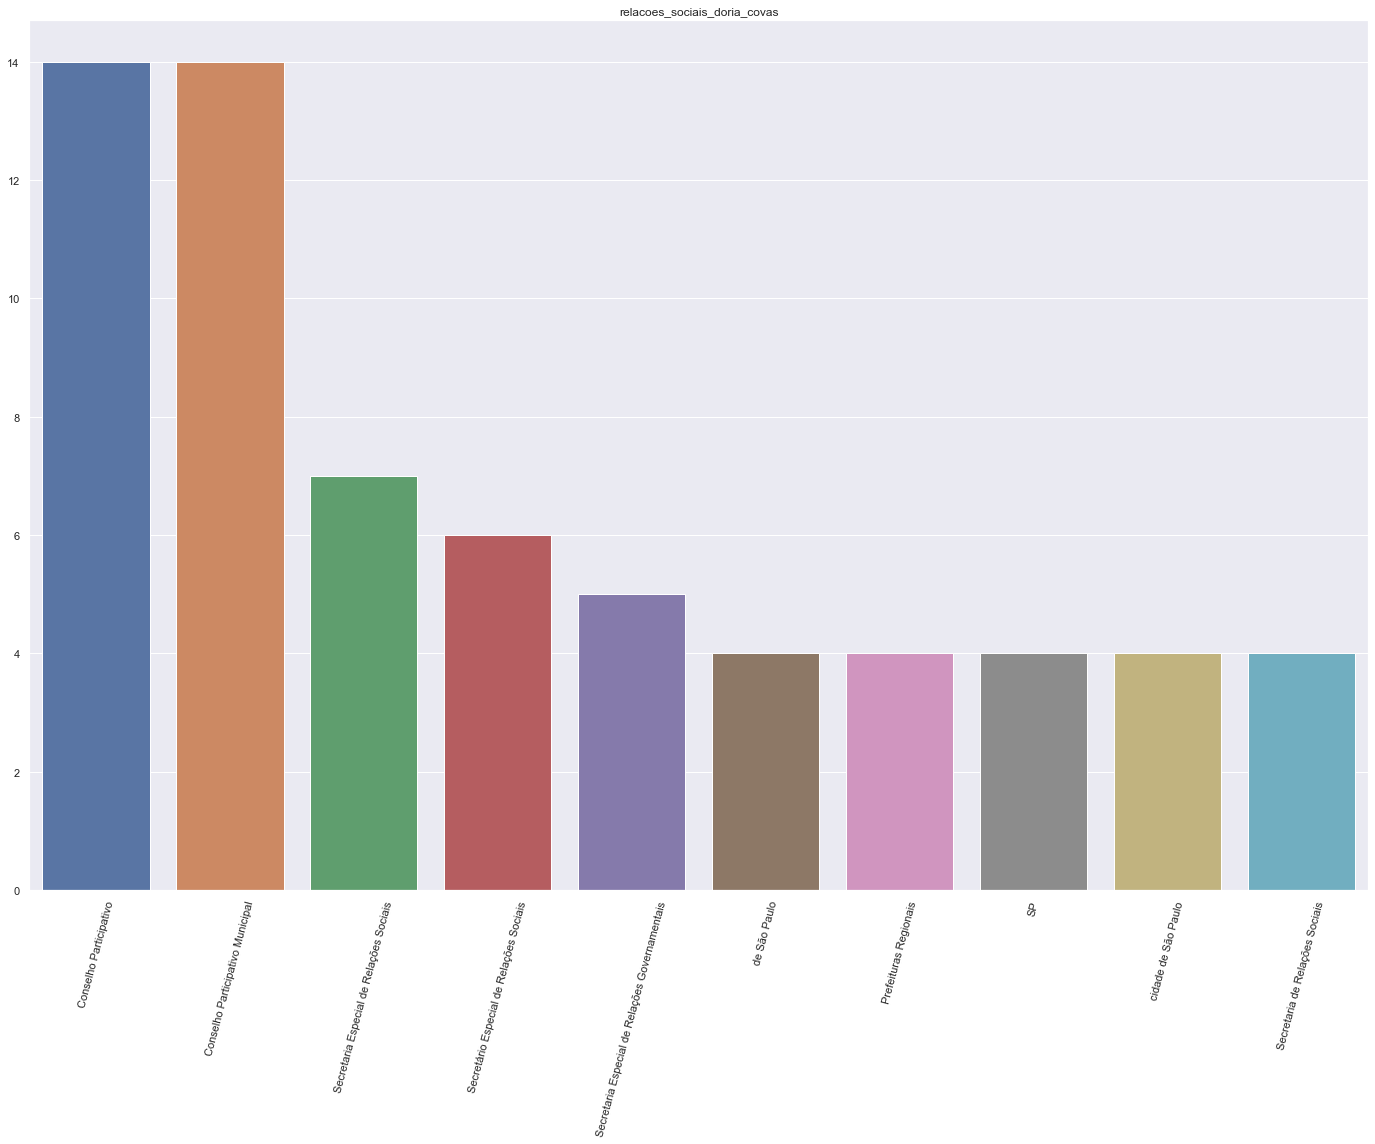

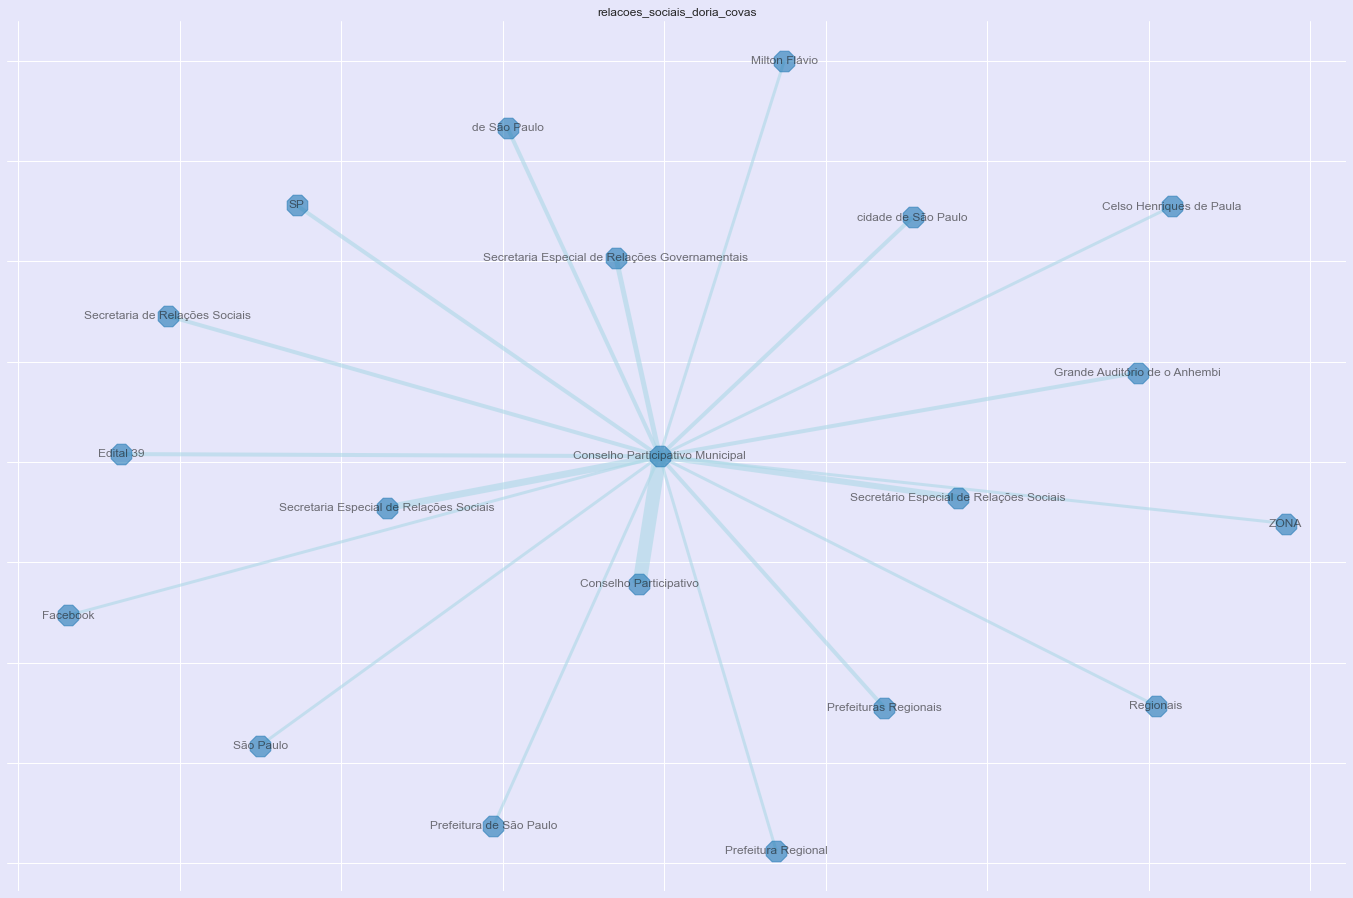

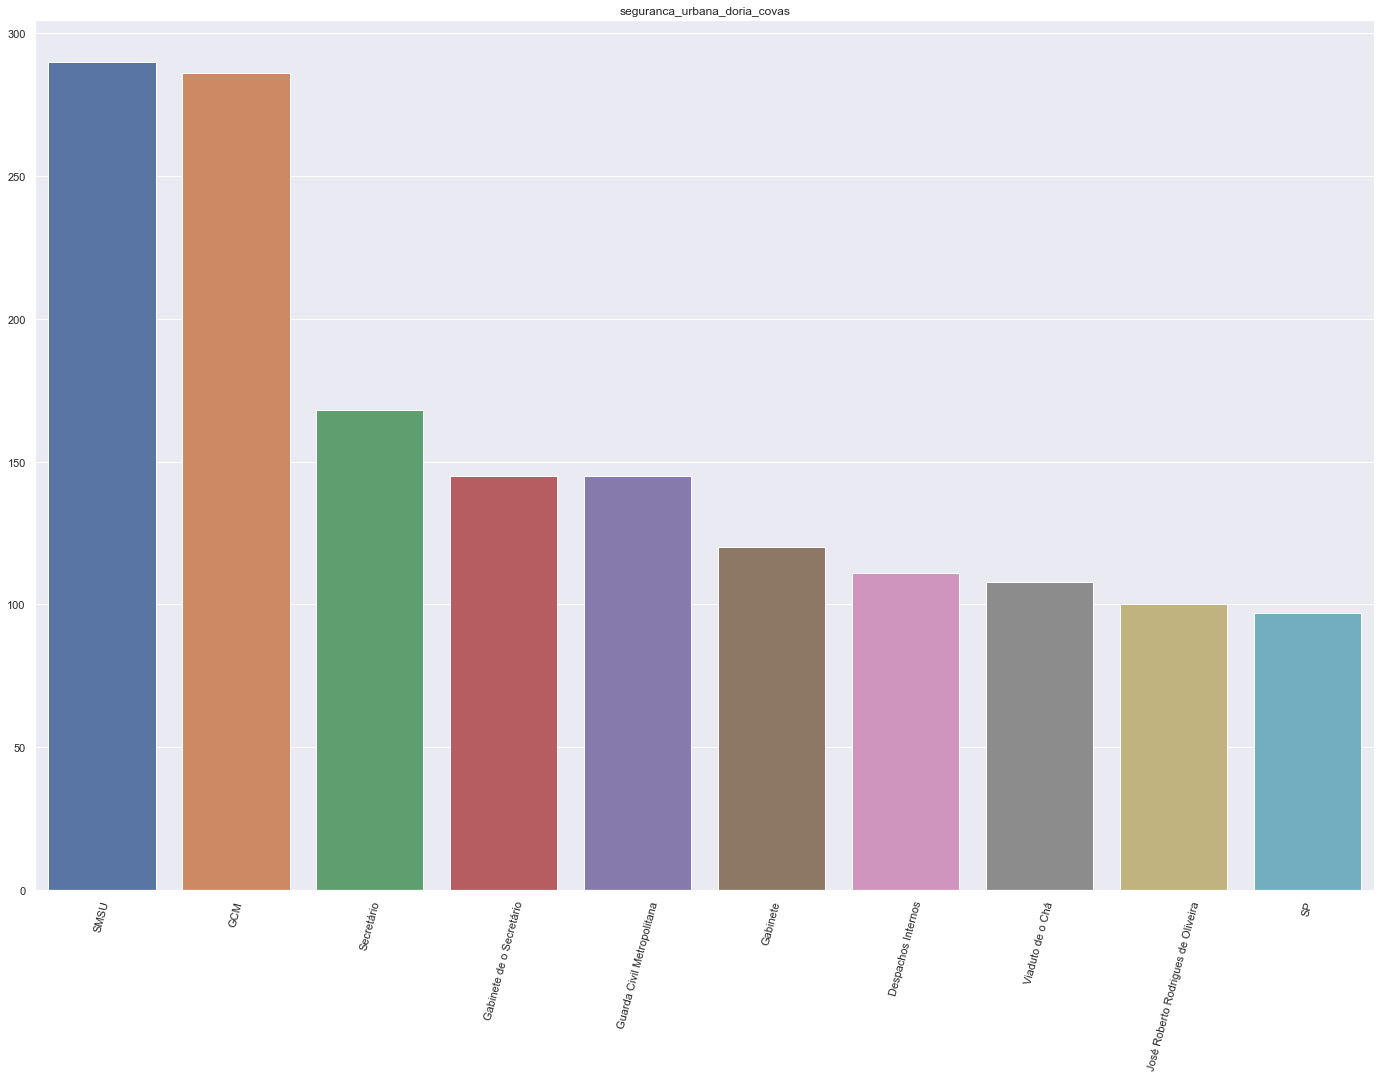

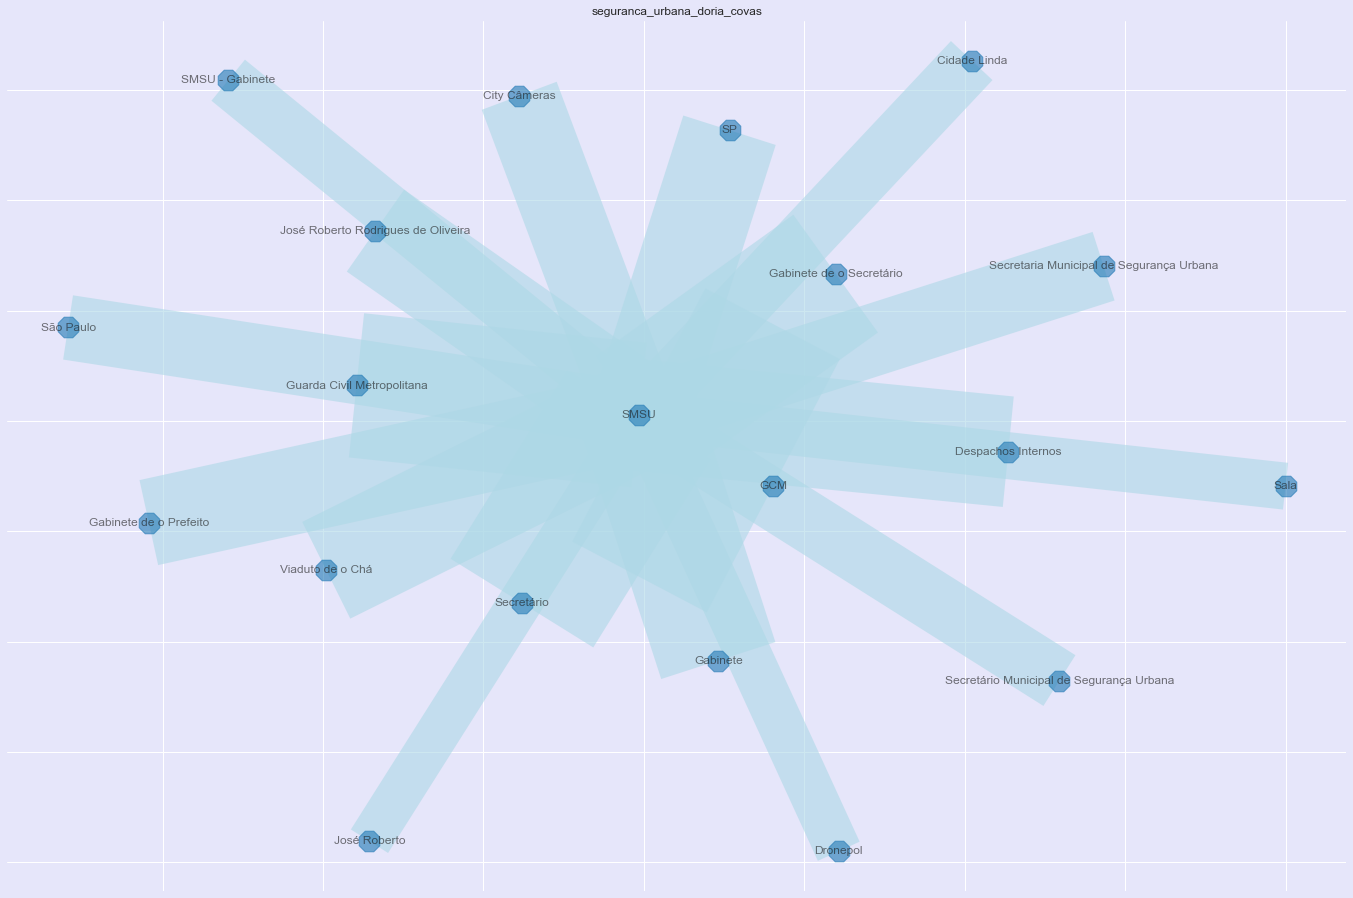

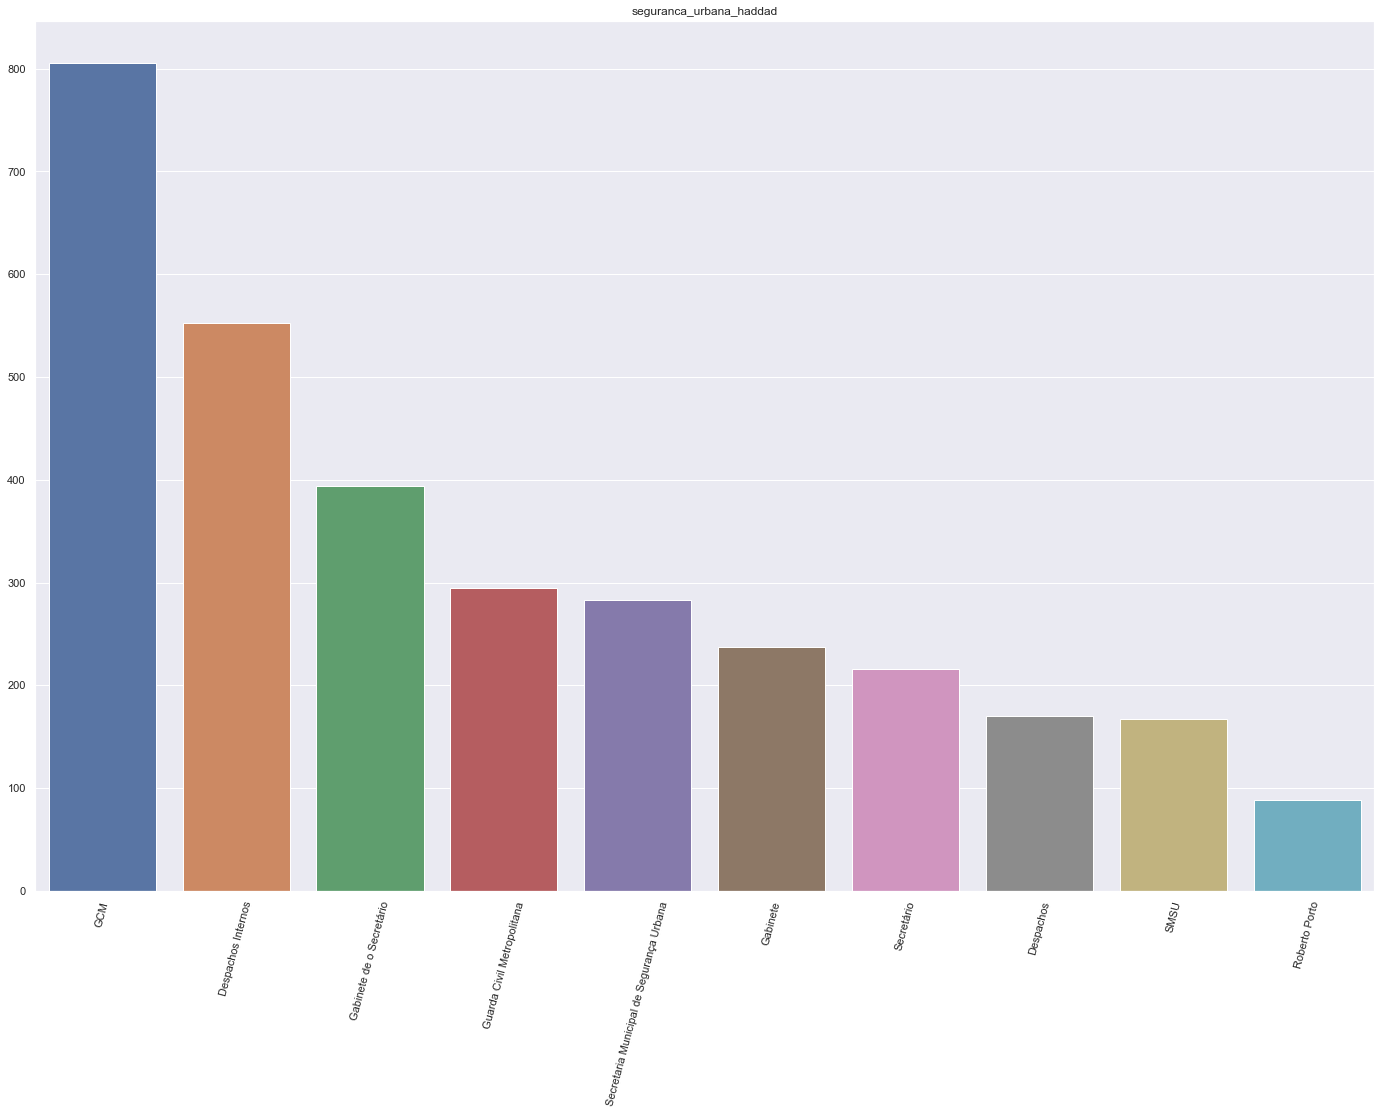

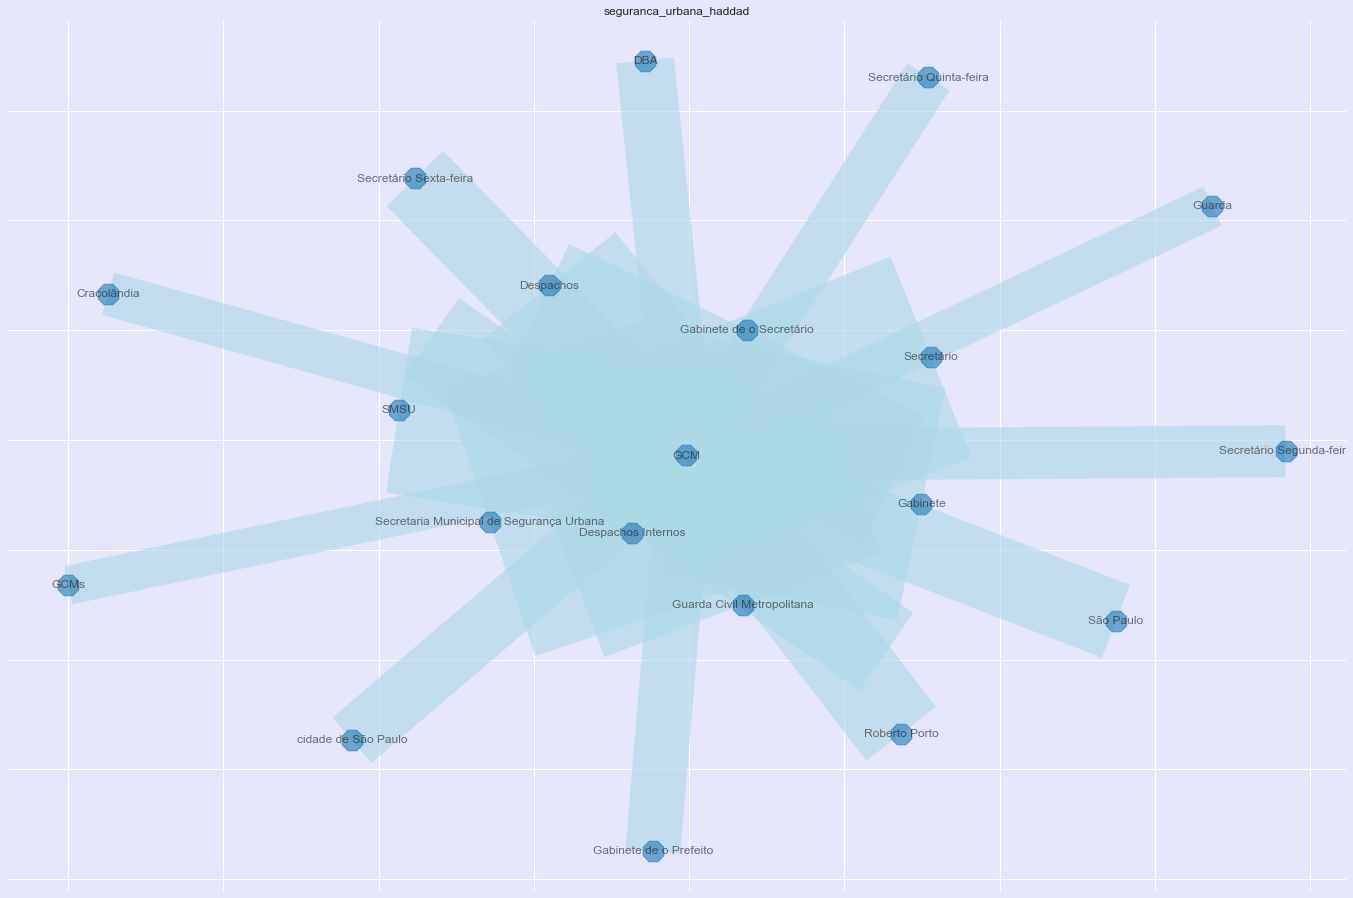

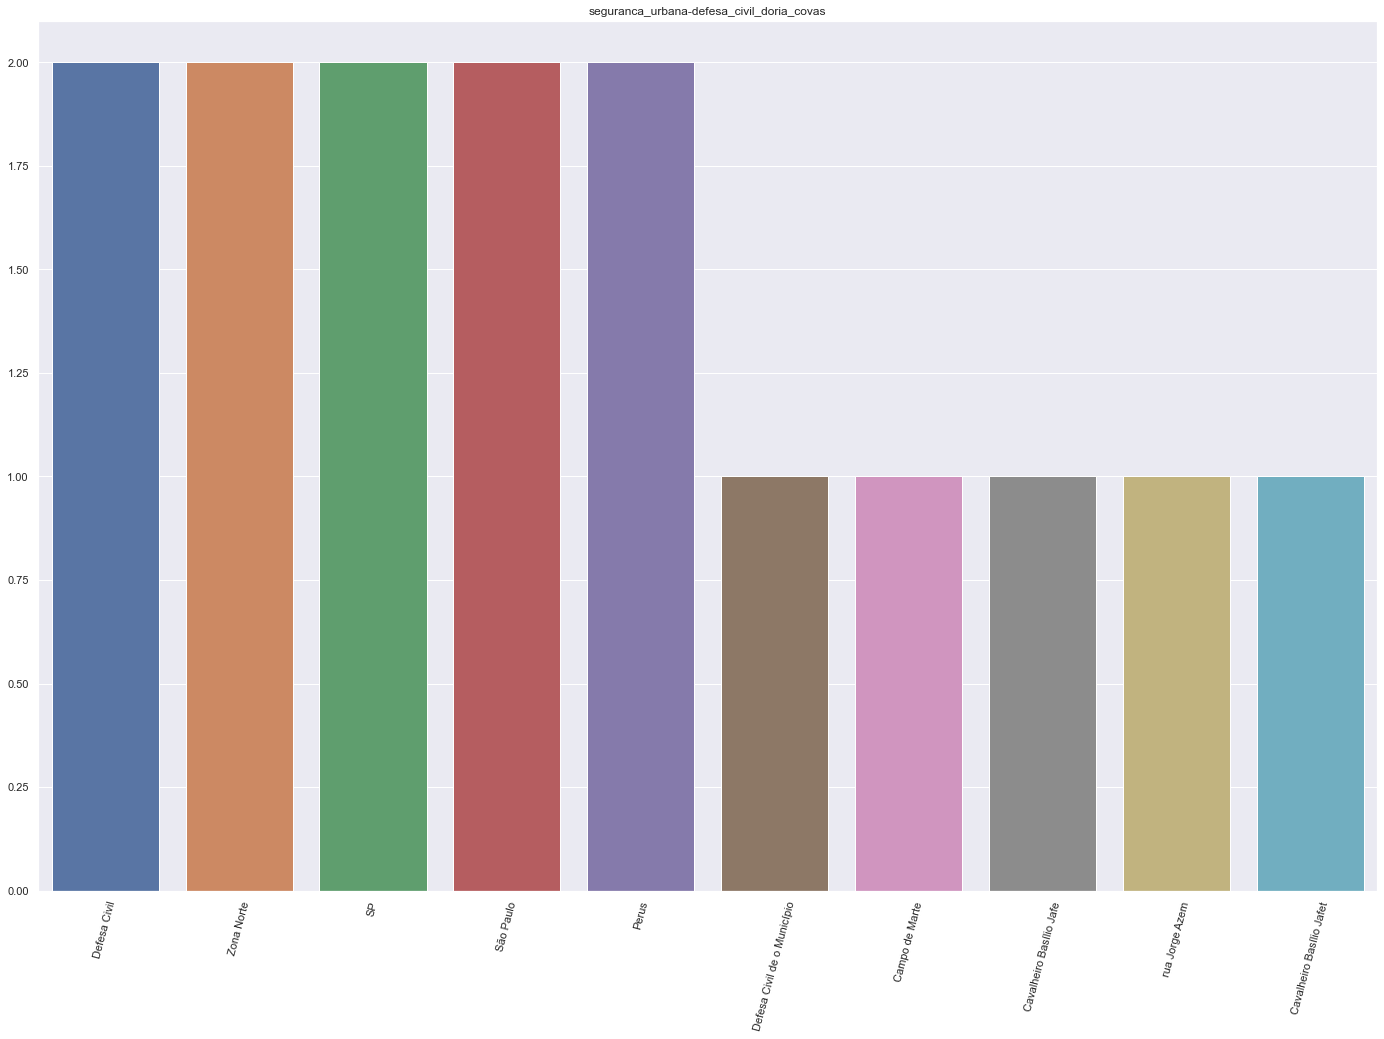

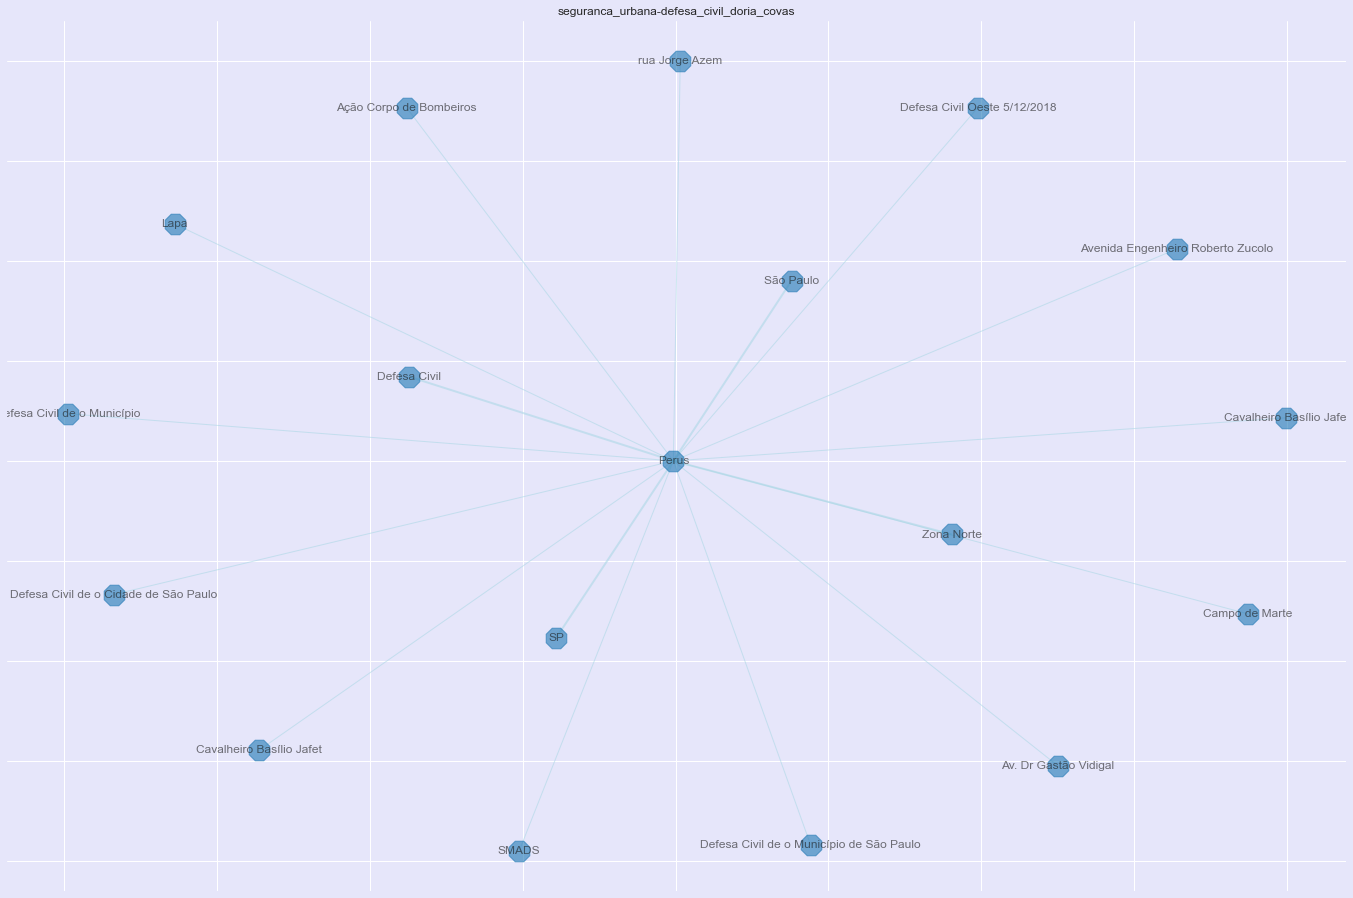

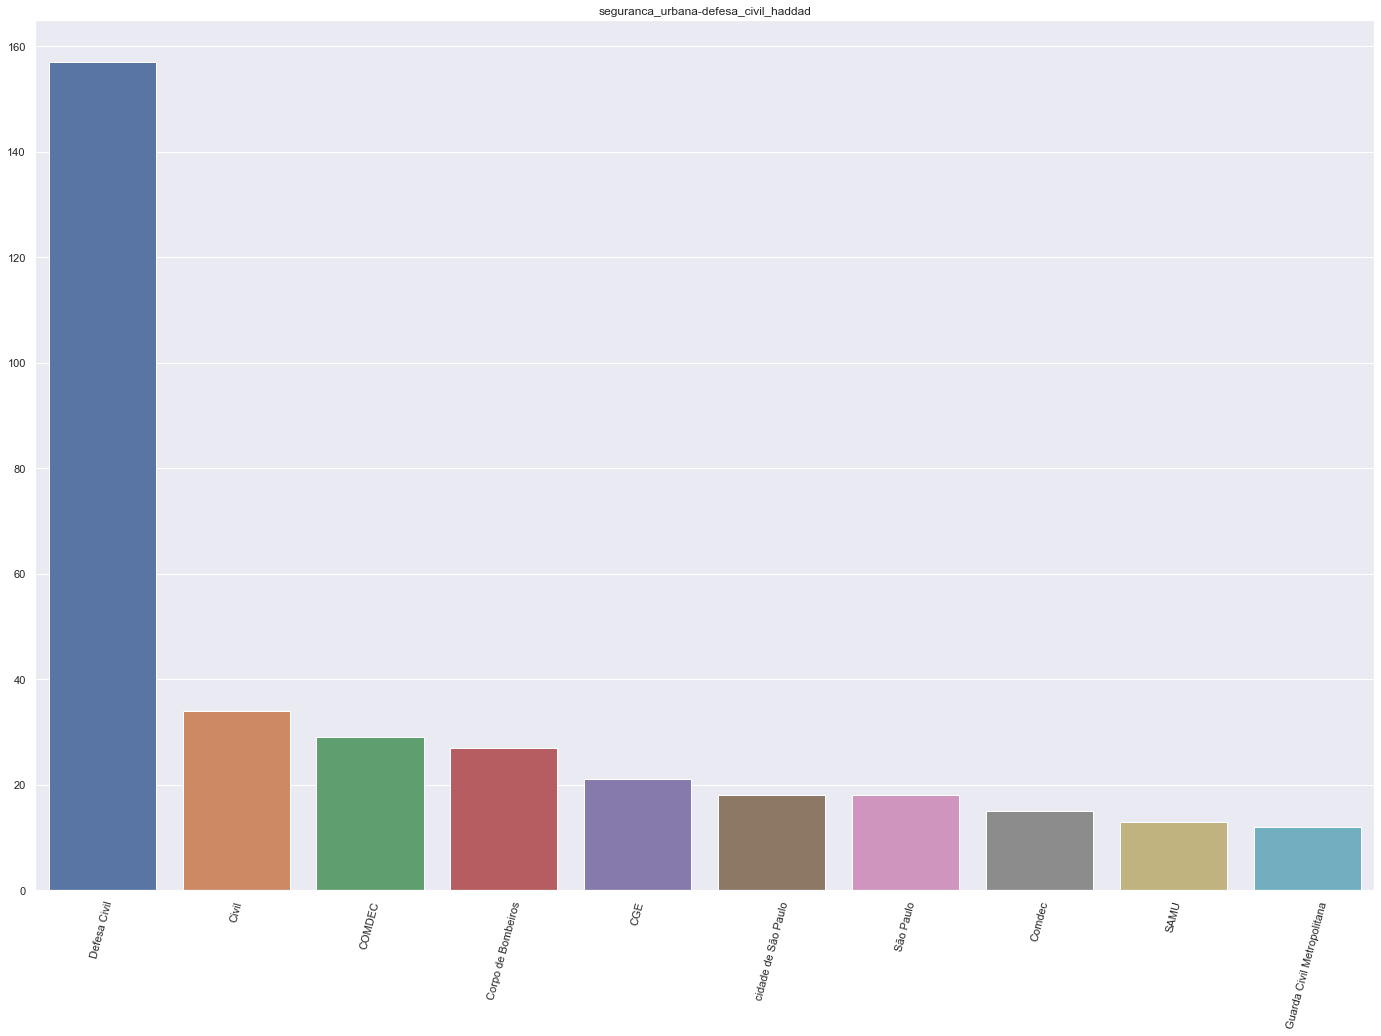

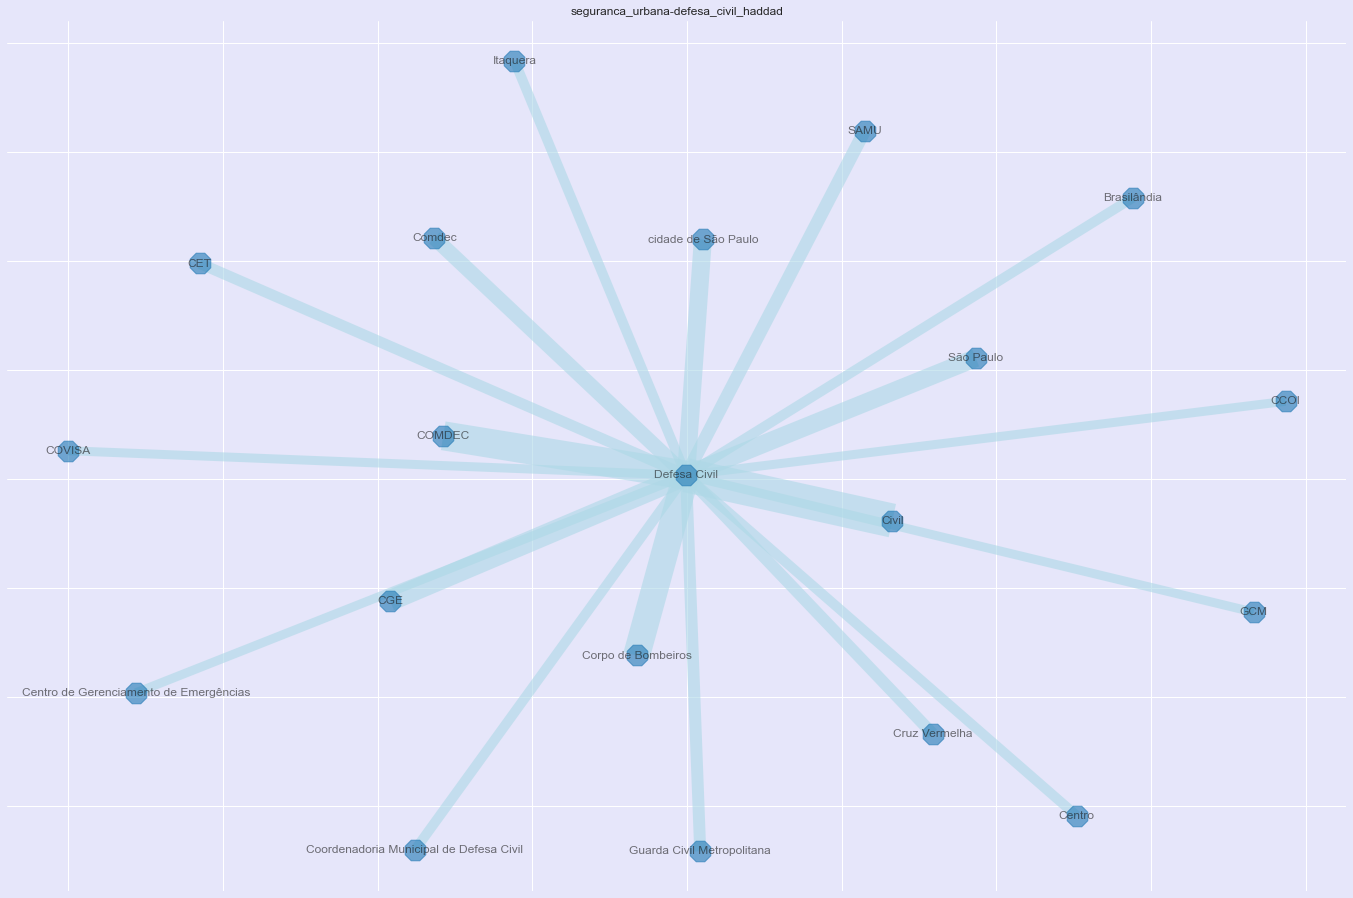

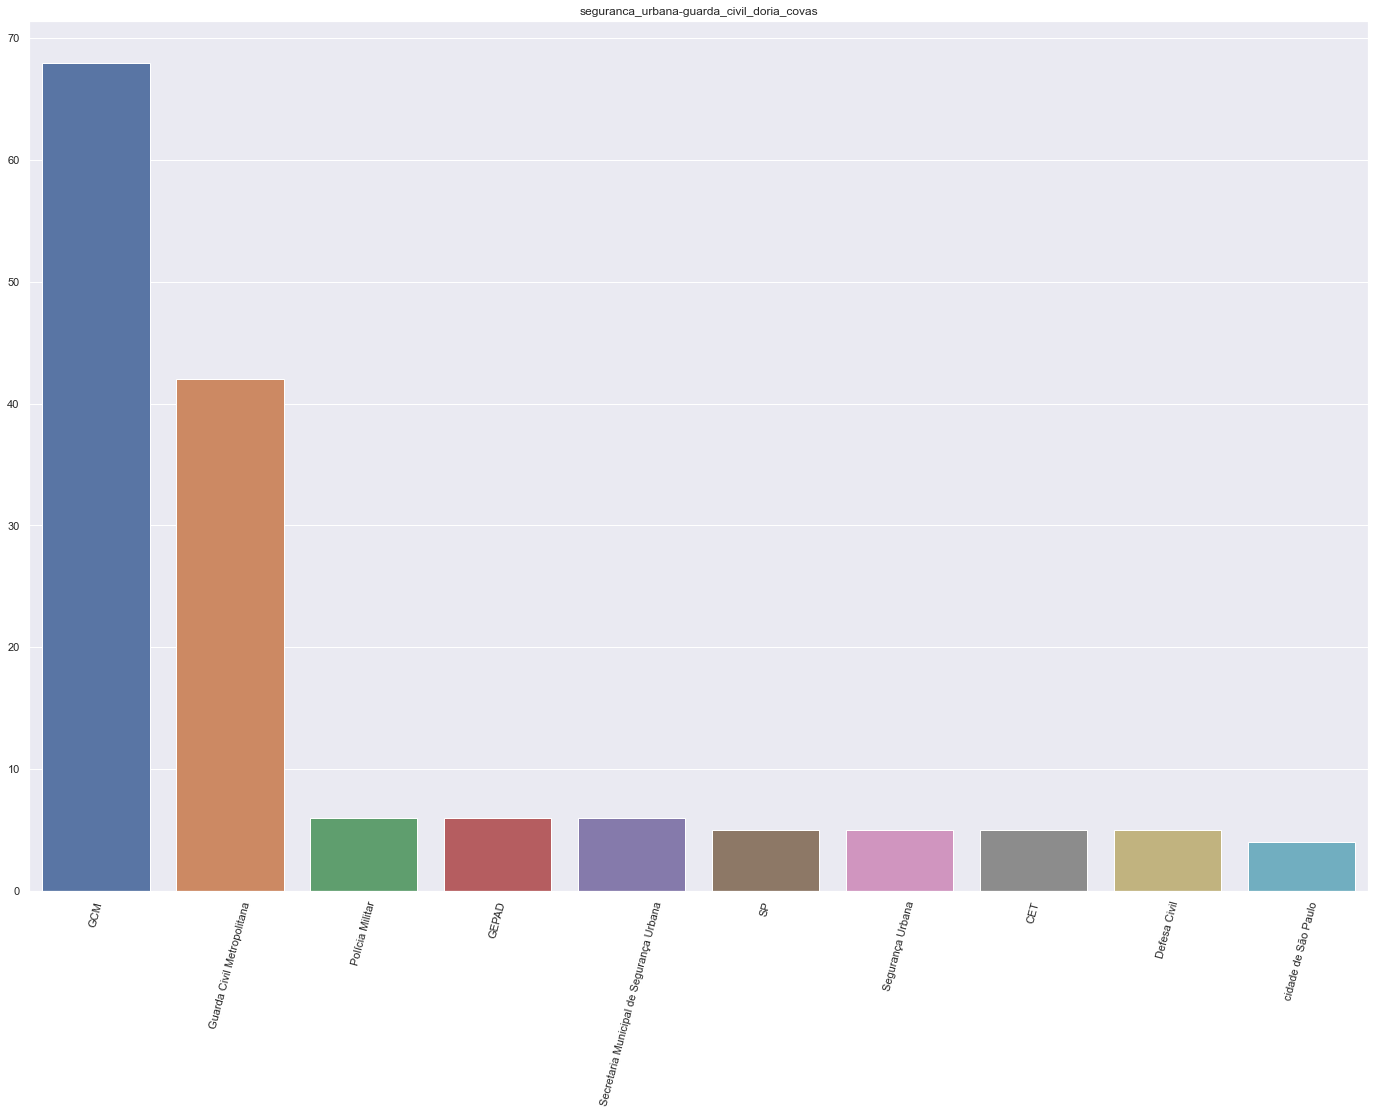

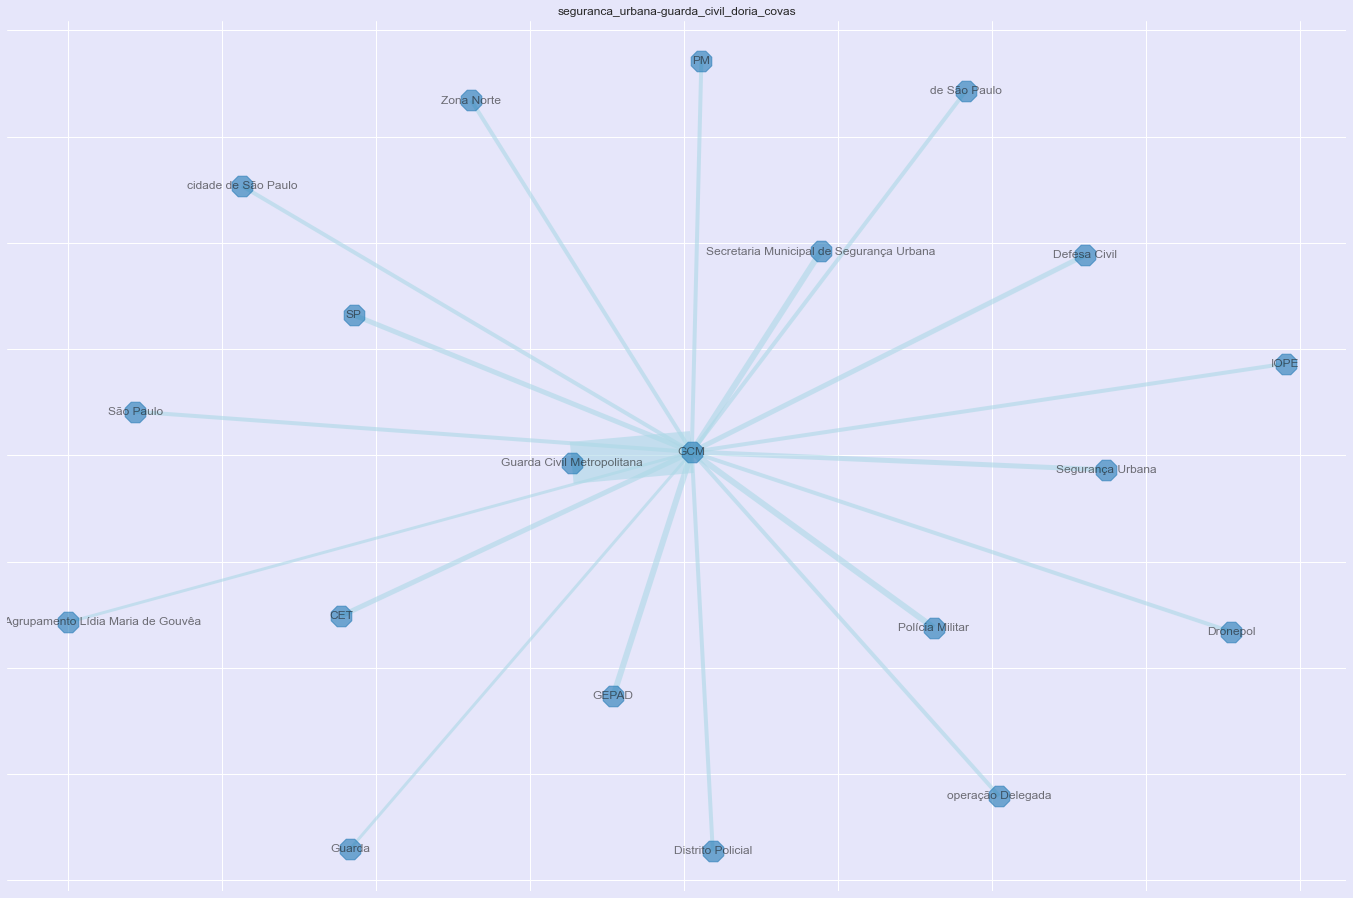

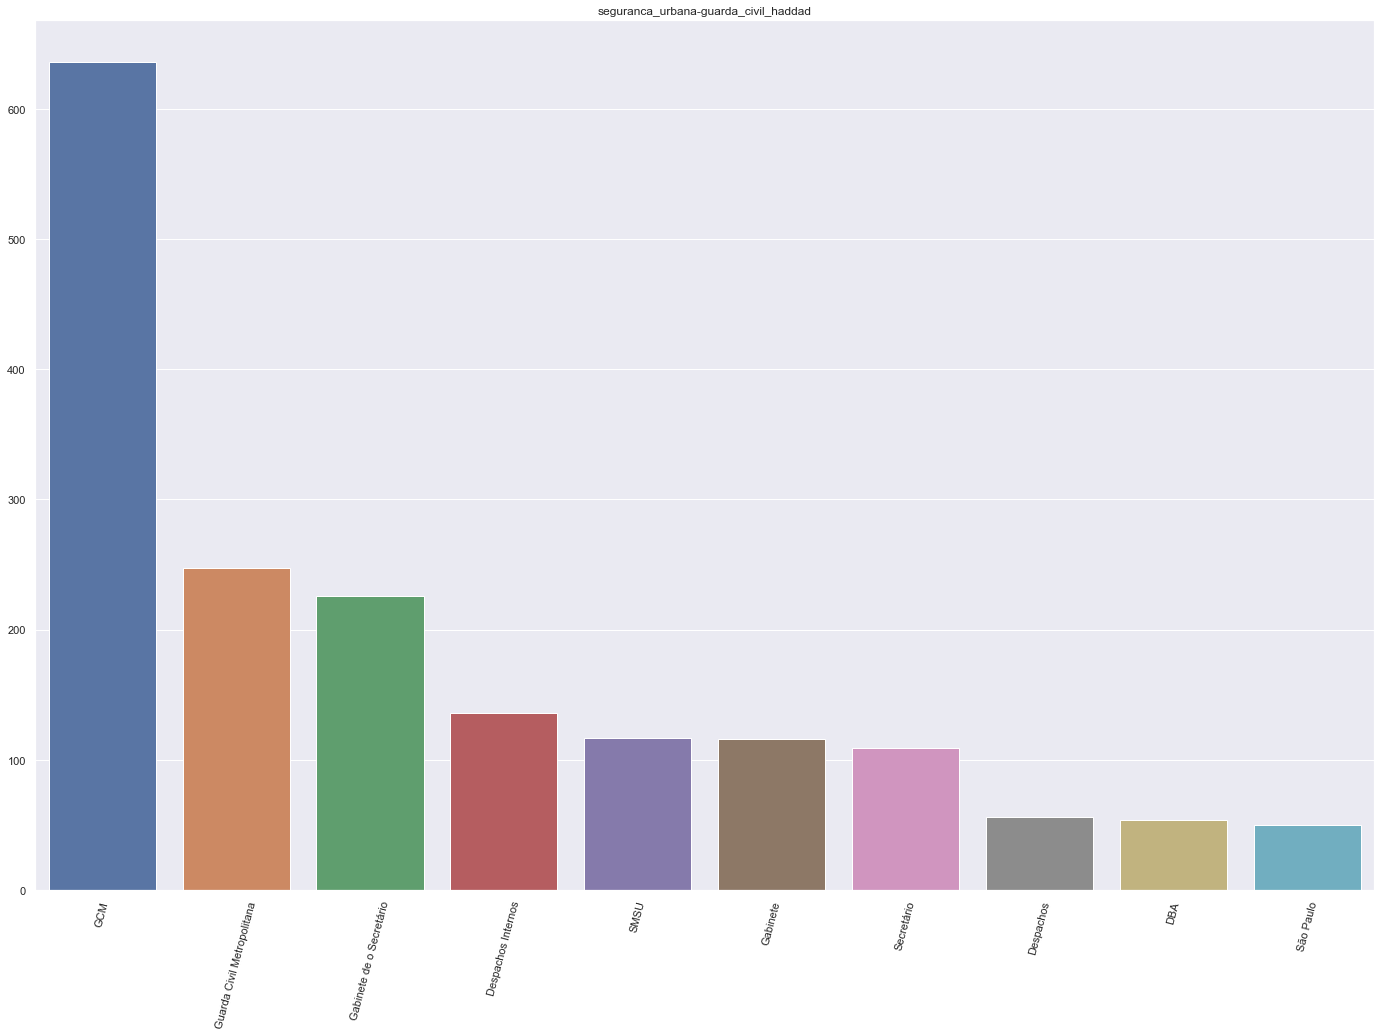

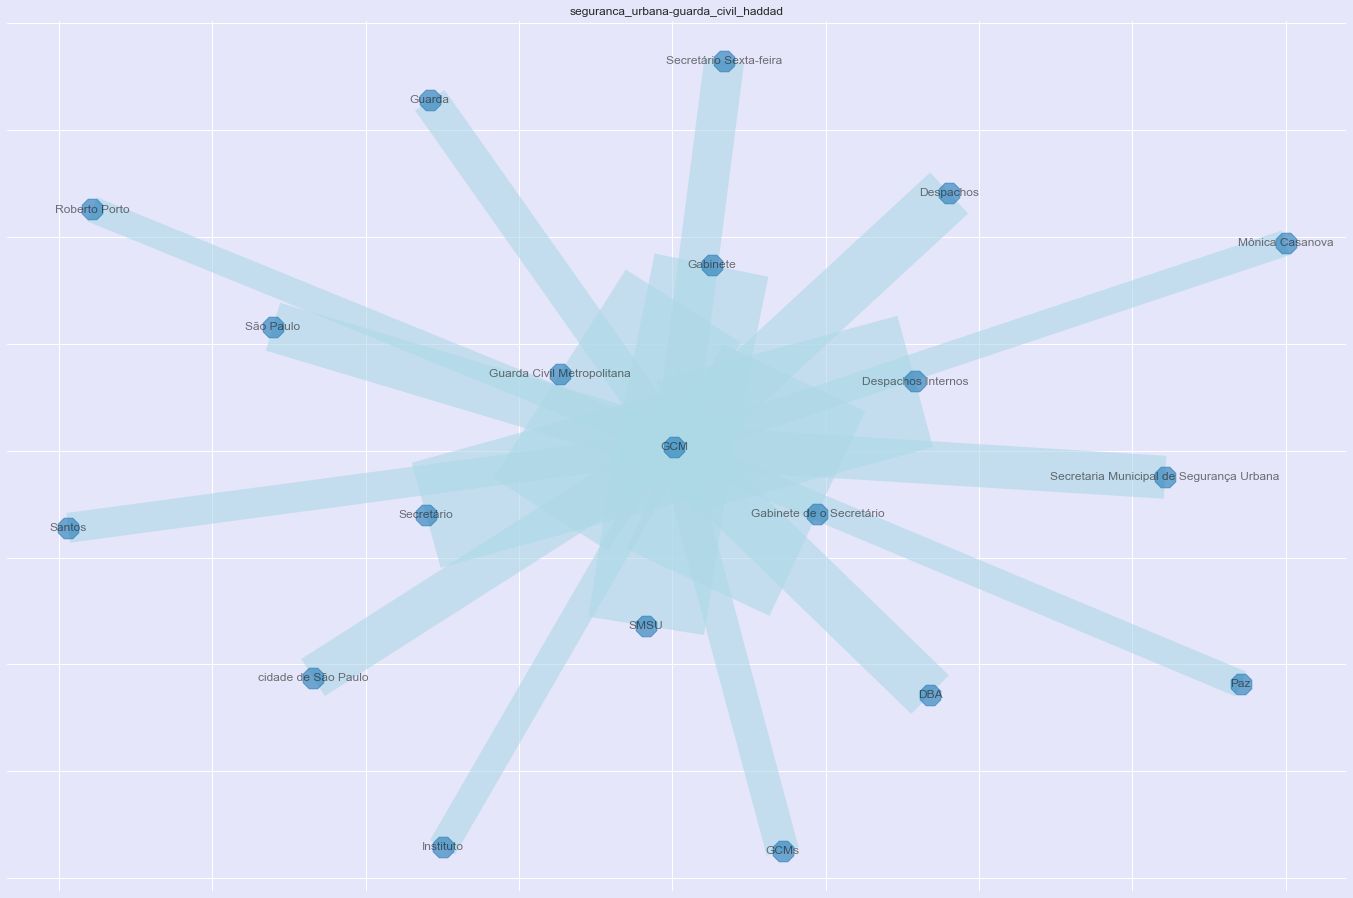

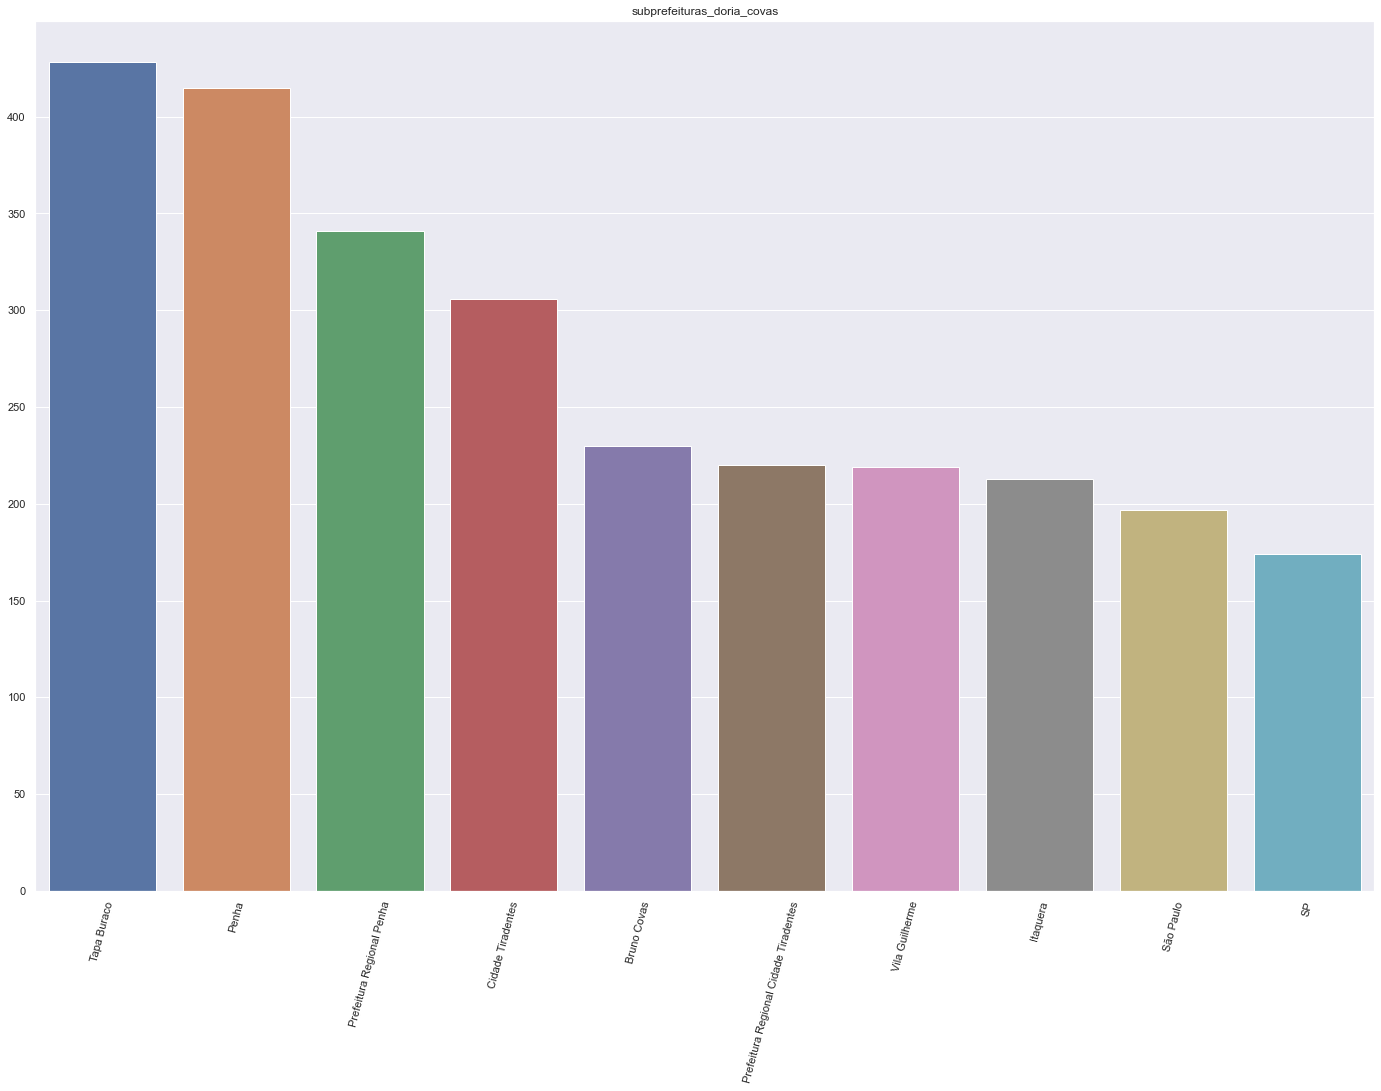

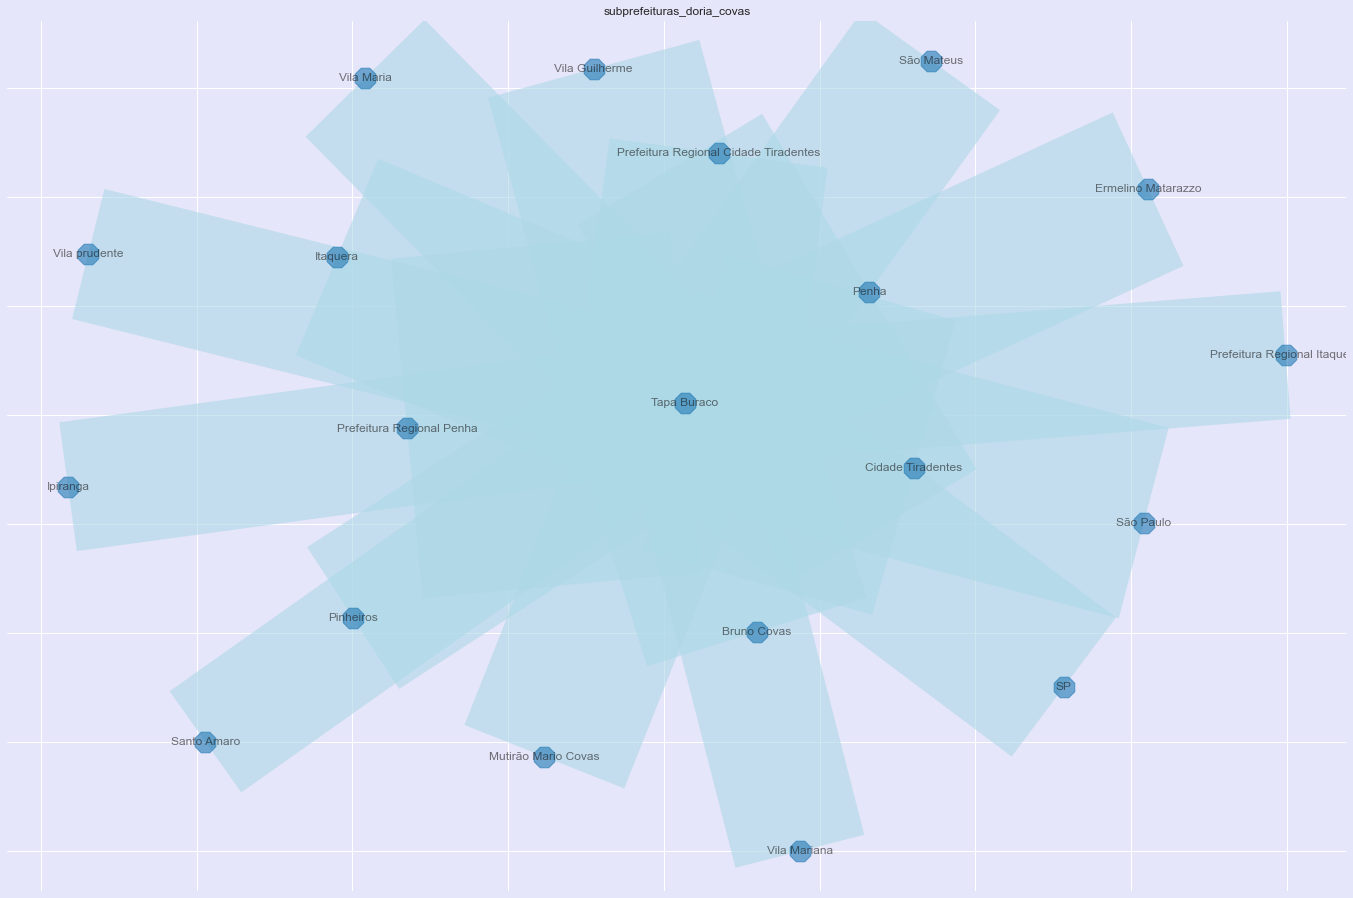

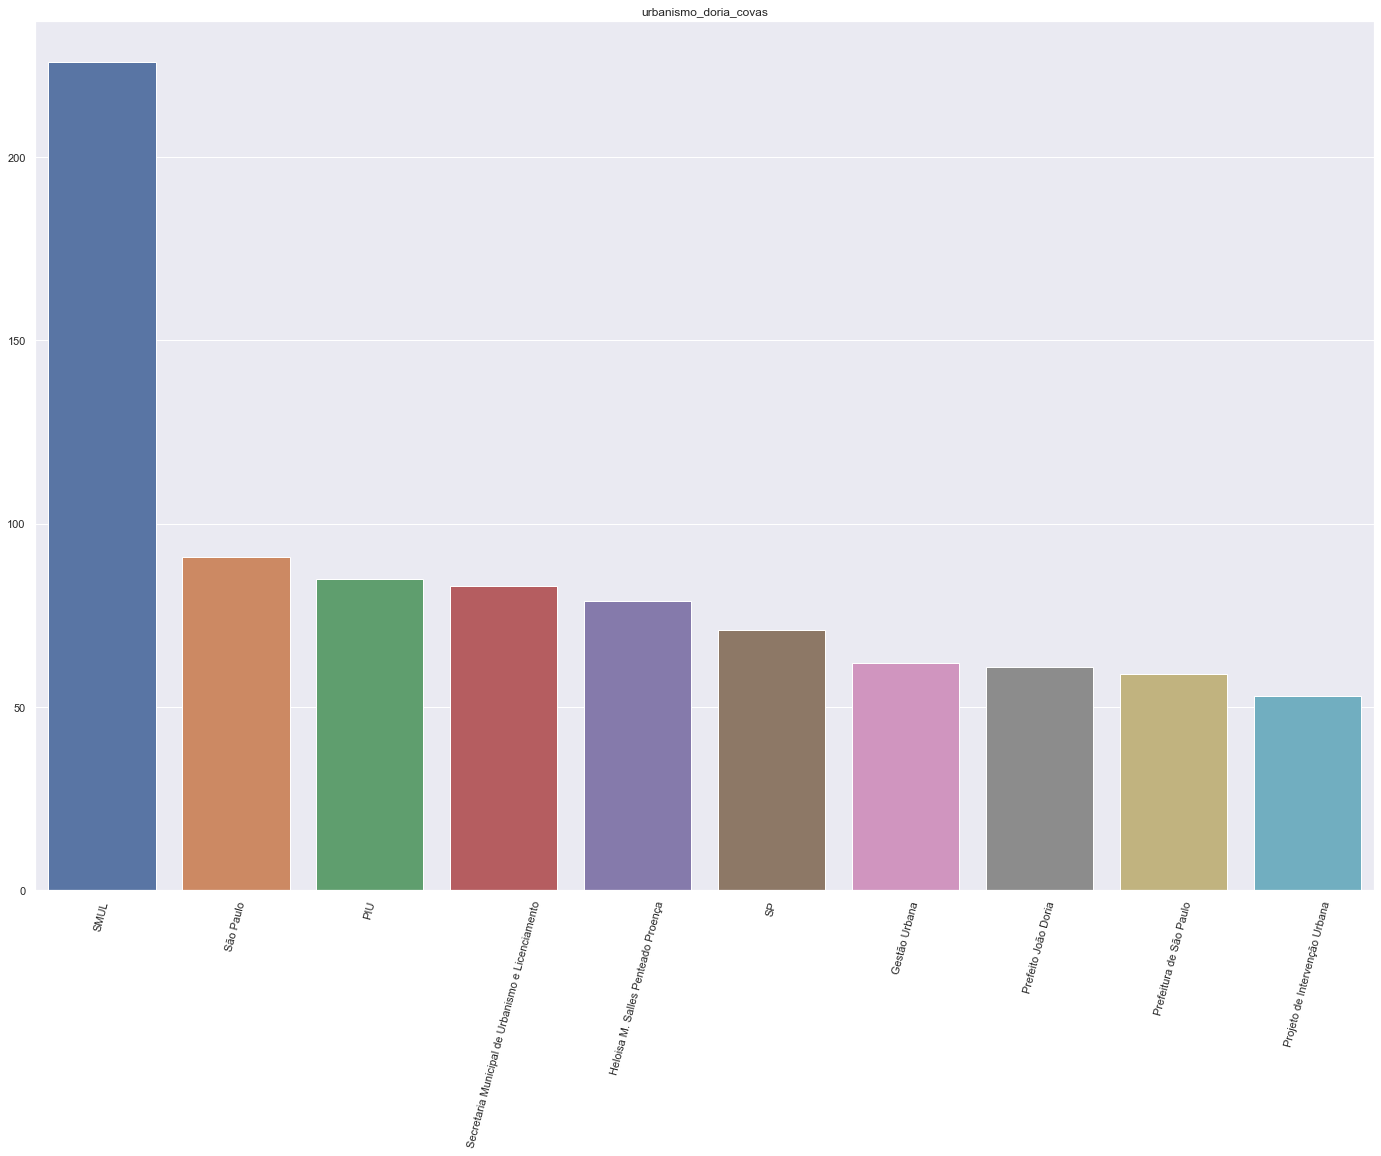

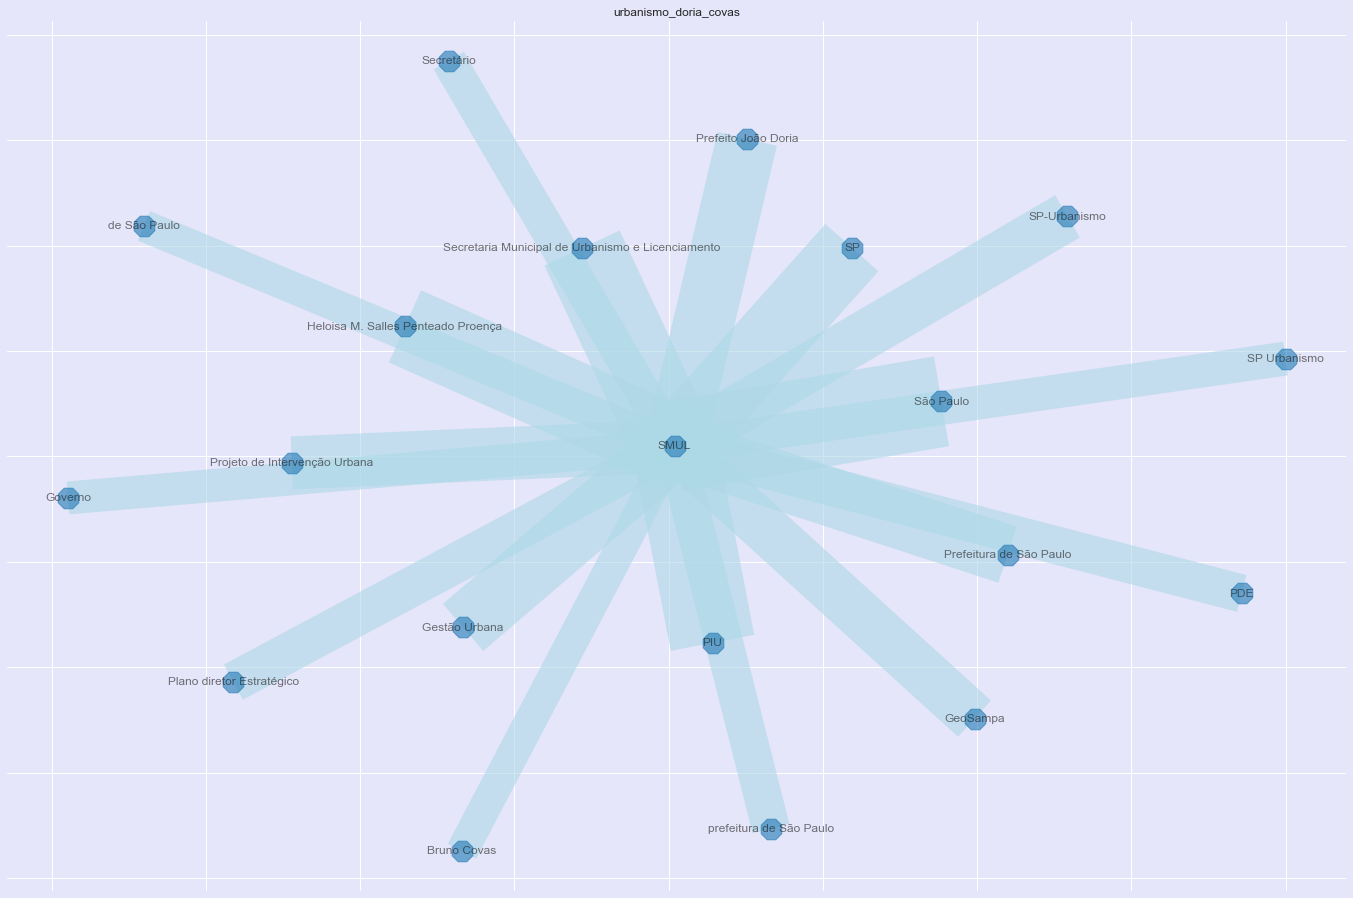

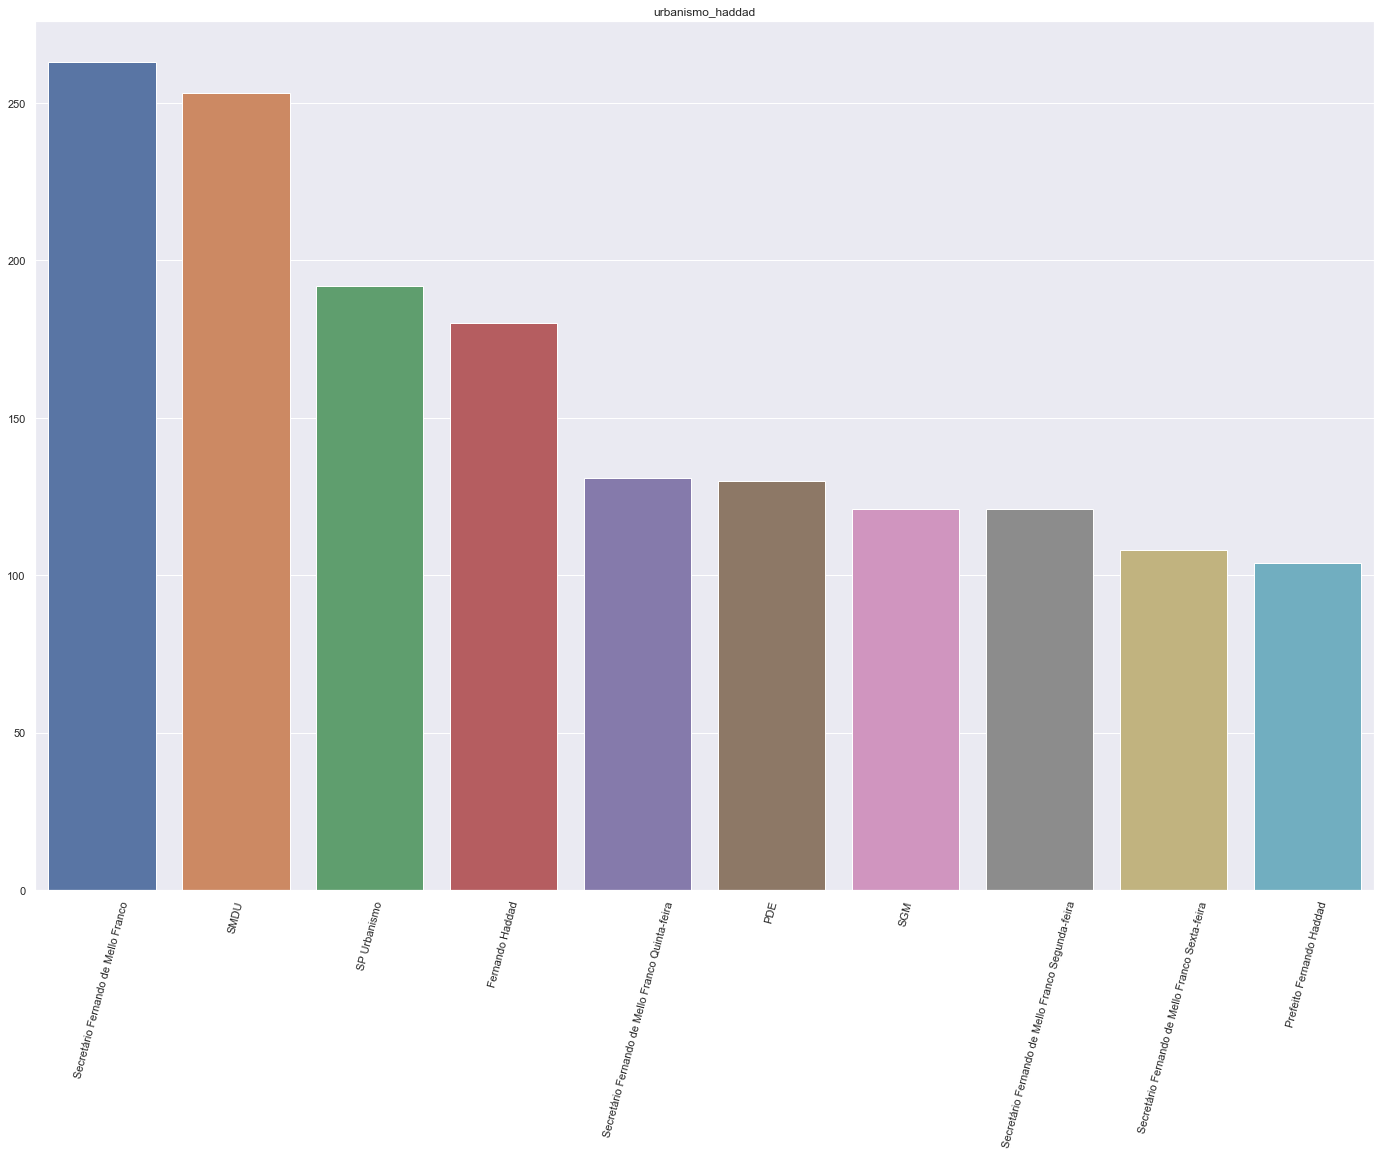

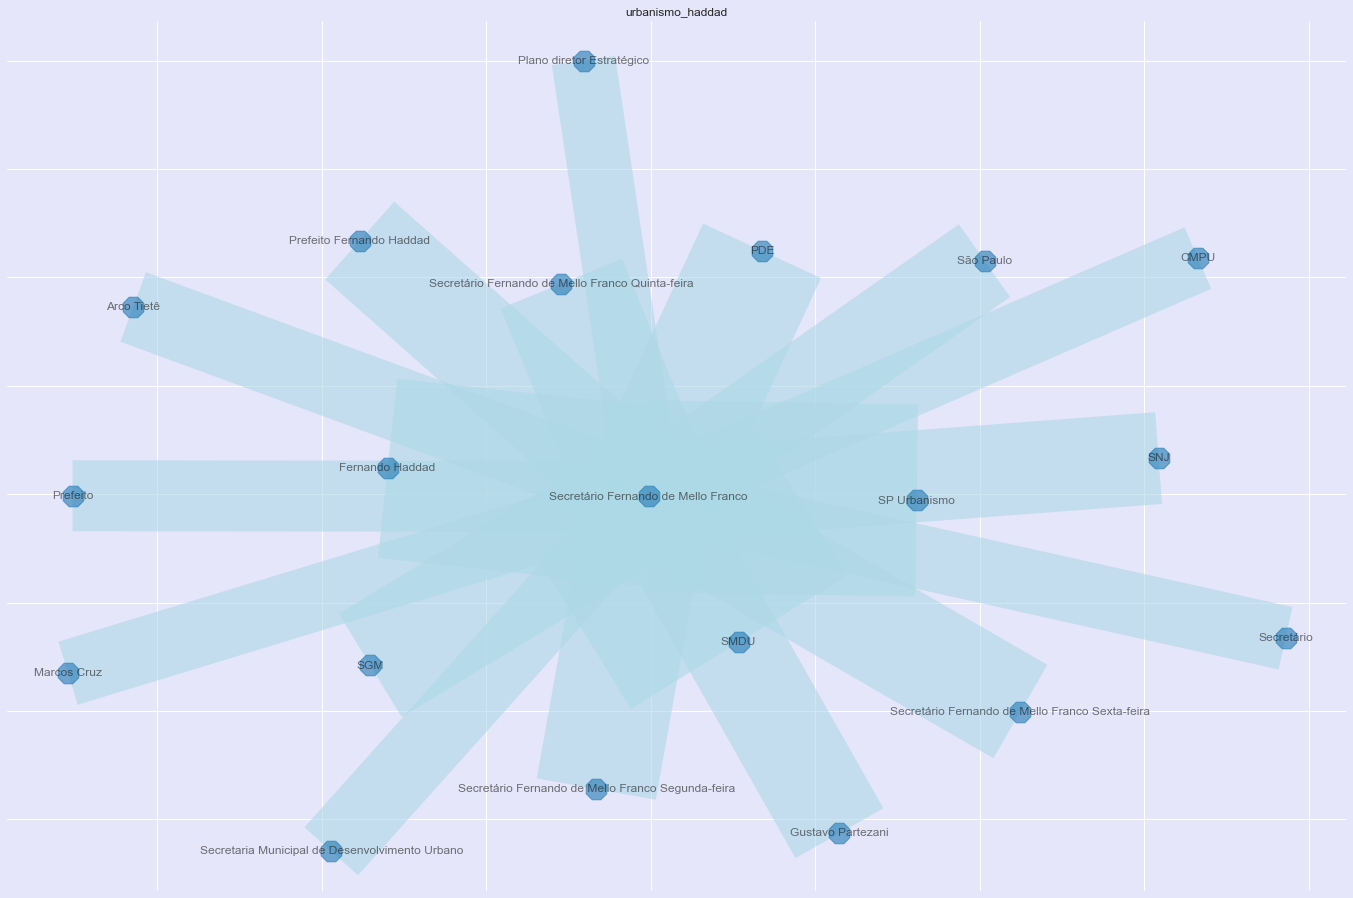

In [6]:
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
tokens = nlp(''.join(str(assistencia_social_doria_covas.lemma.tolist())))
plot_ner('assistencia_social_doria_covas')
tokens = nlp(''.join(str(assistencia_social_haddad.lemma.tolist())))
plot_ner('assistencia_social_haddad')
tokens = nlp(''.join(str(controladoria_geral_doria_covas.lemma.tolist())))
plot_ner('controladoria_geral_doria_covas')
tokens = nlp(''.join(str(controladoria_geral_haddad.lemma.tolist())))
plot_ner('controladoria_geral_haddad')
tokens = nlp(''.join(str(cultura_doria_covas.lemma.tolist())))
plot_ner('cultura_doria_covas')
tokens = nlp(''.join(str(cultura_haddad.lemma.tolist())))
plot_ner('cultura_haddad')
tokens = nlp(''.join(str(desenvolvimento_doria_covas.lemma.tolist())))
plot_ner('desenvolvimento_doria_covas')
tokens = nlp(''.join(str(desenvolvimento_haddad.clean_lem.tolist())))
plot_ner('desenvolvimento_haddad')
tokens = nlp(''.join(str(direitos_humanos_doria_covas.lemma.tolist())))
plot_ner('direitos_humanos_doria_covas')
tokens = nlp(''.join(str(direitos_humanos_haddad.lemma.tolist())))
plot_ner('direitos_humanos_haddad')
tokens = nlp(''.join(str(direitos_humanos_poprua_doria_covas.lemma.tolist())))
plot_ner('direitos_humanos_poprua_doria_covas')
#tokens = nlp(''.join(str(direitos_humanos_poprua_haddad.lemma.tolist())))
#plot_ner('direitos_humanos_poprua_haddad')
tokens = nlp(''.join(str(esportes_doria_covas.lemma.tolist())))
plot_ner('esportes_doria_covas')
tokens = nlp(''.join(str(esportes_haddad.clean_lem.tolist())))
plot_ner('esportes_haddad')
tokens = nlp(''.join(str(fazenda_doria_covas.lemma.tolist())))
plot_ner('fazenda_doria_covas')
tokens = nlp(''.join(str(fazenda_haddad.lemma.tolist())))
plot_ner('fazenda_haddad')
tokens = nlp(''.join(str(gestao_haddad.lemma.tolist())))
plot_ner('gestao_haddad')
tokens = nlp(''.join(str(governo_doria_covas.lemma.tolist())))
plot_ner('governo_doria_covas')
#tokens = nlp(''.join(str(governo_haddad.lemma.tolist())))
#plot_ner('governo_haddad')
tokens = nlp(''.join(str(habitacao_haddad.lemma.tolist())))
plot_ner('habitacao_haddad')
tokens = nlp(''.join(str(justica_doria_covas.lemma.tolist())))
plot_ner('justica_doria_covas')
tokens = nlp(''.join(str(justica_haddad.lemma.tolist())))
plot_ner('justica_haddad')
tokens = nlp(''.join(str(meio_ambiente_haddad.lemma.tolist())))
plot_ner('meio_ambiente_haddad')
tokens = nlp(''.join(str(obras_doria_covas.lemma.tolist())))
plot_ner('obras_doria_covas')
tokens = nlp(''.join(str(obras_haddad.lemma.tolist())))
plot_ner('obras_haddad')
tokens = nlp(''.join(str(pessoa_com_deficiencia_doria_covas.lemma.tolist())))
plot_ner('pessoa_com_deficiencia_doria_covas')
tokens = nlp(''.join(str(pessoa_com_deficiencia_haddad.lemma.tolist())))
plot_ner('pessoa_com_deficiencia_haddad')
#tokens = nlp(''.join(str(procuradoria_geral_haddad.lemma.tolist())))
#plot_ner('procuradoria_geral_haddad')
tokens = nlp(''.join(str(relacoes_internacionais_doria_covas.lemma.tolist())))
plot_ner('relacoes_internacionais_doria_covas')
tokens = nlp(''.join(str(relacoes_sociais_doria_covas.lemma.tolist())))
plot_ner('relacoes_sociais_doria_covas')
#tokens = nlp(''.join(str(relacoes_sociais_haddad.lemma.tolist())))
#plot_ner('relacoes_sociais_haddad')
tokens = nlp(''.join(str(seguranca_urbana_doria_covas.lemma.tolist())))
plot_ner('seguranca_urbana_doria_covas')
tokens = nlp(''.join(str(seguranca_urbana_haddad.lemma.tolist())))
plot_ner('seguranca_urbana_haddad')
tokens = nlp(''.join(str(seguranca_urbana_defesa_civil_doria_covas.lemma.tolist())))
plot_ner('seguranca_urbana-defesa_civil_doria_covas')
tokens = nlp(''.join(str(seguranca_urbana_defesa_civil_haddad.lemma.tolist())))
plot_ner('seguranca_urbana-defesa_civil_haddad')
tokens = nlp(''.join(str(seguranca_urbana_guarda_civil_doria_covas.lemma.tolist())))
plot_ner('seguranca_urbana-guarda_civil_doria_covas')
tokens = nlp(''.join(str(seguranca_urbana_guarda_civil_haddad.lemma.tolist())))
plot_ner('seguranca_urbana-guarda_civil_haddad')
tokens = nlp(''.join(str(subprefeituras_doria_covas.lemma.tolist())))
plot_ner('subprefeituras_doria_covas')
tokens = nlp(''.join(str(urbanismo_doria_covas.lemma.tolist())))
plot_ner('urbanismo_doria_covas')
tokens = nlp(''.join(str(urbanismo_haddad.lemma.tolist())))
plot_ner('urbanismo_haddad')
allDone()